In [1]:
import os                                                   
import math                                                 
from sklearn import tree                                    
from sklearn.tree import _tree                              
from sklearn import metrics                                 
from sklearn.tree import export_graphviz                    
from sklearn.preprocessing import StandardScaler            

from sklearn.model_selection import cross_val_score         
from sklearn.tree import DecisionTreeRegressor              
from sklearn import model_selection
from sklearn.ensemble import BaggingRegressor               
from sklearn.ensemble import RandomForestRegressor          

import pandas as pd                                         
import pandas.plotting as pd_plot
import numpy as np                                          
import matplotlib as mpl
import matplotlib.pyplot as plt                             
import seaborn as sns
from subprocess import check_call
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

ModuleNotFoundError: No module named 'pandas'

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My\ Drive/
os.chdir('#########')

/content/drive/My Drive


In [5]:
NO2_df = pd.read_csv("NO2.csv", infer_datetime_format = True)
NO2_df["DateTime"] = pd.to_datetime(NO2_df["DateTime"])
NO2_df = NO2_df.set_index(["DateTime"])
NO2_df.head()

Alipur__Delhi__DPCC  ...  Wazirpur__Delhi__DPCC
DateTime                                  ...                       
2015-01-01 00:00:00                  NaN  ...                    NaN
2015-01-01 01:00:00                  NaN  ...                    NaN
2015-01-01 02:00:00                  NaN  ...                    NaN
2015-01-01 03:00:00                  NaN  ...                    NaN
2015-01-01 04:00:00                  NaN  ...                    NaN

[5 rows x 40 columns]

In [6]:
Ozone_df = pd.read_csv("Ozone.csv", infer_datetime_format = True)
Ozone_df["DateTime"] = pd.to_datetime(Ozone_df["DateTime"])
Ozone_df = Ozone_df.set_index(["DateTime"])
Ozone_df.head()

Alipur__Delhi__DPCC  ...  Wazirpur__Delhi__DPCC
DateTime                                  ...                       
2015-01-01 00:00:00                  NaN  ...                    NaN
2015-01-01 01:00:00                  NaN  ...                    NaN
2015-01-01 02:00:00                  NaN  ...                    NaN
2015-01-01 03:00:00                  NaN  ...                    NaN
2015-01-01 04:00:00                  NaN  ...                    NaN

[5 rows x 40 columns]

In [7]:
PM25_df = pd.read_csv("PM2.5.csv", infer_datetime_format = True)
PM25_df["DateTime"] = pd.to_datetime(PM25_df["DateTime"])
PM25_df = PM25_df.set_index(["DateTime"])
PM25_df.head()

Alipur__Delhi__DPCC  ...  Wazirpur__Delhi__DPCC
DateTime                                  ...                       
2015-01-01 00:00:00                  NaN  ...                    NaN
2015-01-01 01:00:00                  NaN  ...                    NaN
2015-01-01 02:00:00                  NaN  ...                    NaN
2015-01-01 03:00:00                  NaN  ...                    NaN
2015-01-01 04:00:00                  NaN  ...                    NaN

[5 rows x 40 columns]

In [ ]:
NO2_percent = NO2_df.isna().sum() / len(NO2_df)
Ozone_percent = Ozone_df.isna().sum() / len(Ozone_df)
PM25_percent = PM25_df.isna().sum() / len(PM25_df)

In [ ]:
percent_df = pd.DataFrame({"Percent NO2 Missing Data": NO2_percent, "Percent Ozone Missing Data": Ozone_percent, "Percent PM2.5 Missing Data": PM25_percent})
percent_df.index.rename("Location", inplace = True)
percent_df[percent_df.select_dtypes(include=['number']).columns] *= 100
percent_df.head()

Percent NO2 Missing Data  ...  Percent PM2.5 Missing Data
Location                                            ...                            
Alipur__Delhi__DPCC                      67.591518  ...                   67.654274
Anand_Vihar                              27.135115  ...                   24.704764
Ashok_Vihar__Delhi__DPCC                 54.496529  ...                   54.656271
Aya_Nagar__Delhi__IMD                    50.763526  ...                   53.153941
Bawana                                   60.988875  ...                   60.772083

[5 rows x 3 columns]

In [ ]:
percent_df.to_excel("Preliminary Data Analysis.xlsx")

In [8]:
x_value = pd.date_range("2015-01-01", "2020-12-31", freq = "H")
x_value

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               ...
               '2020-12-30 15:00:00', '2020-12-30 16:00:00',
               '2020-12-30 17:00:00', '2020-12-30 18:00:00',
               '2020-12-30 19:00:00', '2020-12-30 20:00:00',
               '2020-12-30 21:00:00', '2020-12-30 22:00:00',
               '2020-12-30 23:00:00', '2020-12-31 00:00:00'],
              dtype='datetime64[ns]', length=52585, freq='H')

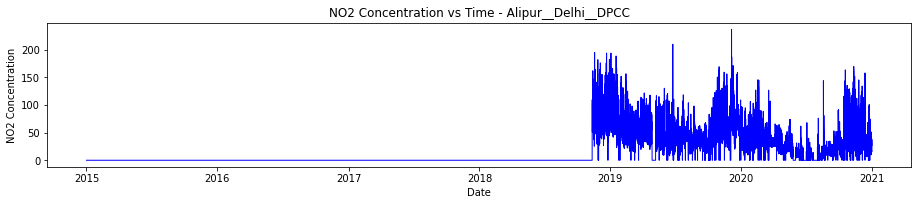

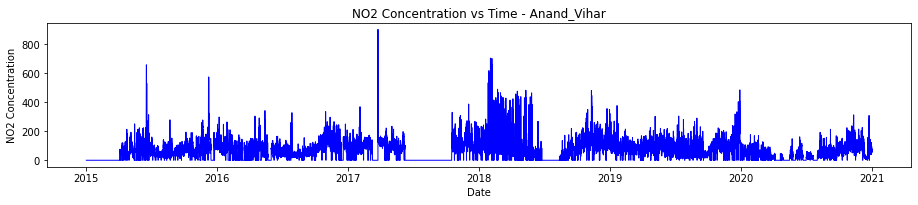

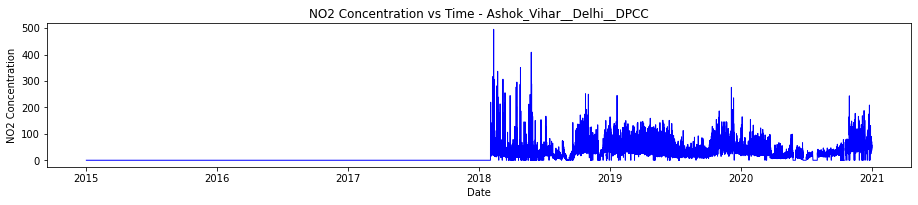

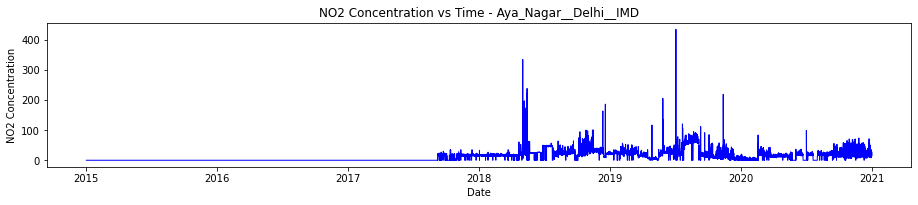

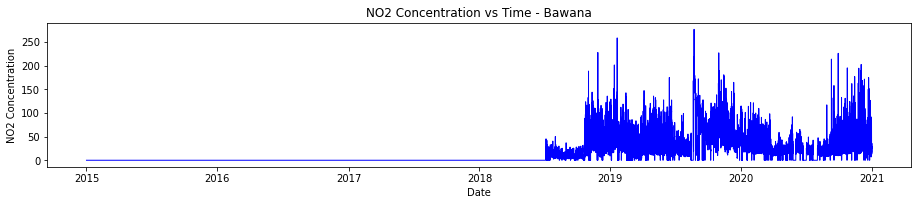

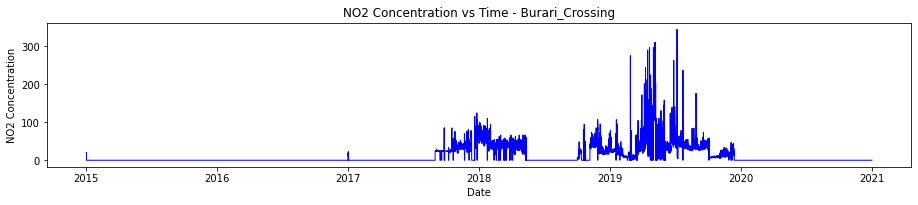

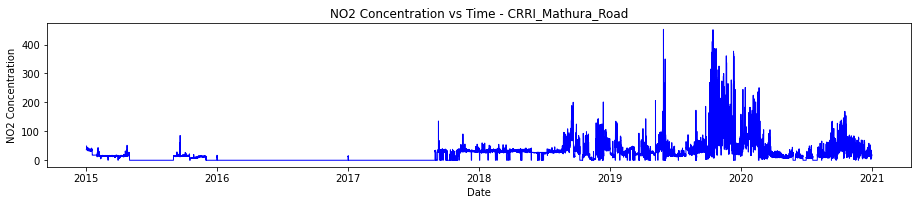

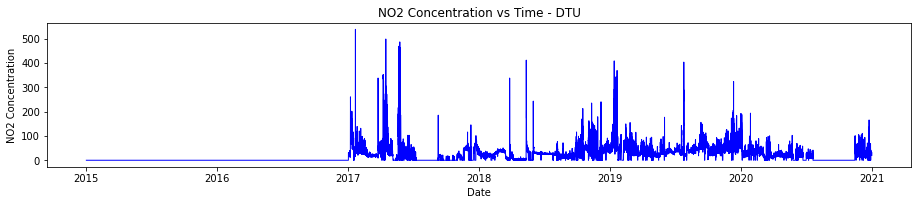

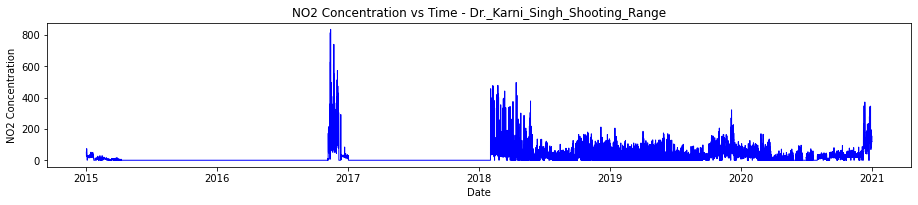

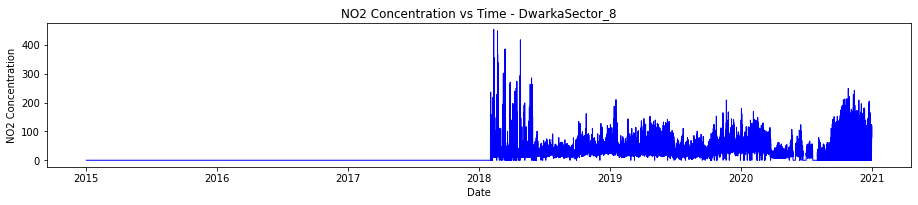

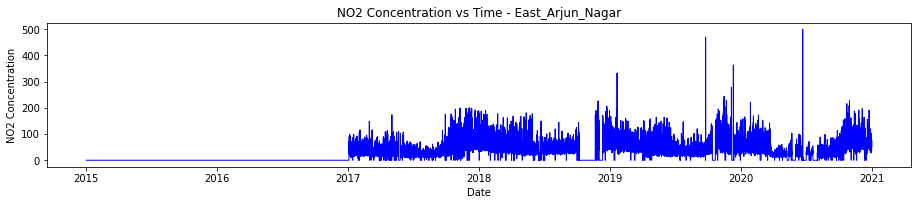

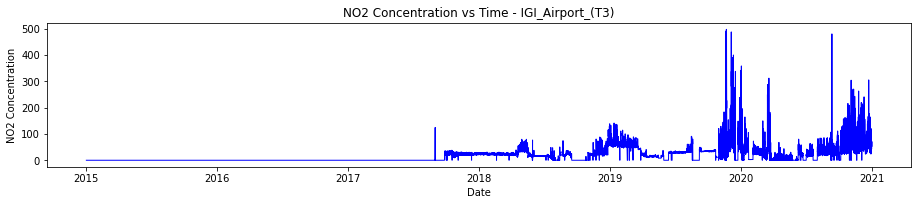

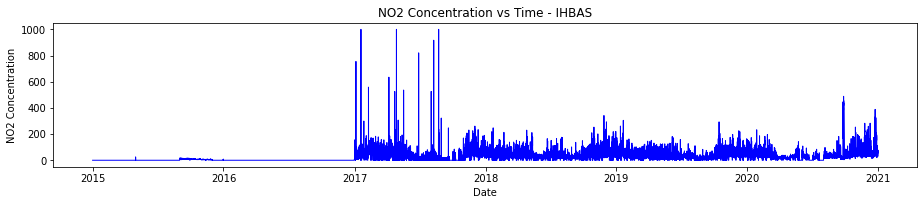

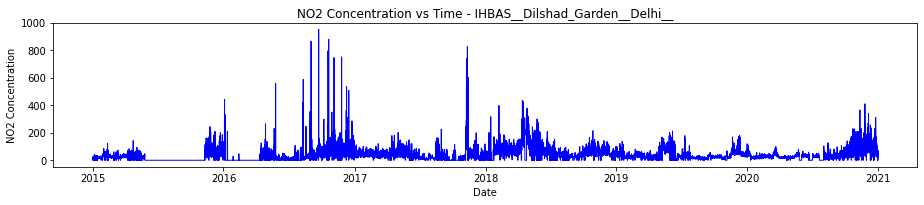

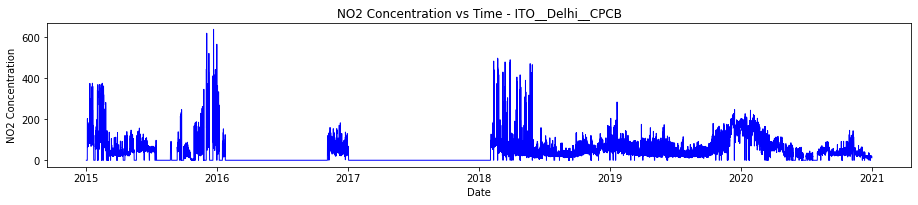

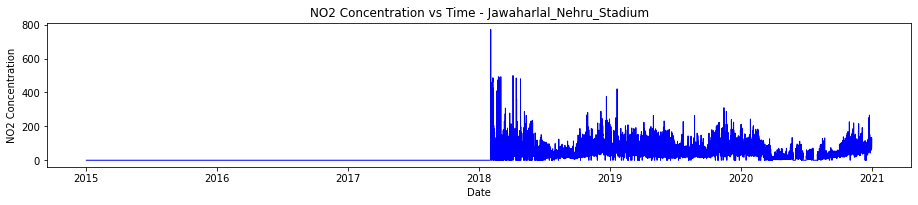

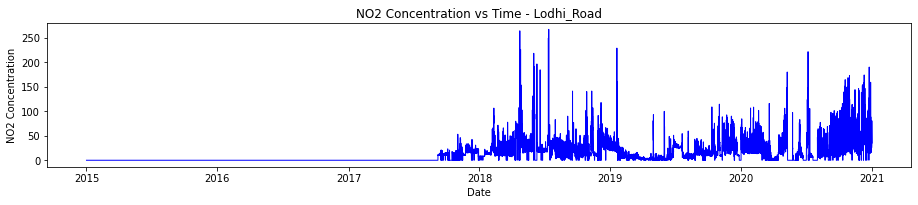

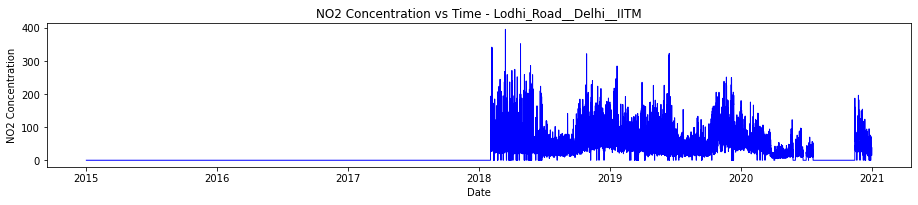

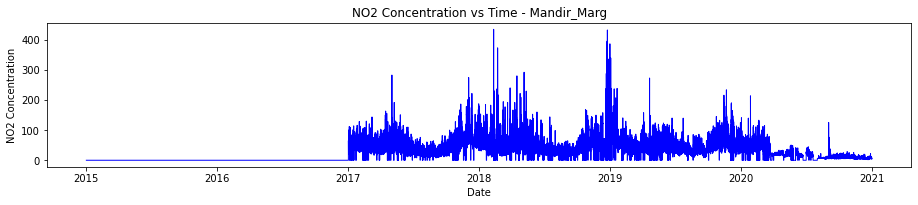

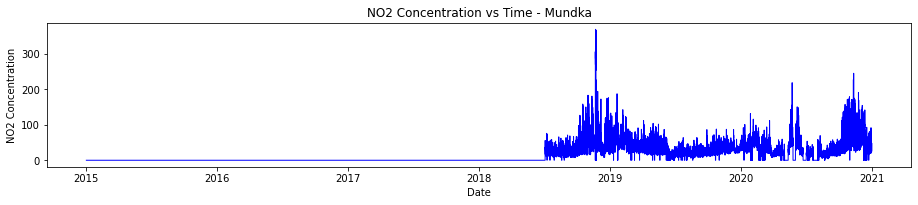

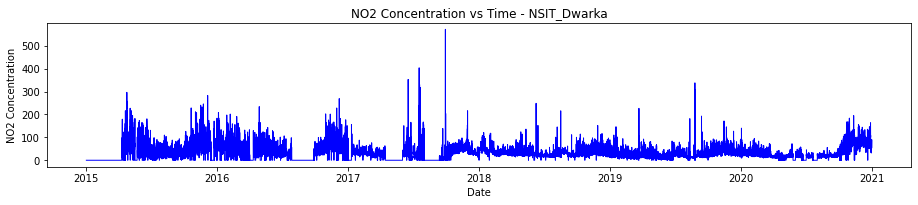

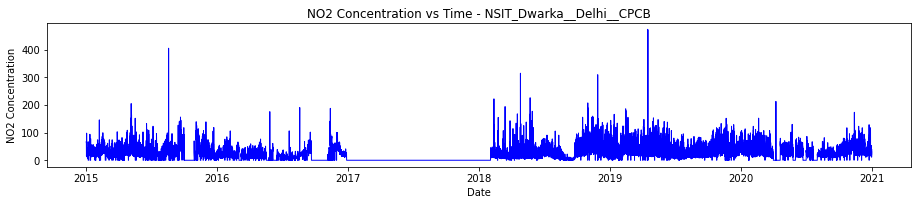

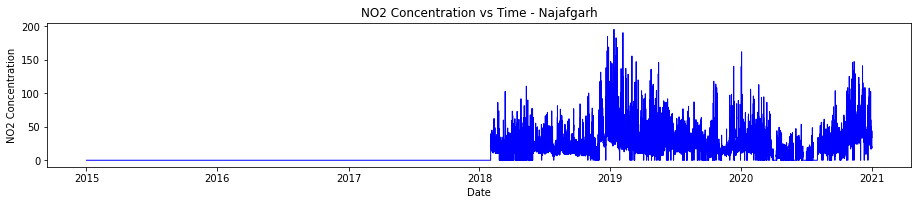

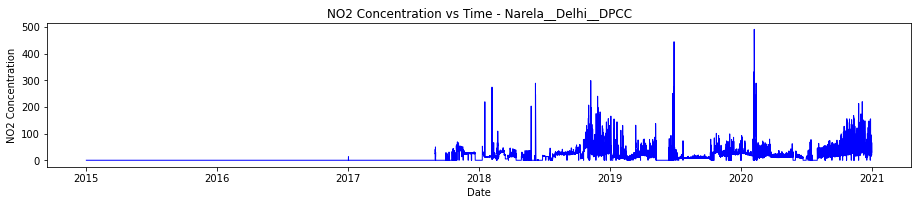

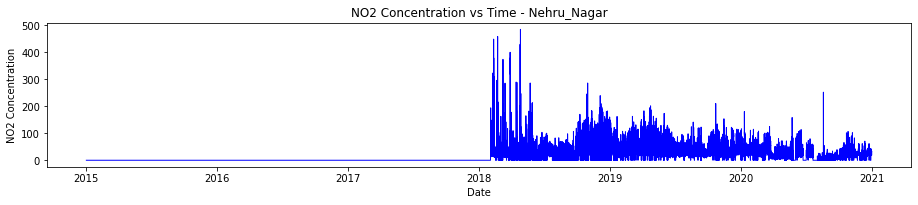

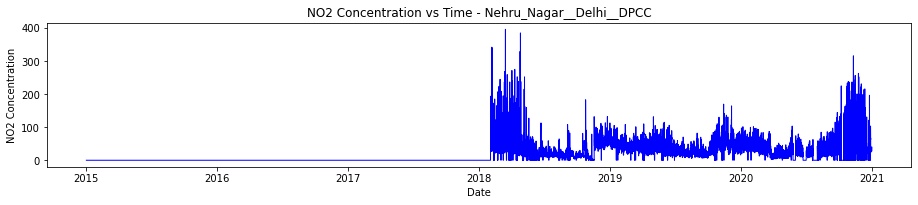

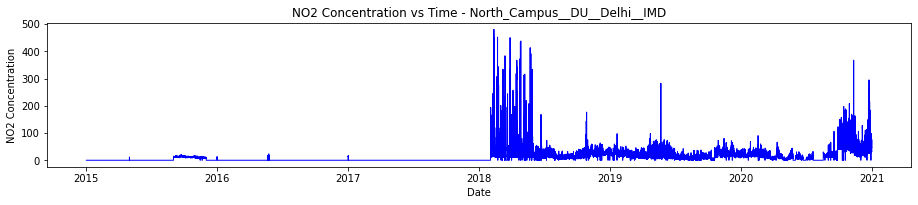

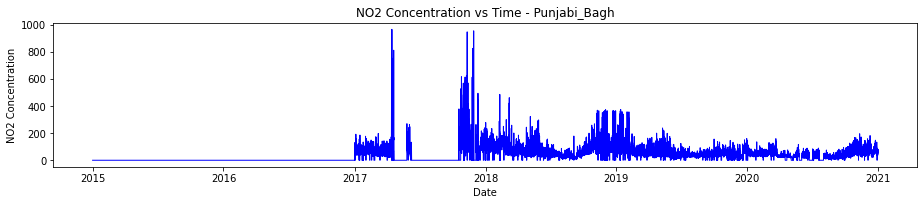

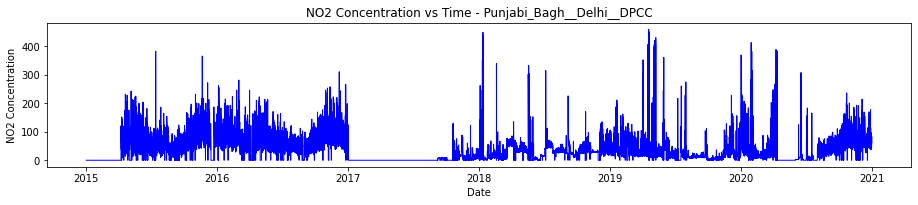

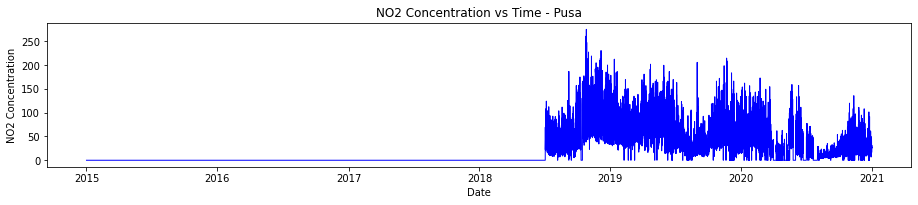

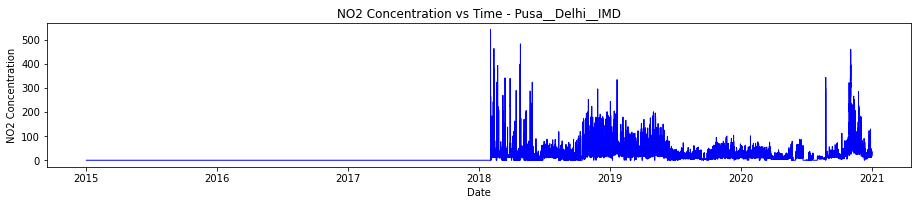

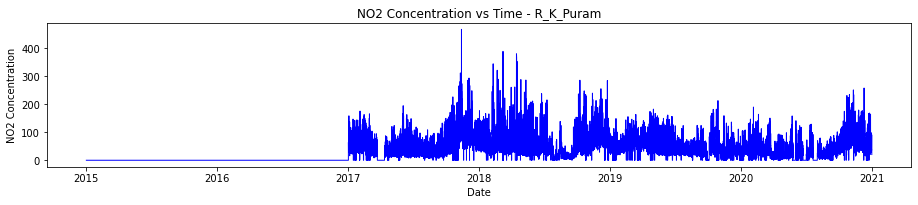

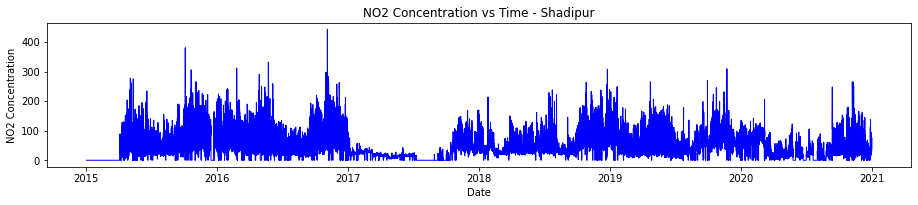

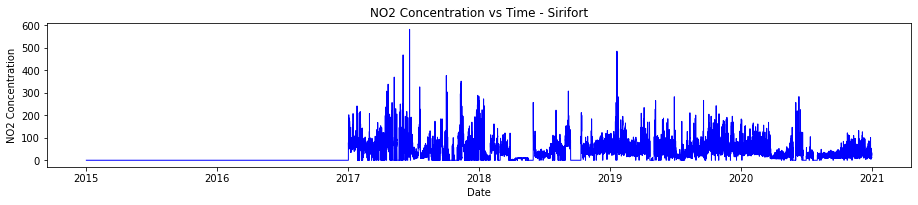

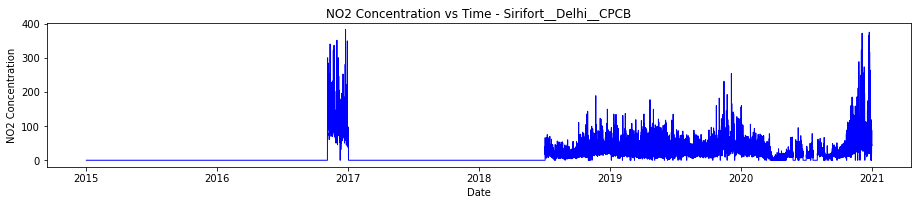

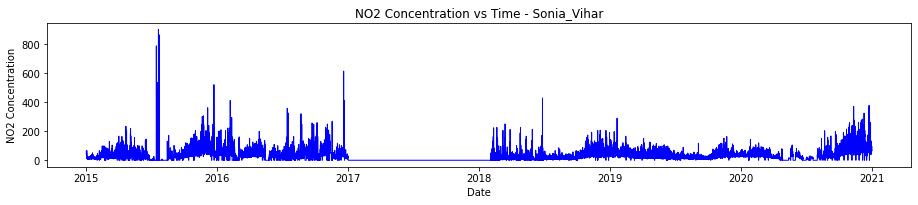

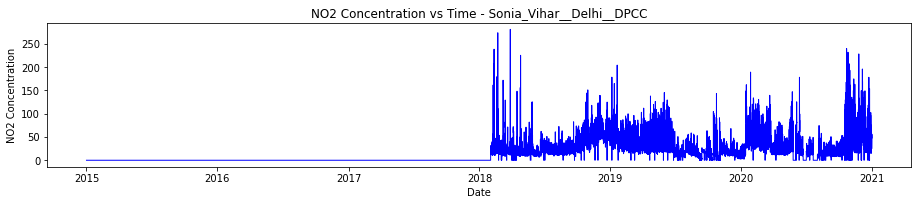

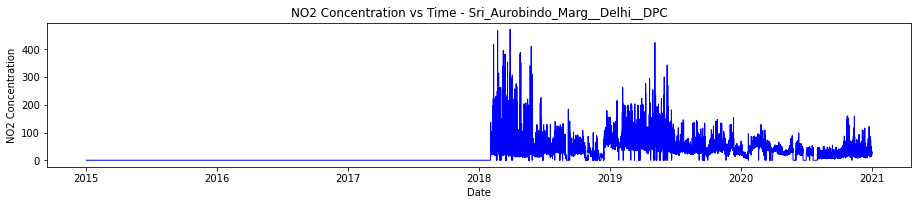

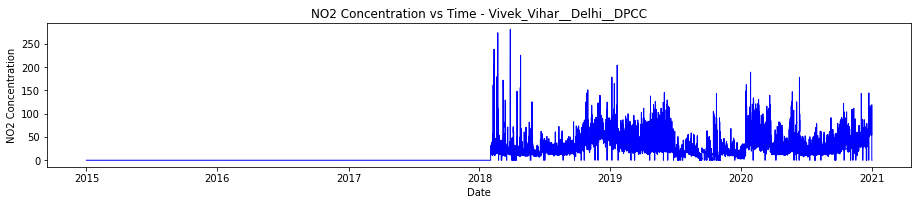

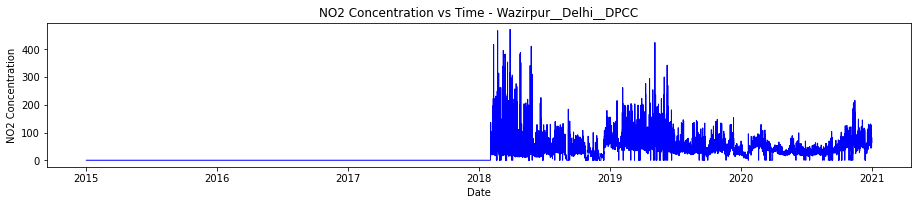

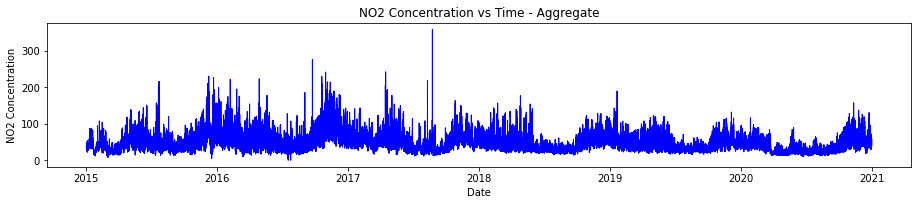

In [ ]:
# Plot NO2 Concentration at Each Location per Time
# NA values have been replaced with 0
plot_df = NO2_df.copy()
plot_df["Aggregate"] = plot_df.mean(axis = 1)
plot_df.fillna(0, inplace = True)
title_str = ""
for i in range(len(plot_df.columns)):
    plt.subplot(1, 1, 1)
    plt.plot(x_value,plot_df.iloc[:, i].values,color='blue',linewidth=1)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)
    title_str = 'NO2 Concentration vs Time - ' + plot_df.columns[i]
    plt.title(title_str); plt.xlabel('Date'); plt.ylabel('NO2 Concentration')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.5, wspace=0.2, hspace=0.2)
    plt.show()

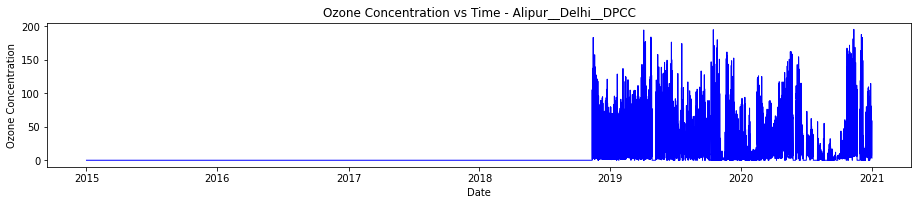

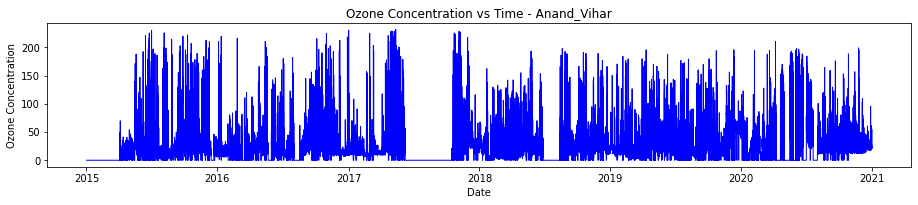

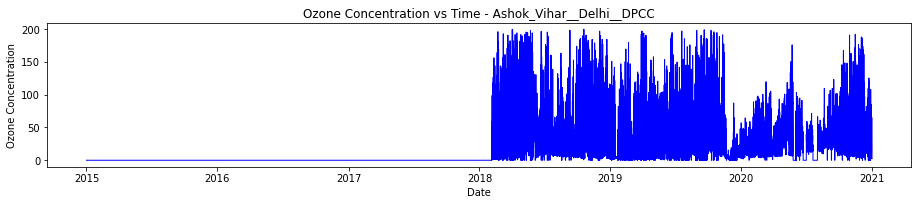

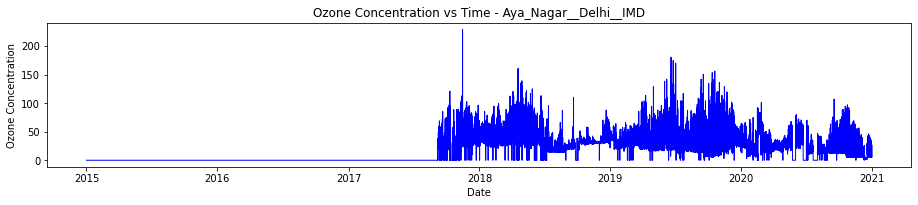

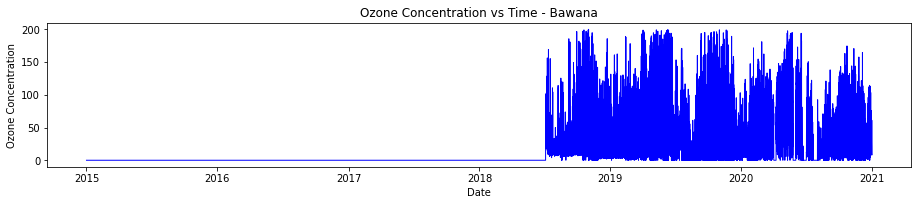

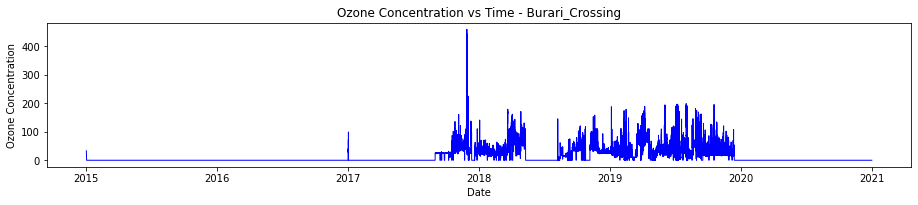

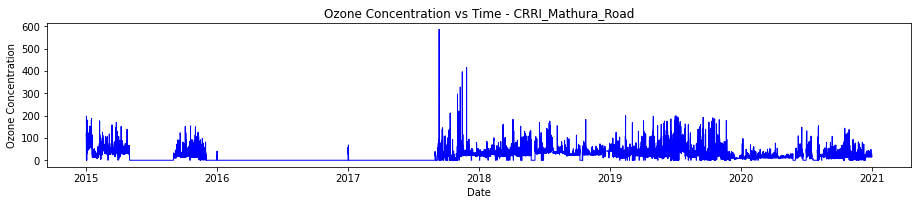

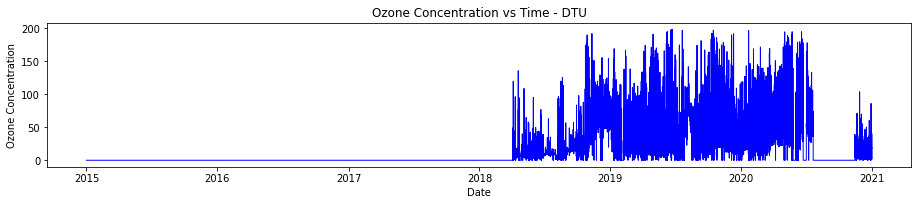

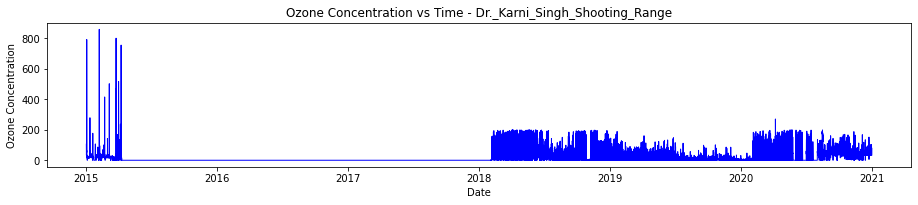

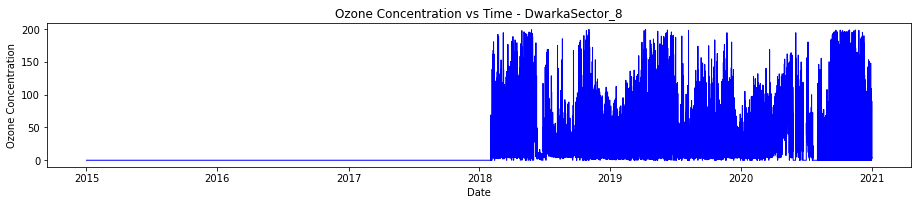

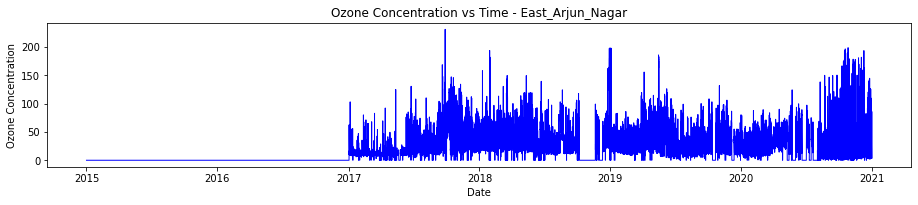

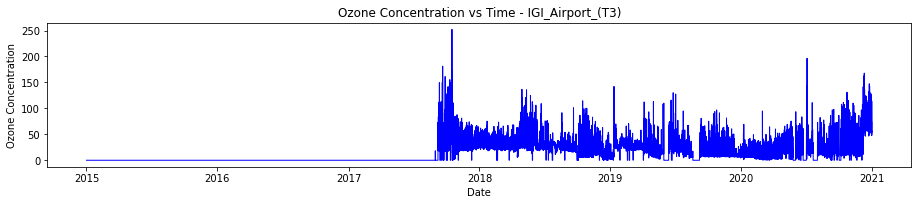

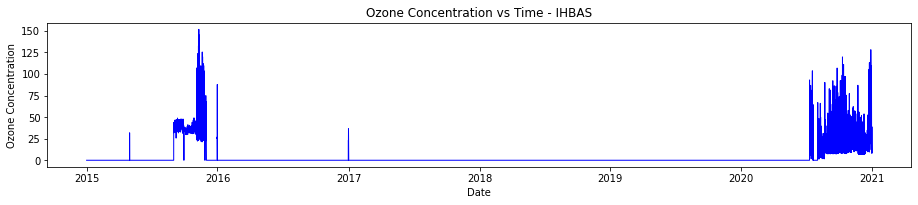

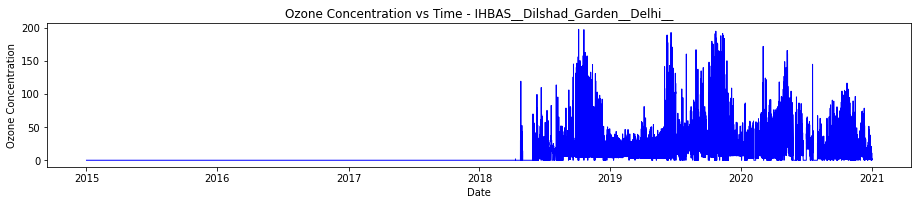

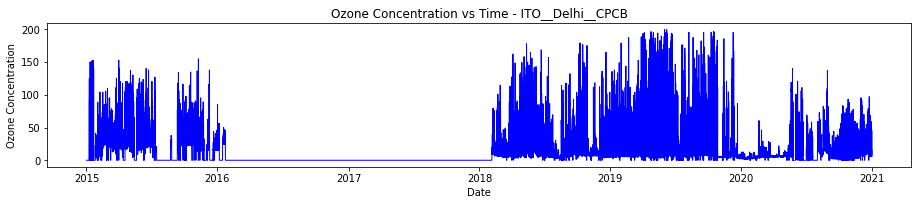

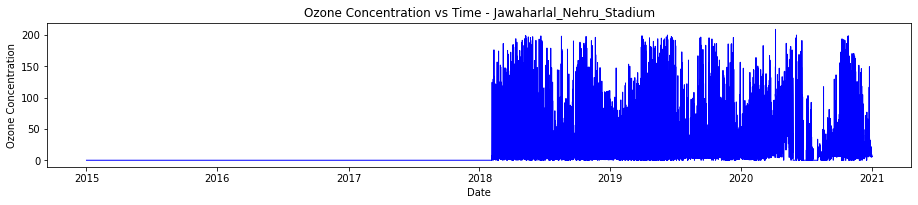

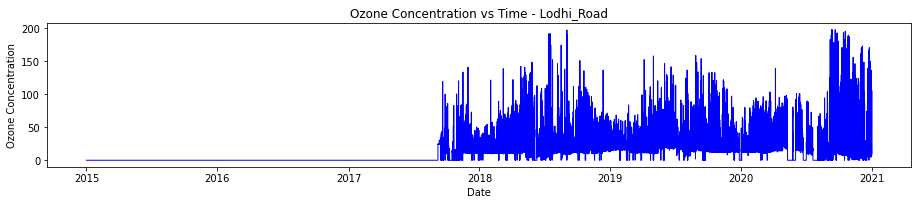

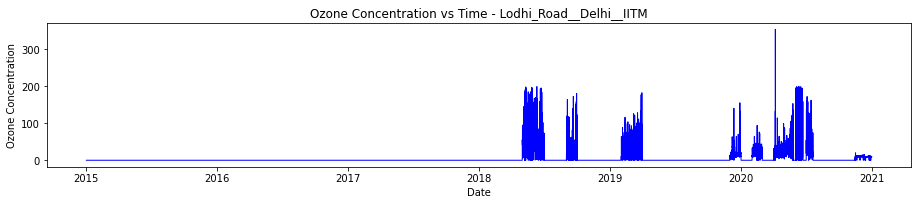

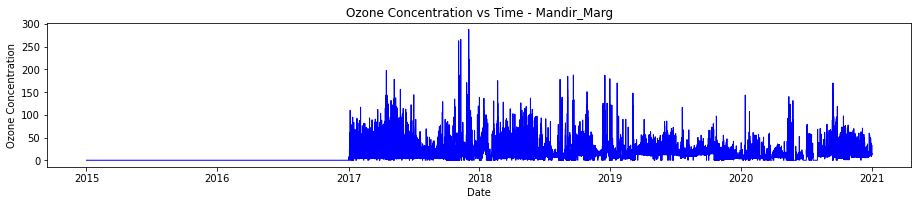

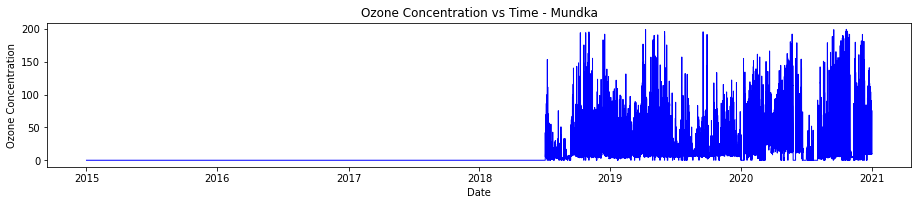

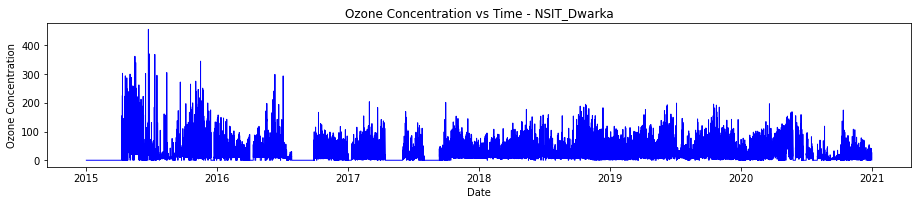

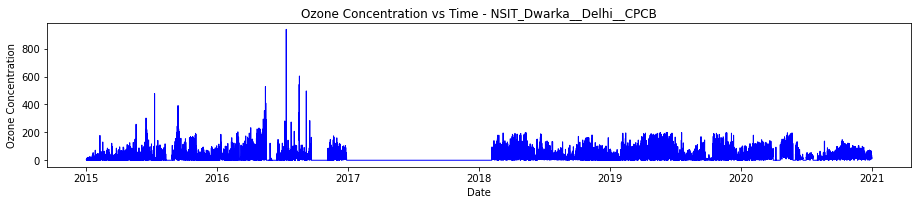

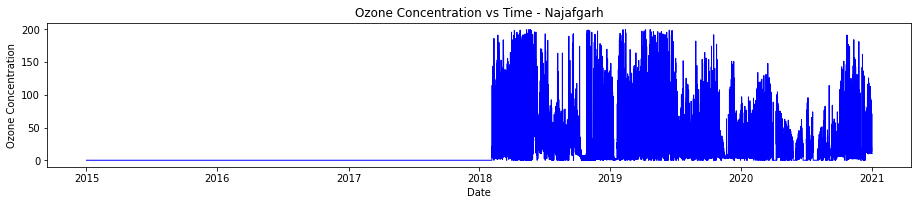

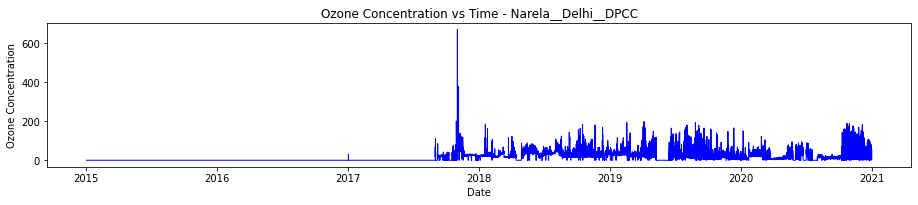

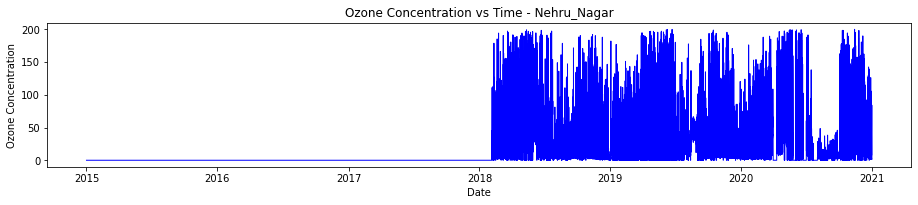

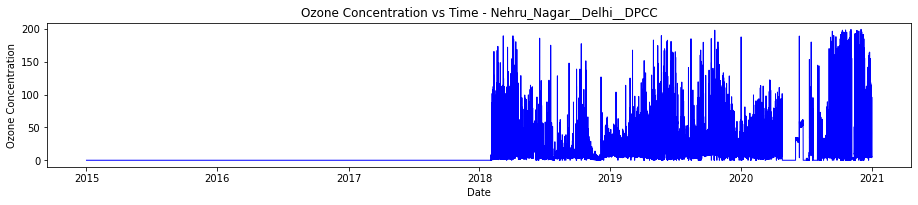

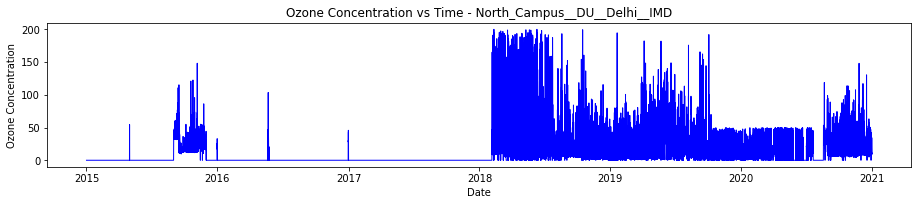

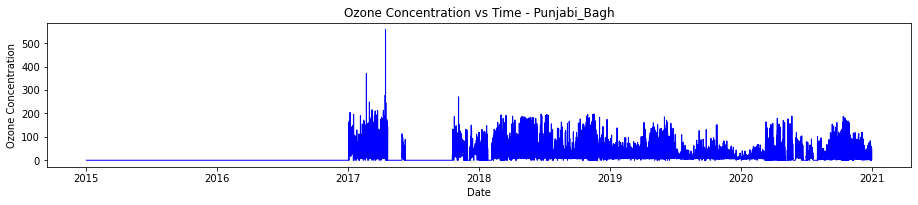

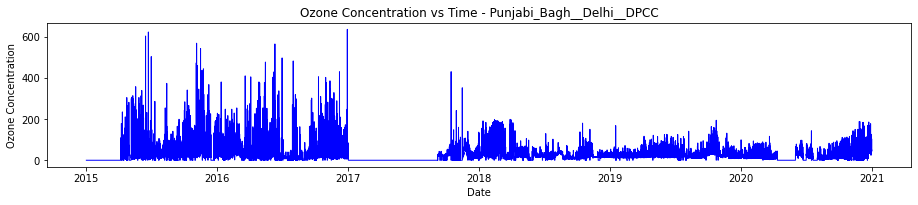

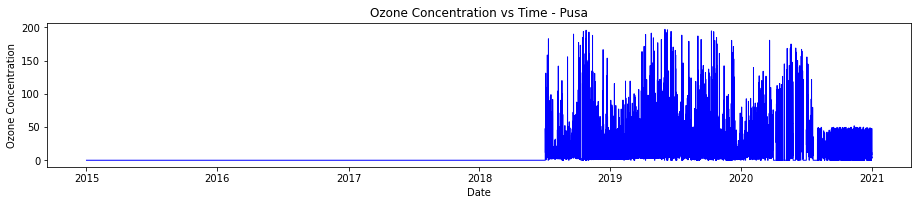

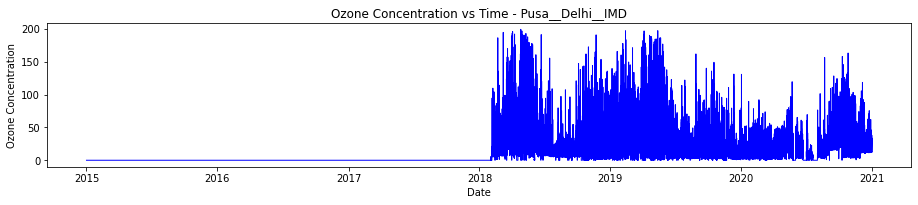

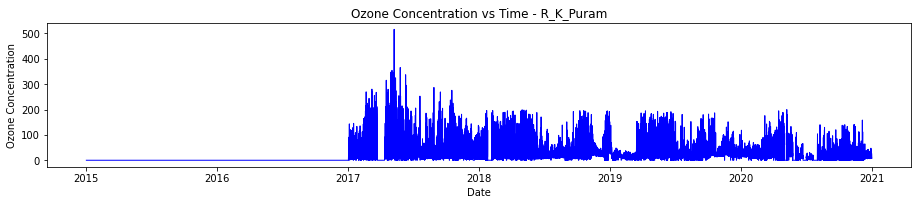

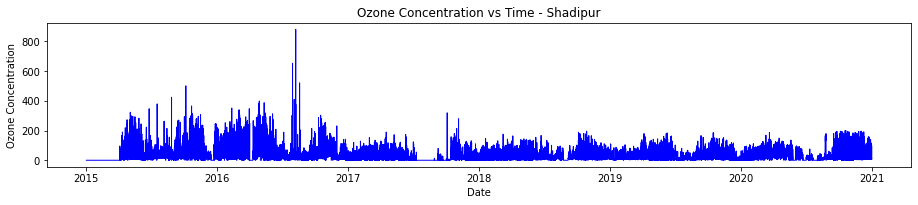

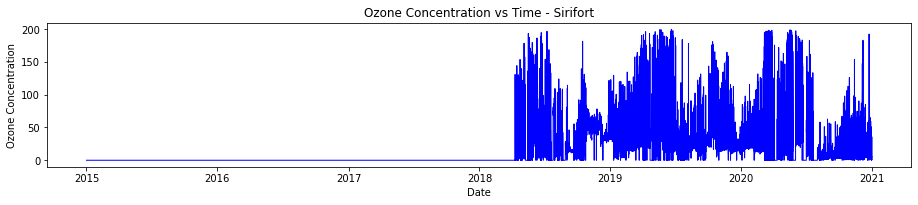

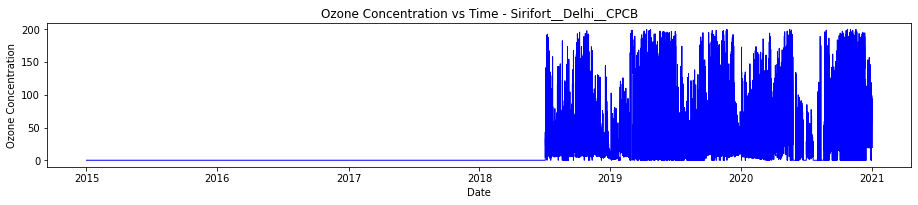

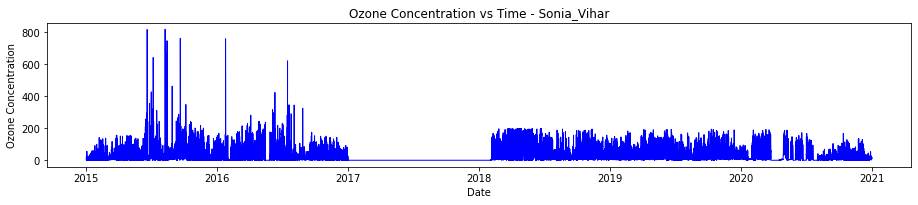

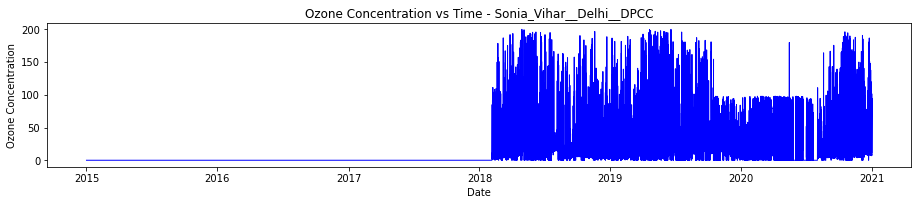

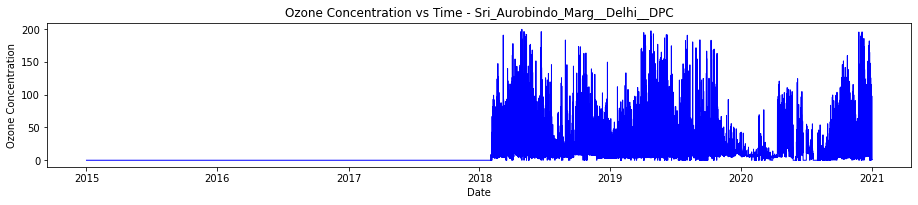

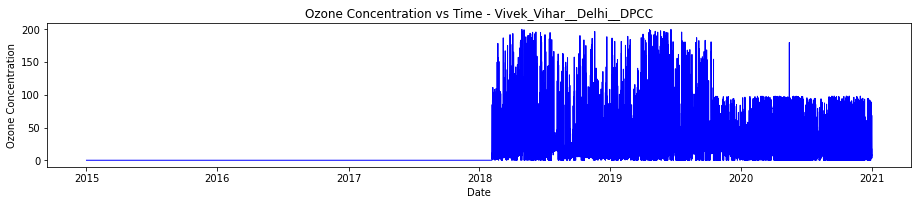

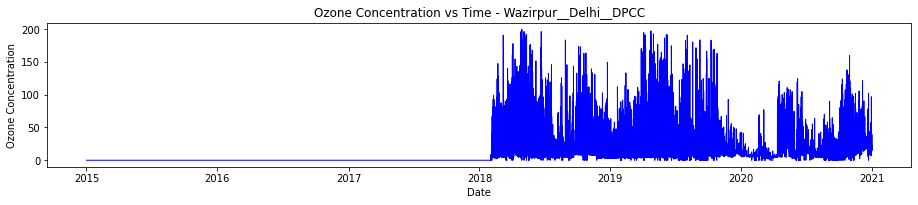

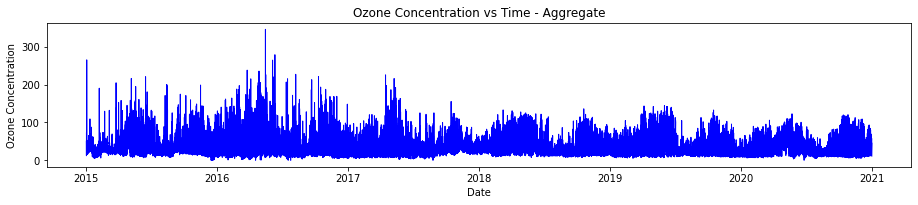

In [ ]:
# Plot Ozone Concentration at Each Location per Time
# NA values have been replaced with 0
plot_df2 = Ozone_df.copy()
plot_df2["Aggregate"] = plot_df2.mean(axis = 1)
plot_df2.fillna(0, inplace = True)
title_str = ""
for i in range(len(plot_df2.columns)):
    plt.subplot(1, 1, 1)
    plt.plot(x_value,plot_df2.iloc[:, i].values,color='blue',linewidth=1)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)
    title_str = 'Ozone Concentration vs Time - ' + plot_df2.columns[i]
    plt.title(title_str); plt.xlabel('Date'); plt.ylabel('Ozone Concentration')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.5, wspace=0.2, hspace=0.2)
    plt.show()

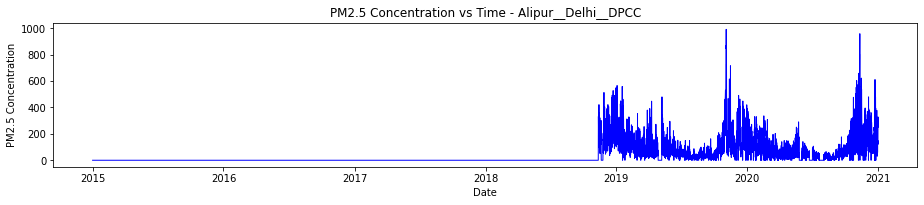

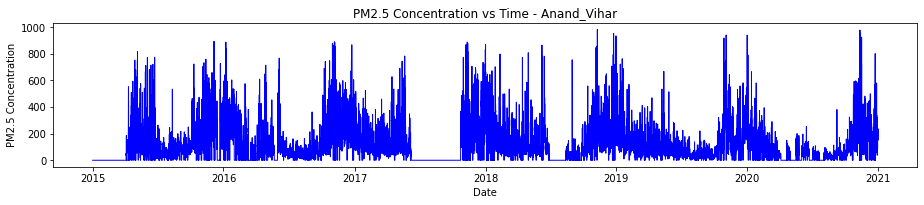

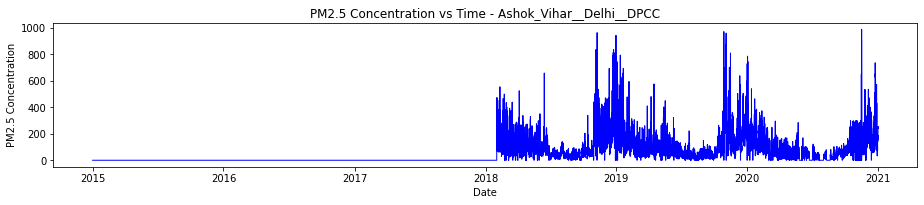

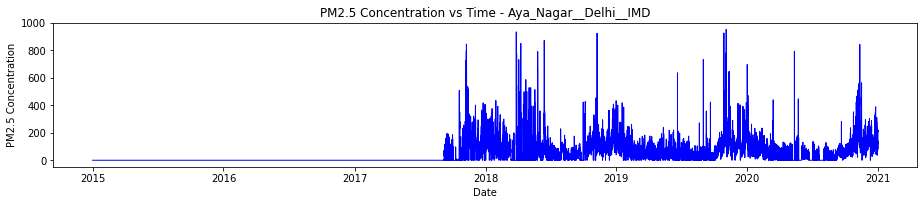

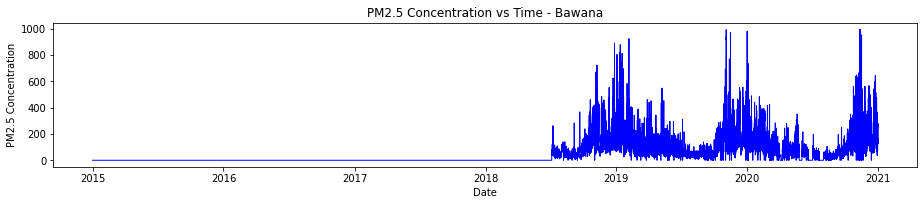

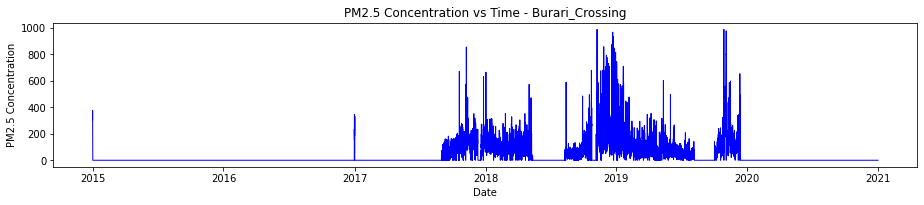

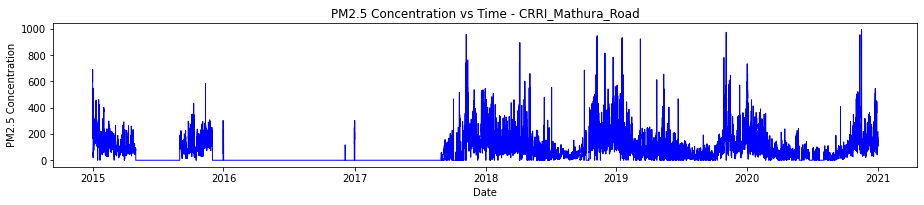

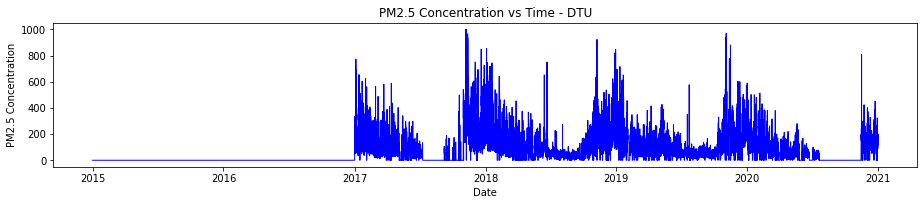

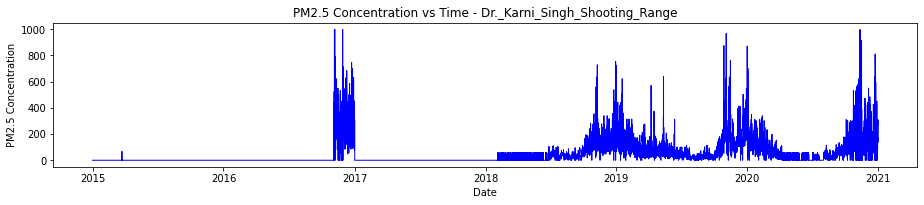

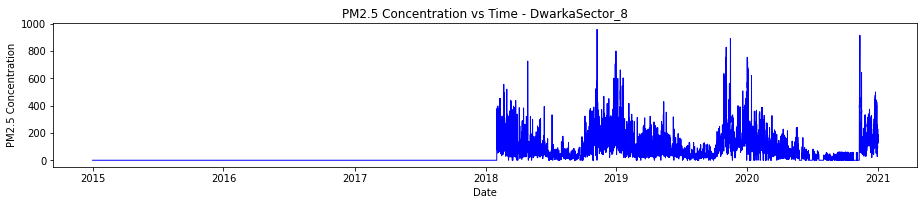

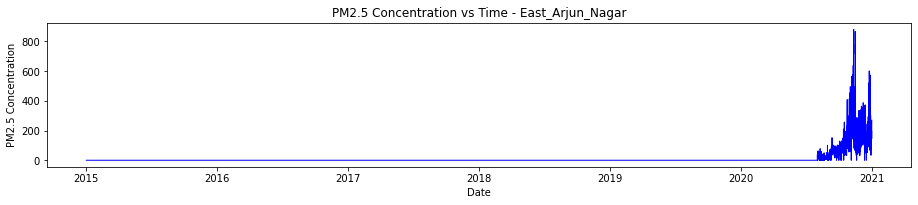

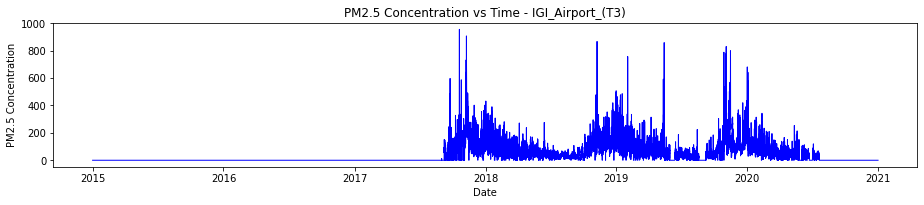

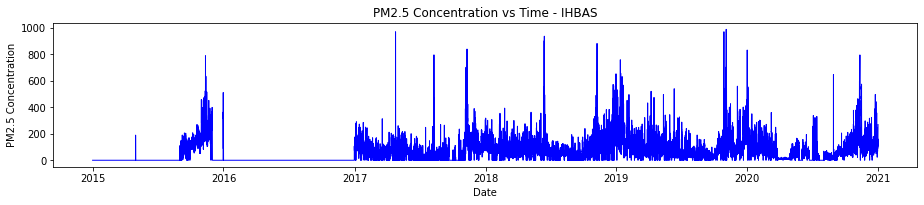

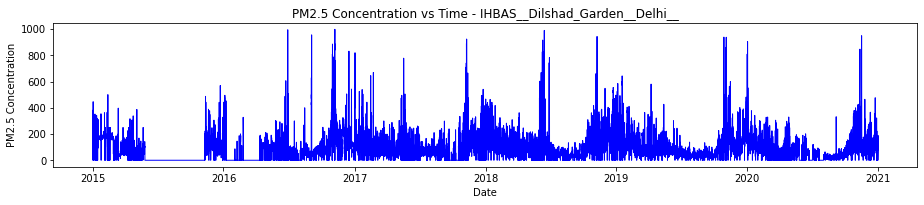

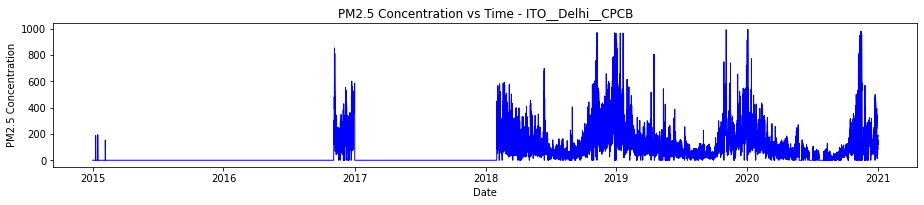

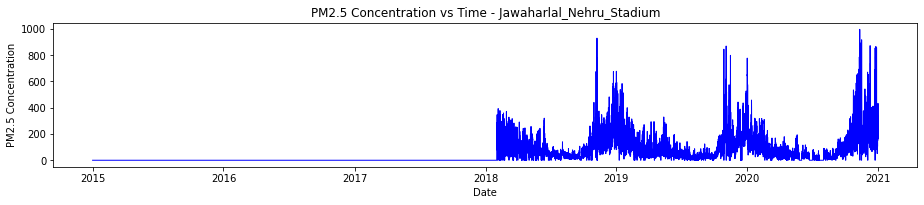

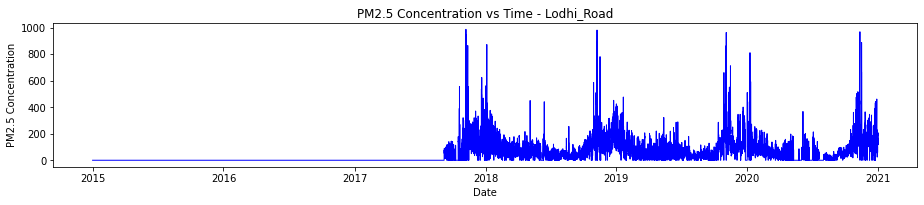

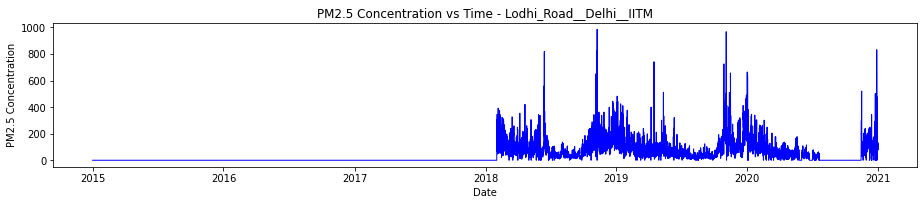

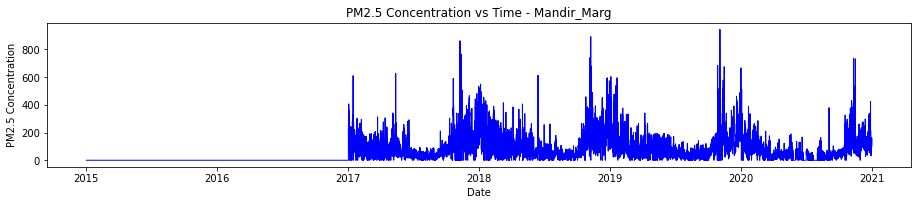

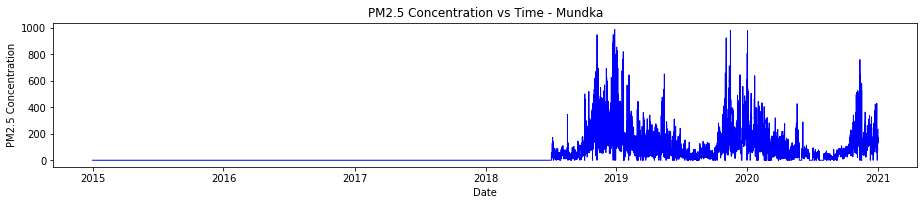

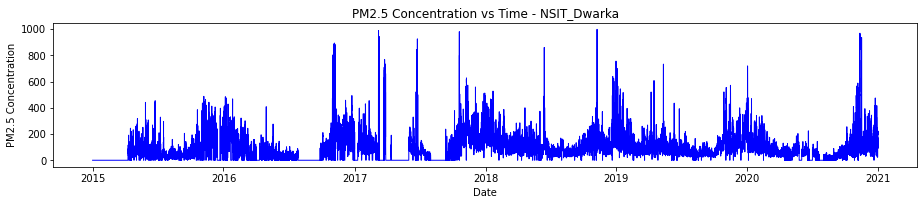

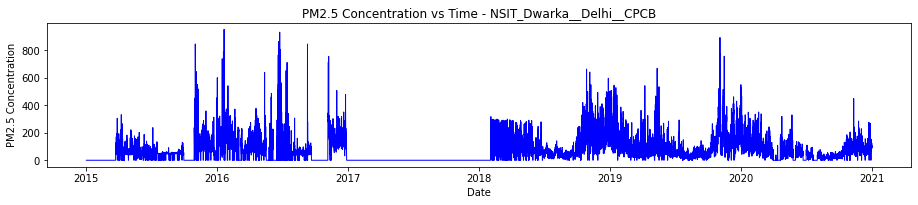

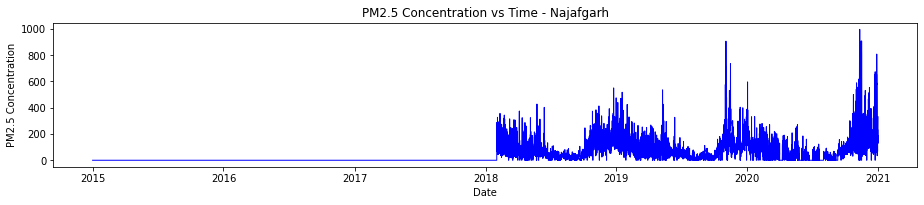

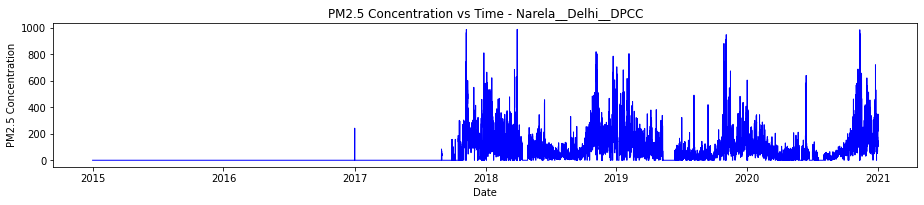

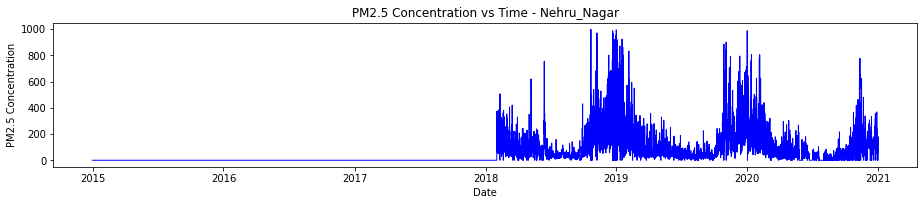

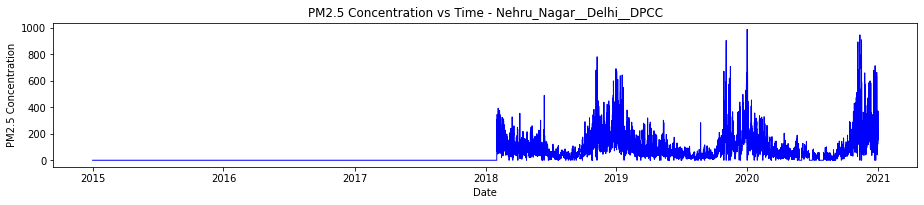

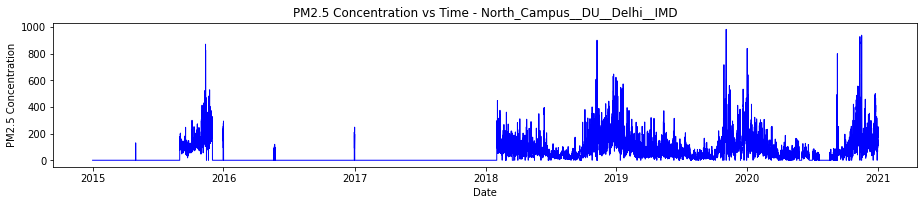

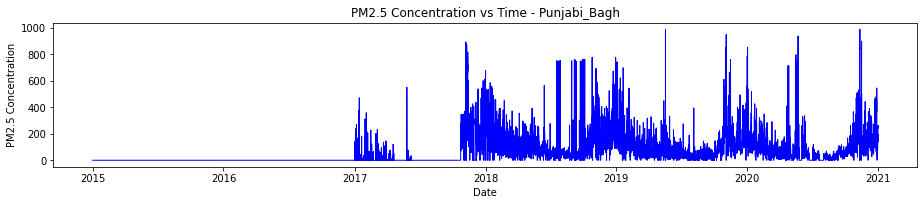

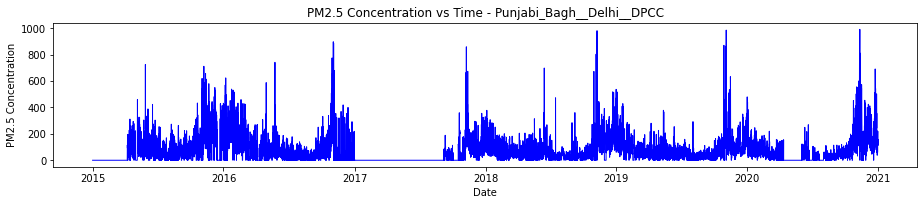

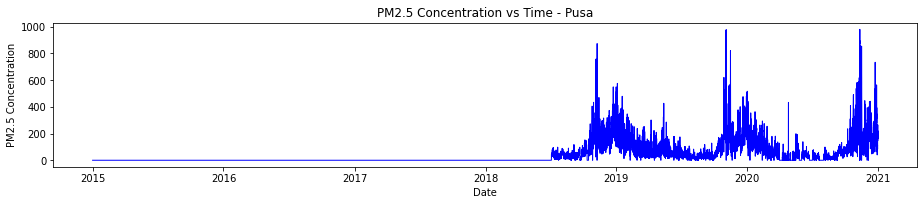

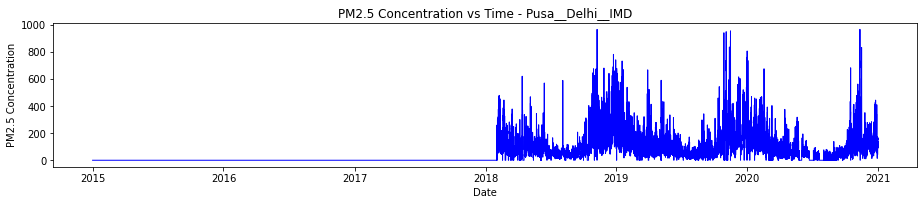

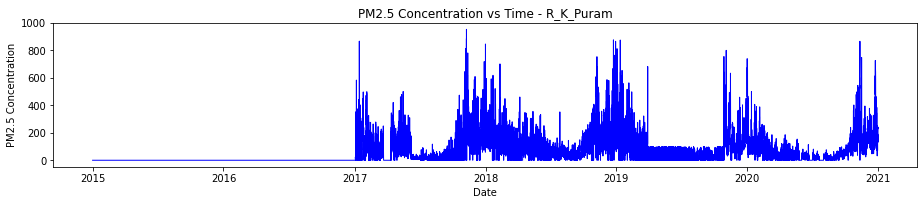

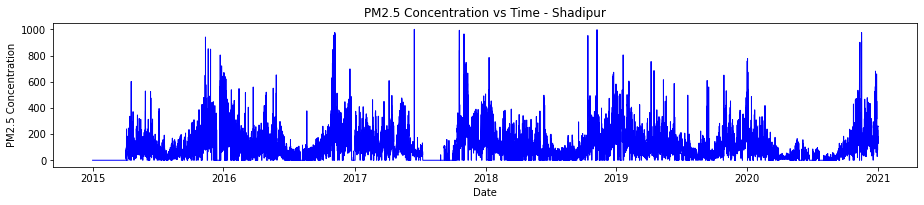

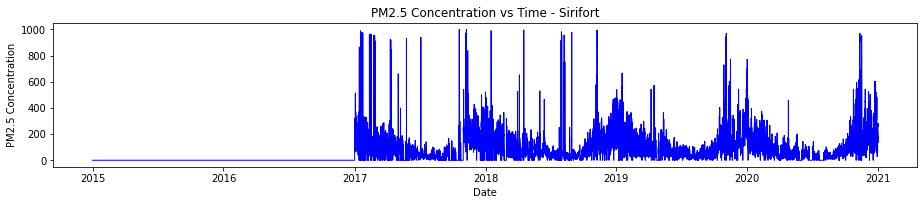

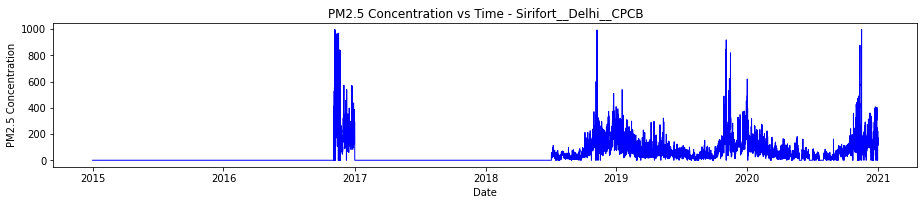

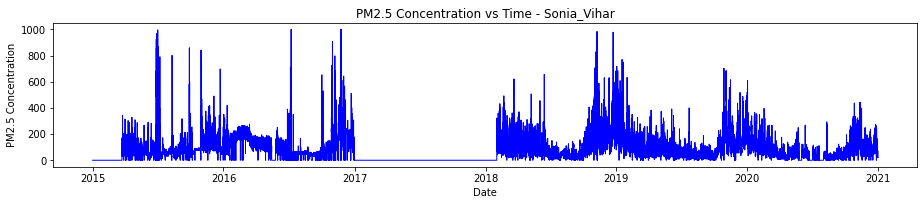

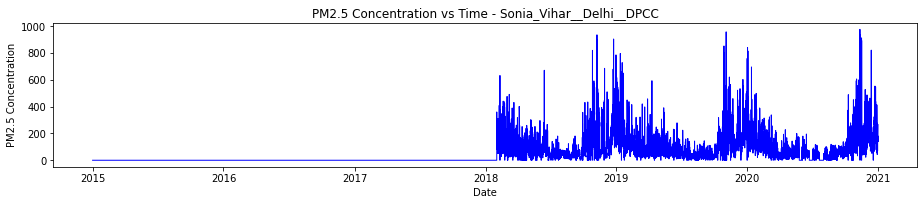

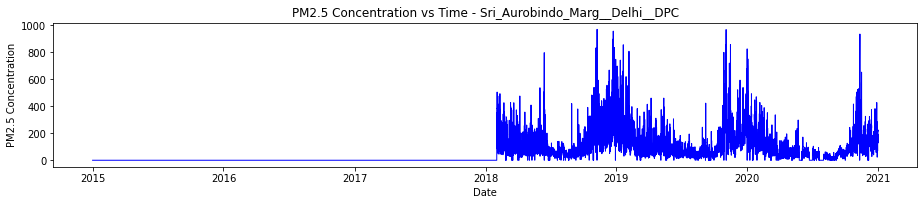

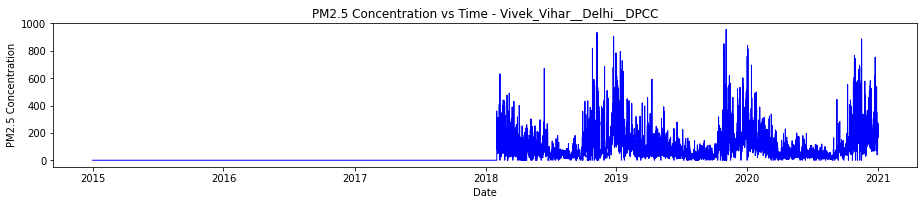

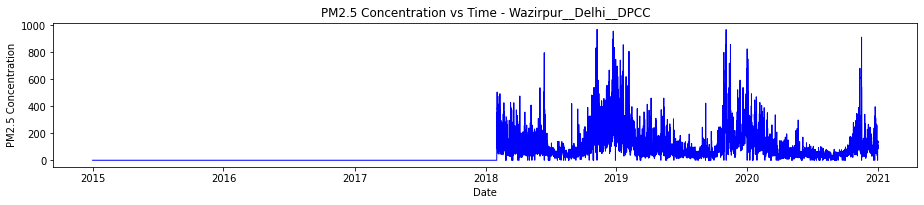

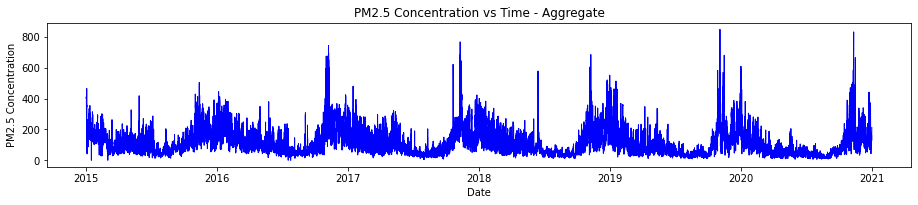

In [ ]:
# Plot PM2.5 Concentration at Each Location per Time
# NA values have been replaced with 0
plot_df3 = PM25_df.copy()
plot_df3["Aggregate"] = plot_df3.mean(axis = 1)
plot_df3.fillna(0, inplace = True)
title_str = ""
for i in range(len(plot_df3.columns)):
    plt.subplot(1, 1, 1)
    plt.plot(x_value,plot_df3.iloc[:, i].values,color='blue',linewidth=1)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)
    title_str = 'PM2.5 Concentration vs Time - ' + plot_df3.columns[i]
    plt.title(title_str); plt.xlabel('Date'); plt.ylabel('PM2.5 Concentration')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.5, wspace=0.2, hspace=0.2)
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

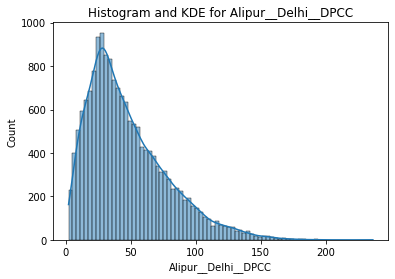

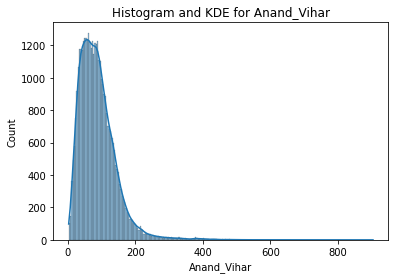

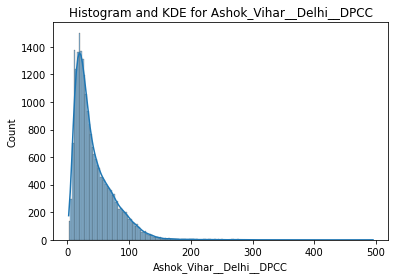

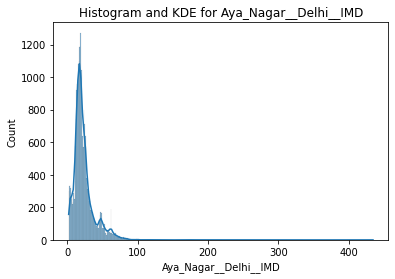

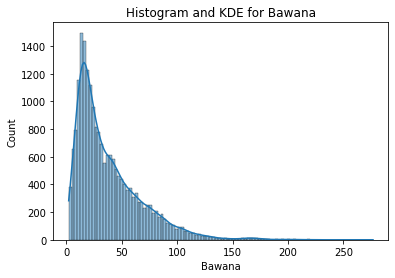

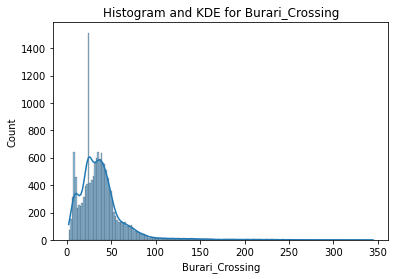

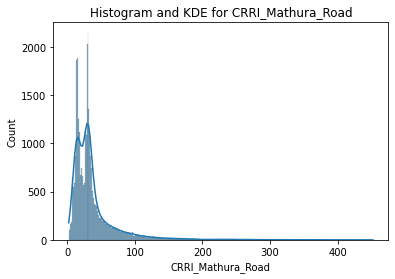

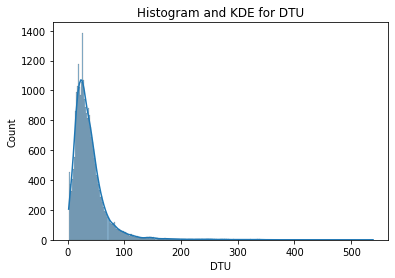

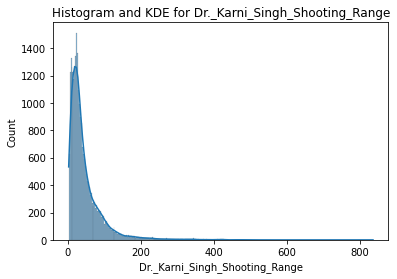

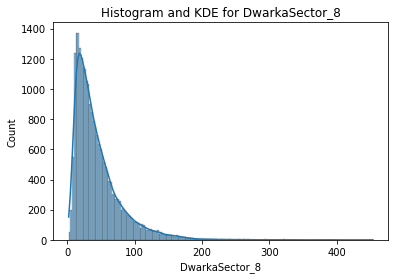

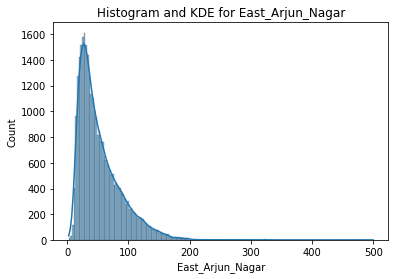

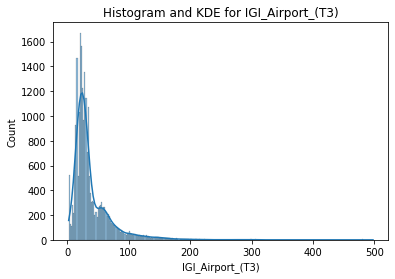

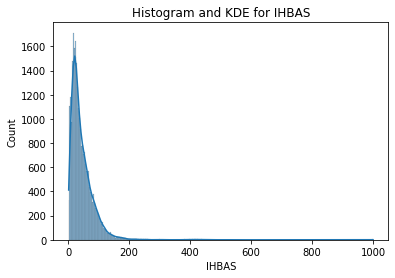

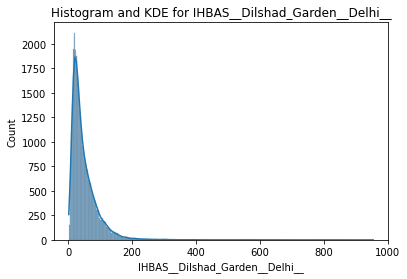

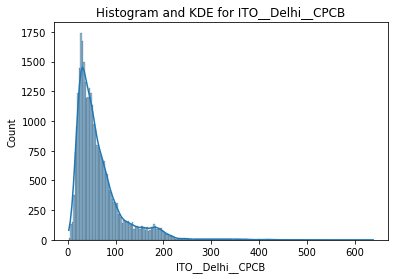

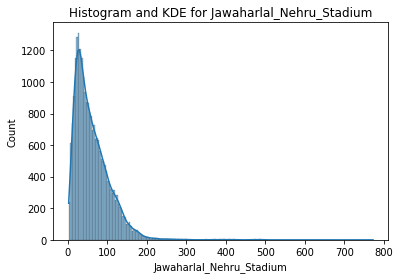

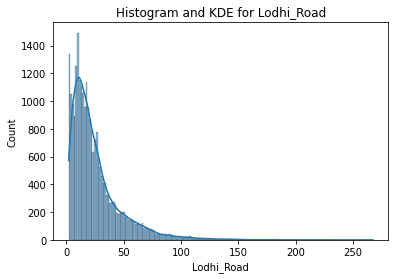

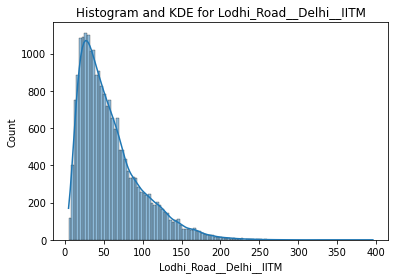

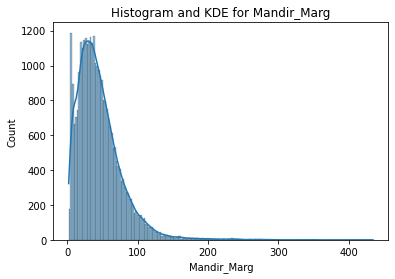

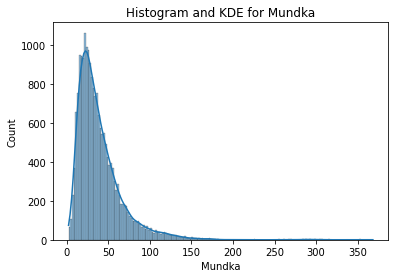

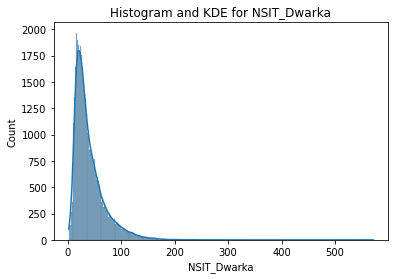

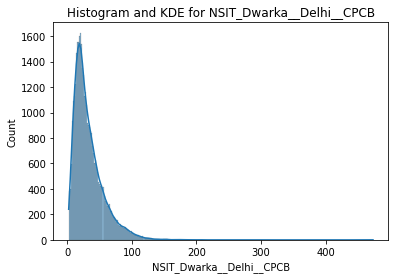

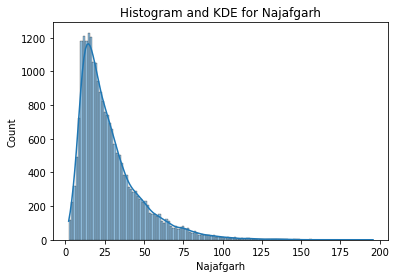

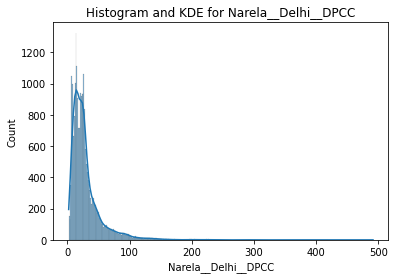

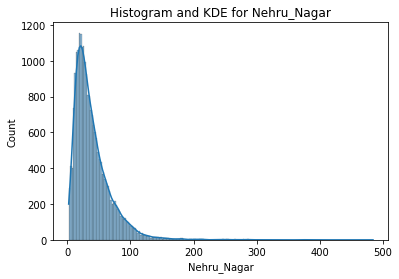

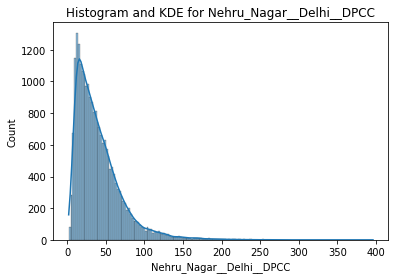

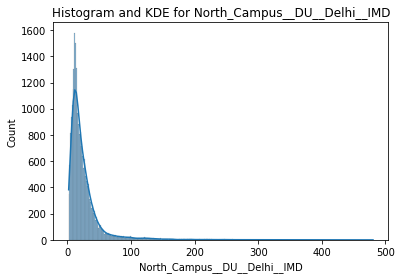

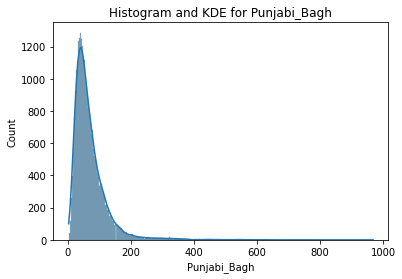

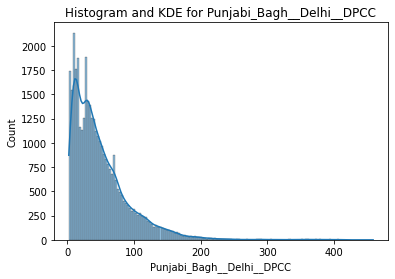

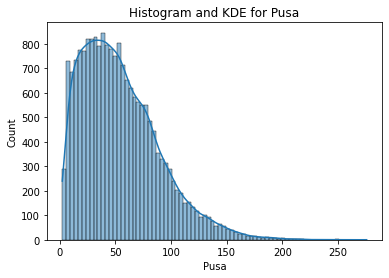

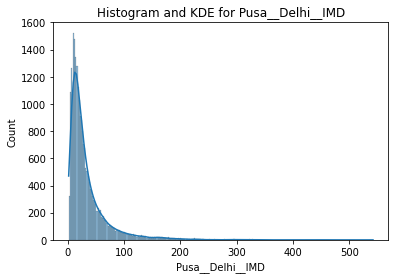

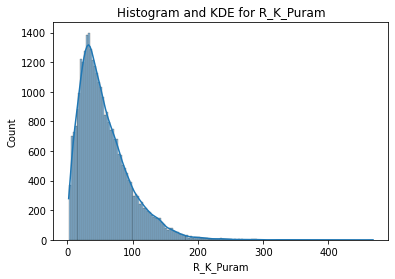

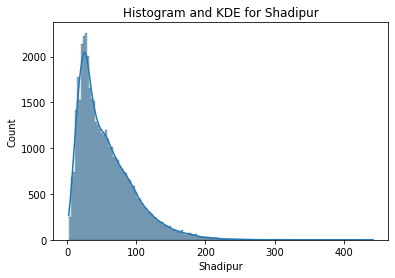

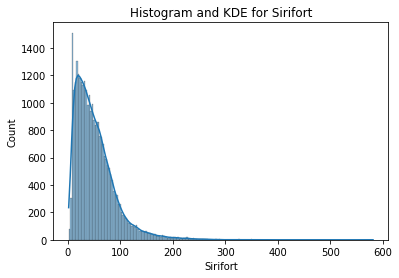

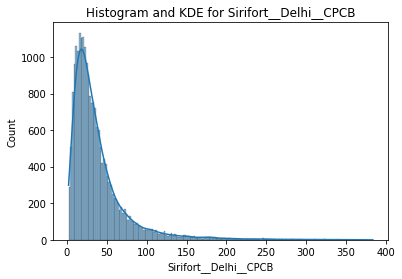

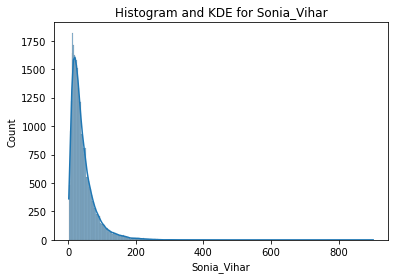

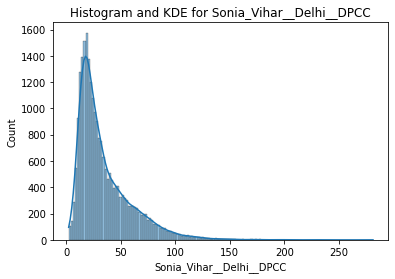

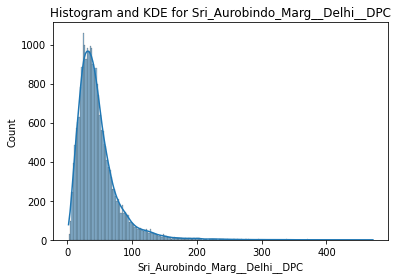

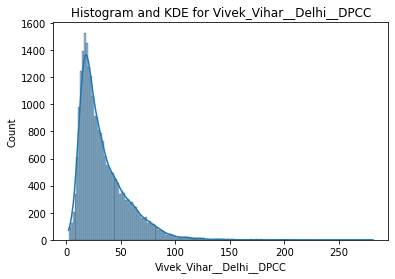

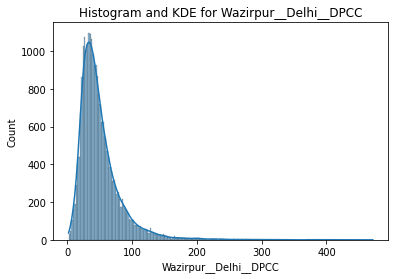

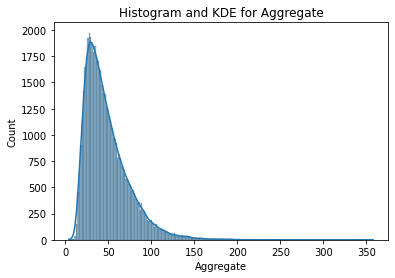

In [ ]:
#Histograms
hist_df1 = NO2_df.copy()
hist_df1["Aggregate"] = hist_df1.mean(axis = 1)
for i in range(len(hist_df1.columns)):
  plt.figure()
  title_str = "Histogram and KDE for " + hist_df1.columns[i]
  sns.histplot(data = hist_df1, x = hist_df1.iloc[:, i], kde = True).set(title = title_str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

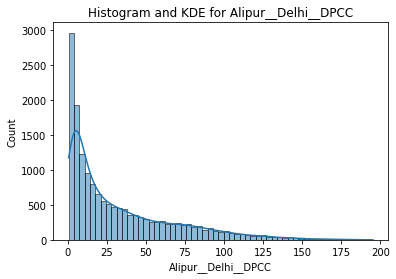

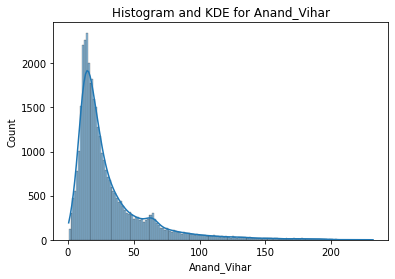

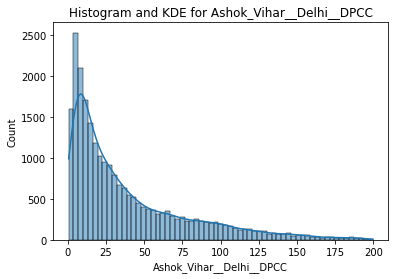

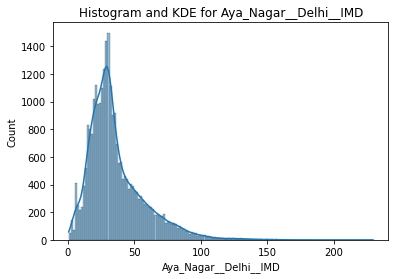

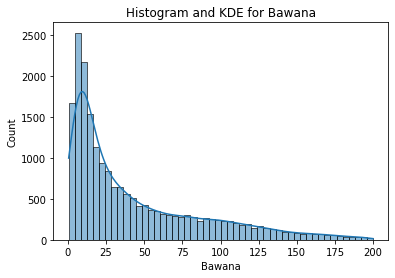

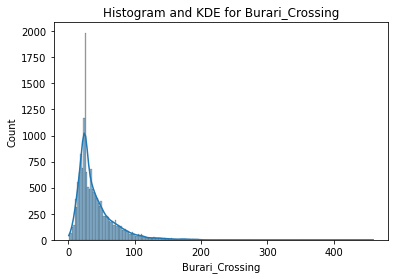

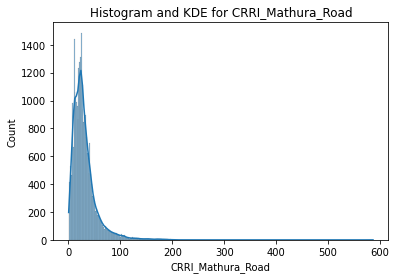

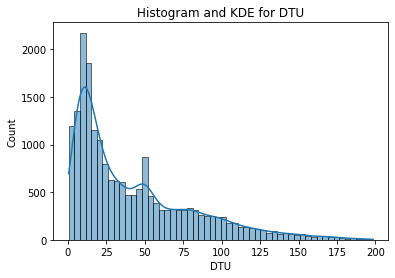

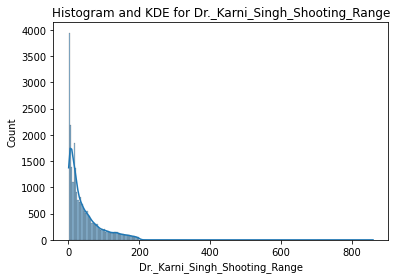

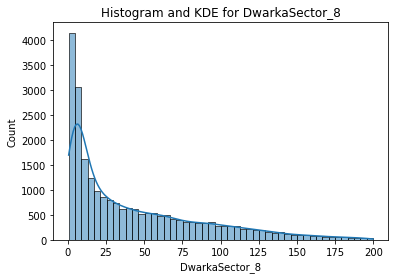

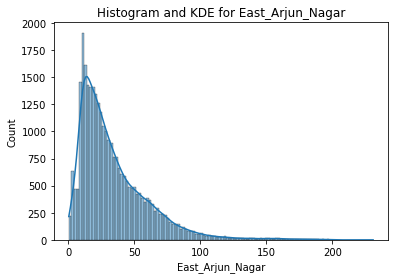

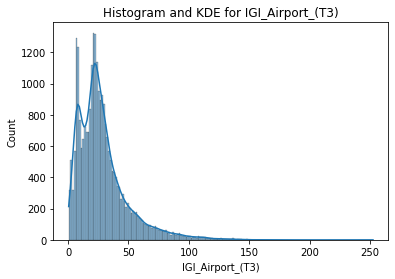

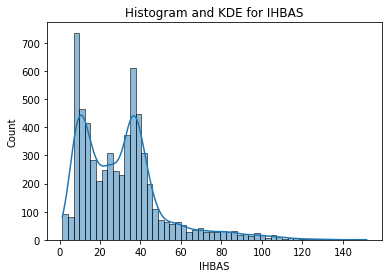

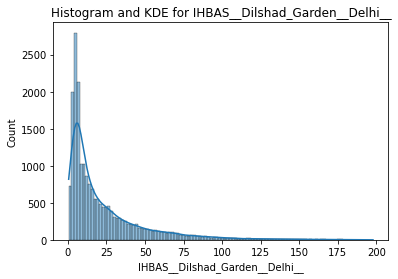

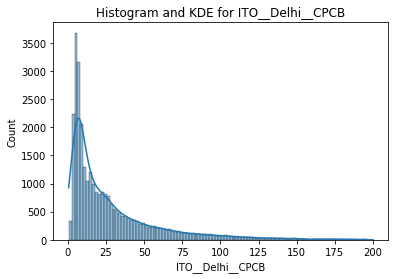

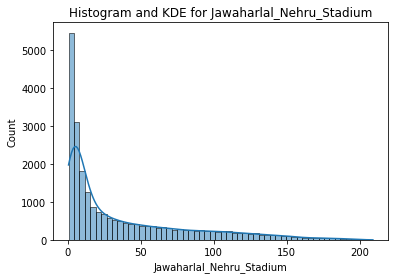

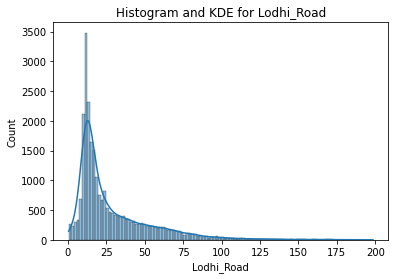

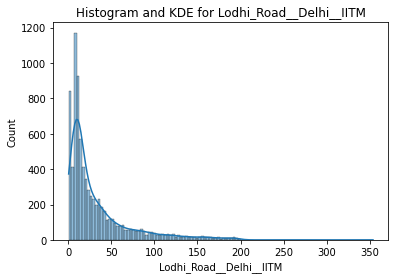

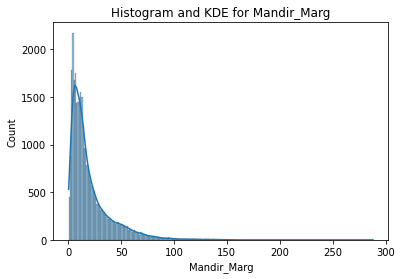

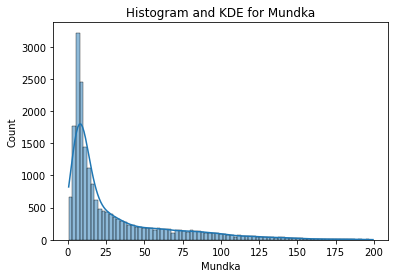

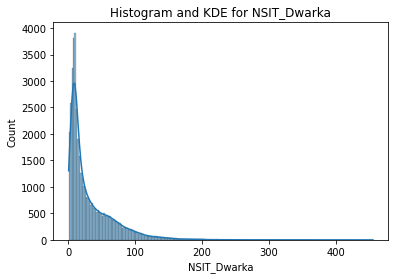

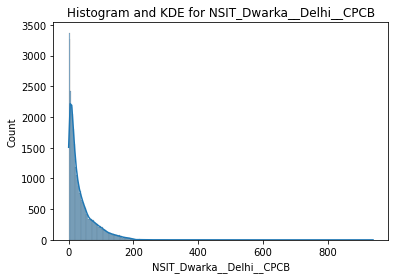

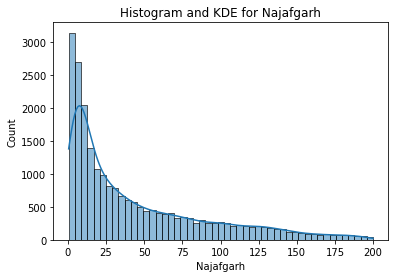

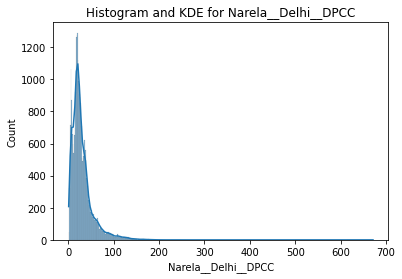

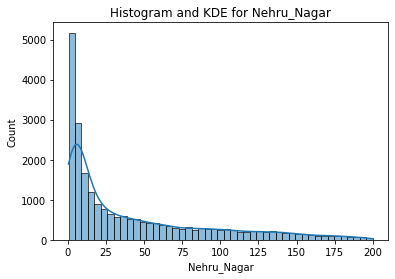

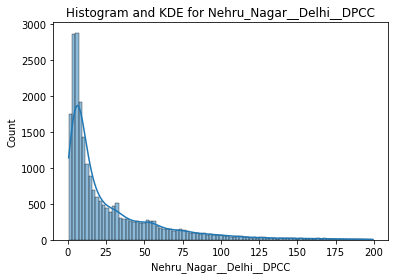

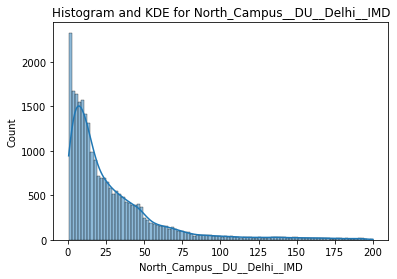

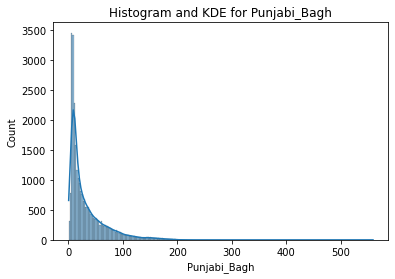

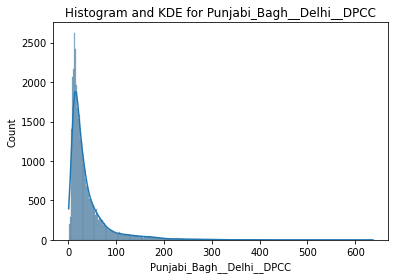

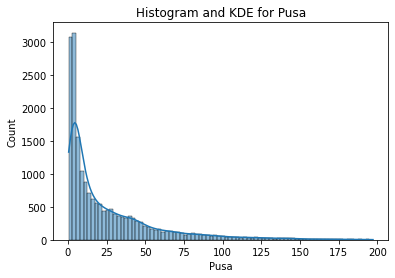

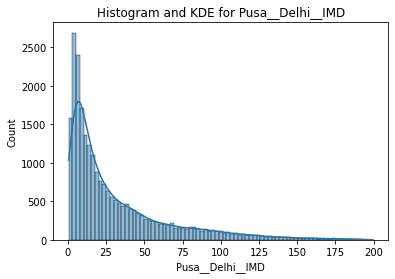

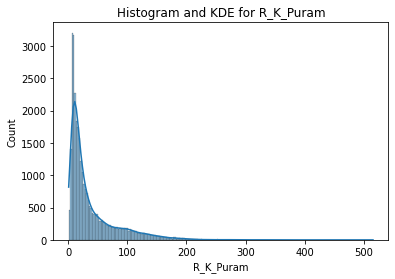

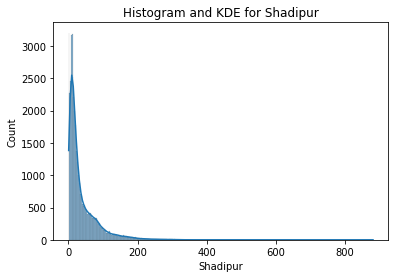

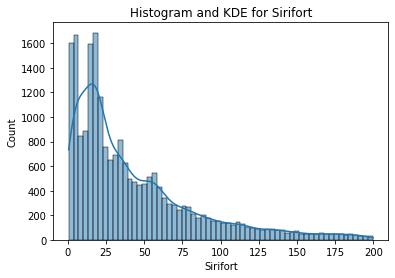

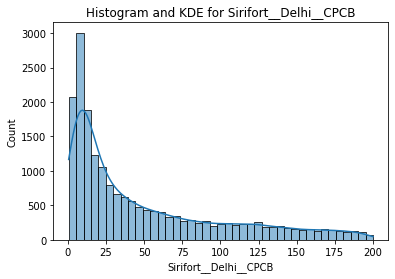

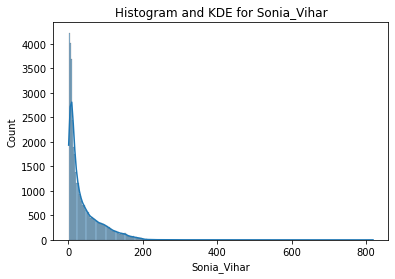

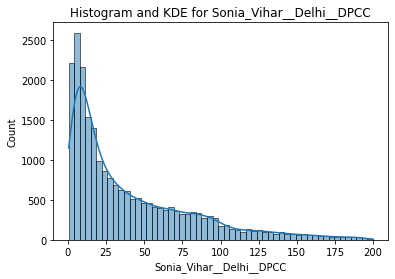

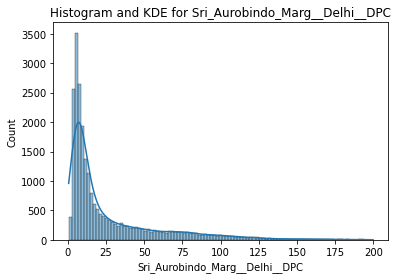

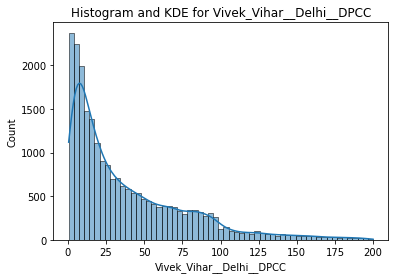

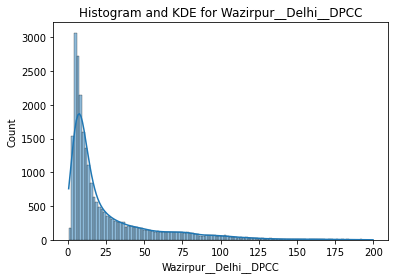

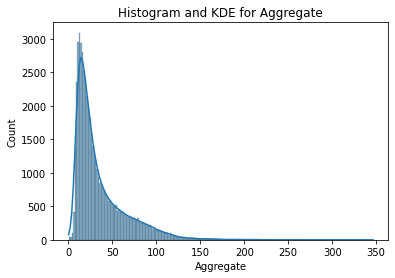

In [ ]:
hist_df2 = Ozone_df.copy()
hist_df2["Aggregate"] = hist_df2.mean(axis = 1)
for i in range(len(hist_df2.columns)):
  plt.figure()
  title_str = "Histogram and KDE for " + hist_df2.columns[i]
  sns.histplot(data = hist_df2, x = hist_df2.iloc[:, i], kde = True).set(title = title_str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

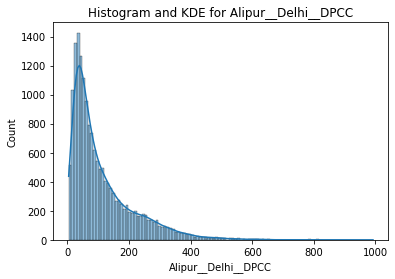

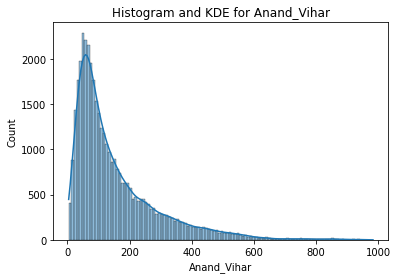

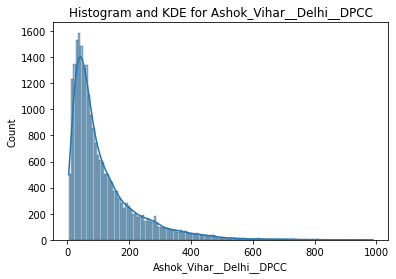

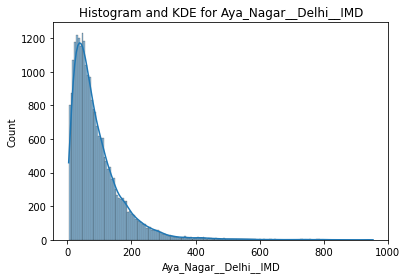

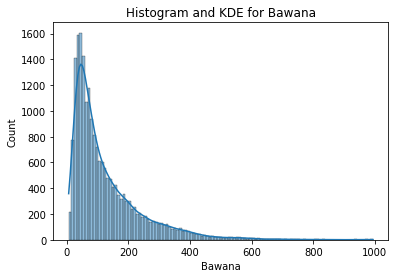

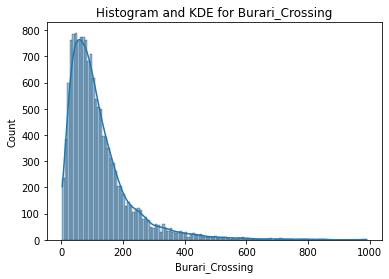

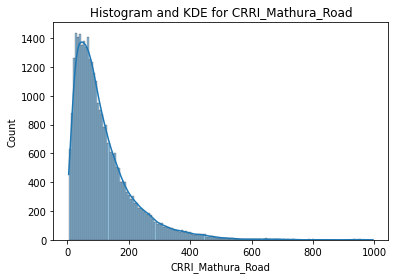

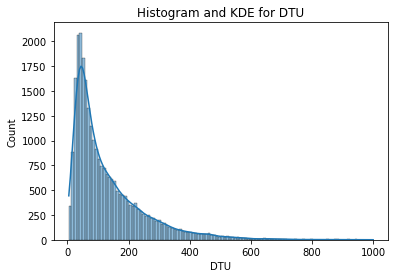

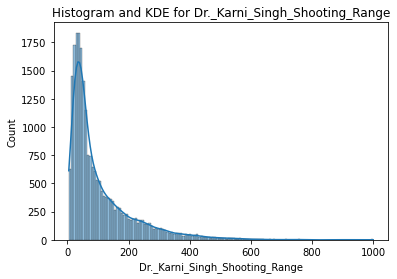

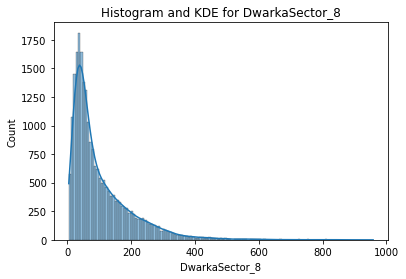

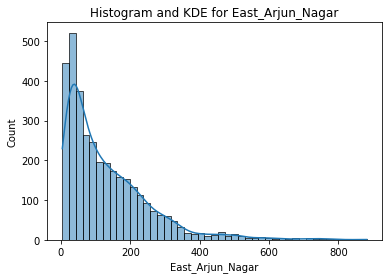

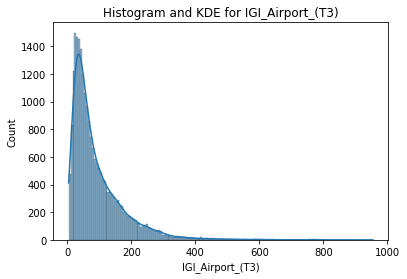

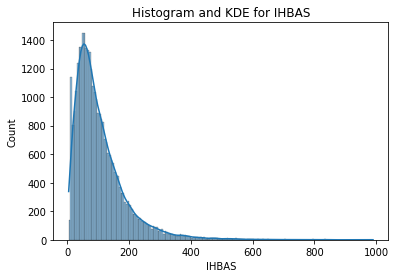

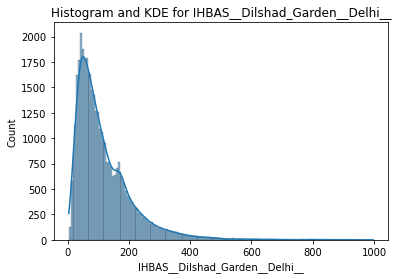

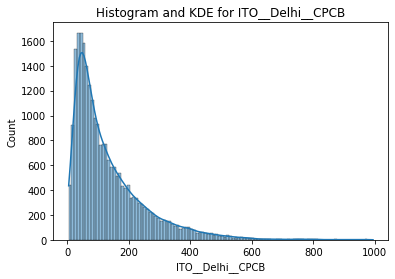

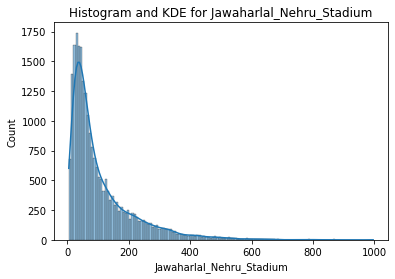

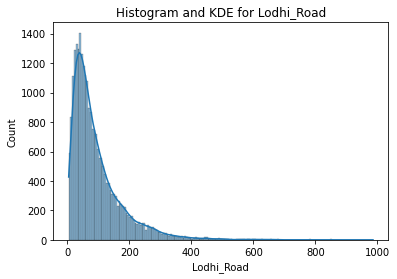

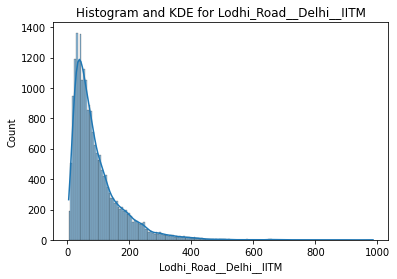

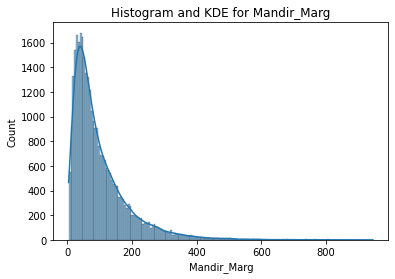

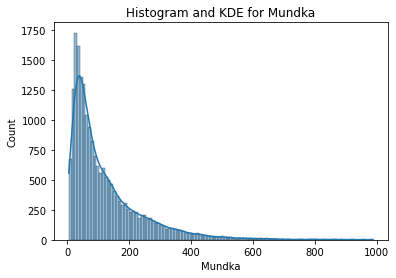

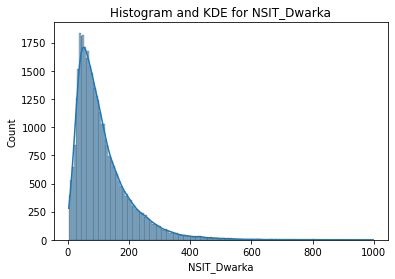

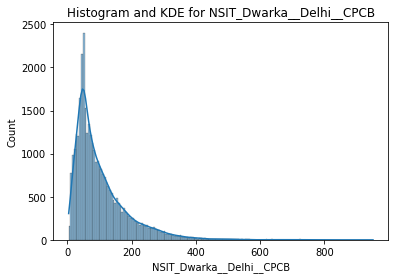

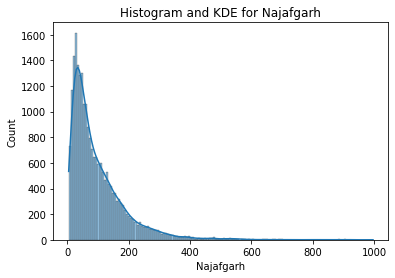

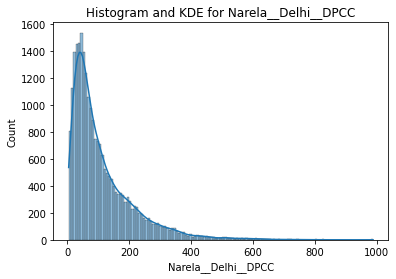

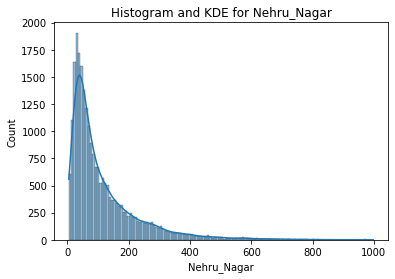

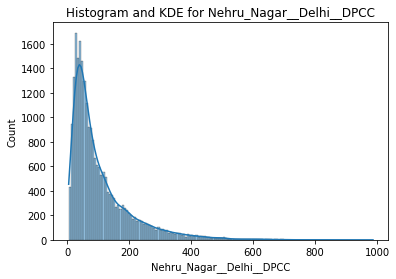

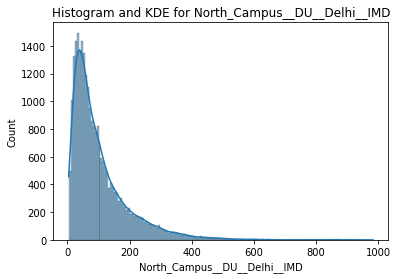

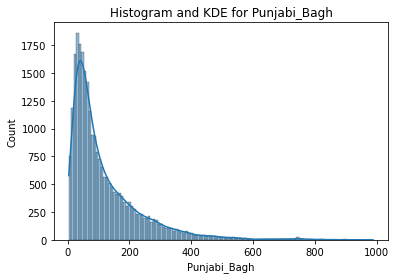

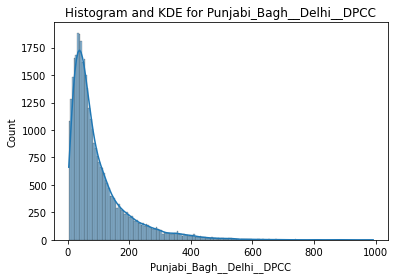

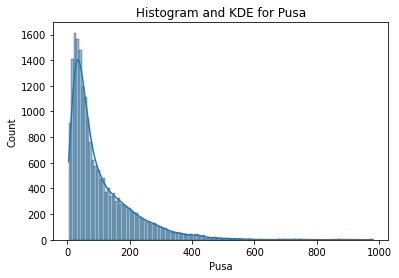

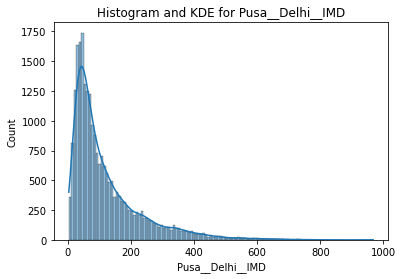

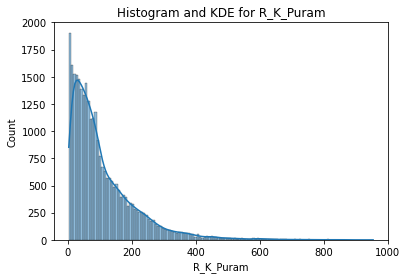

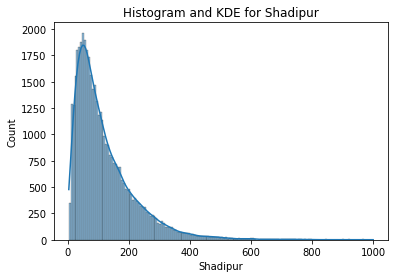

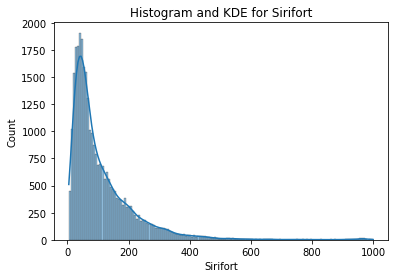

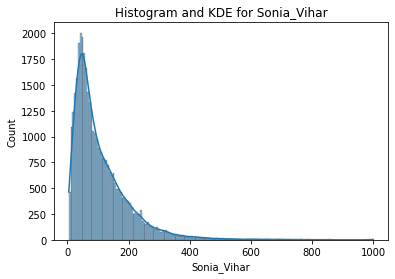

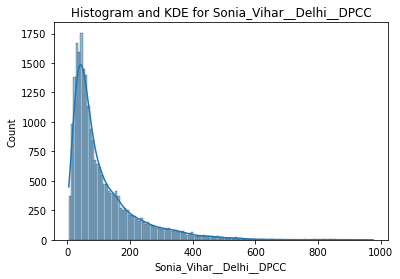

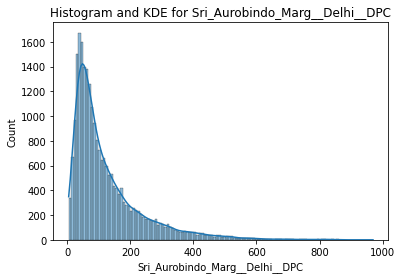

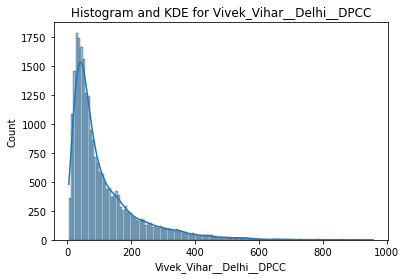

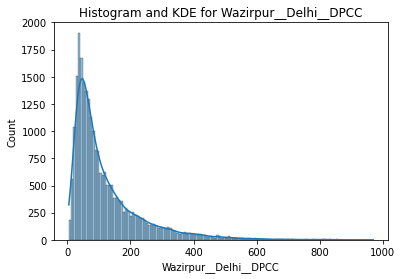

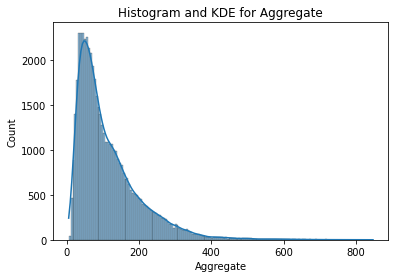

In [ ]:
hist_df3 = PM25_df.copy()
hist_df3["Aggregate"] = hist_df3.mean(axis = 1)
for i in range(len(hist_df3.columns)):
  plt.figure()
  title_str = "Histogram and KDE for " + hist_df3.columns[i]
  sns.histplot(data = hist_df3, x = hist_df3.iloc[:, i], kde = True).set(title = title_str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

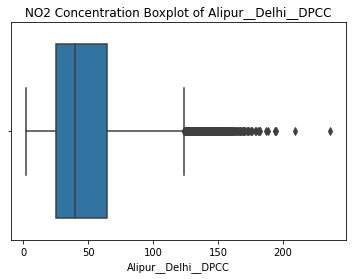

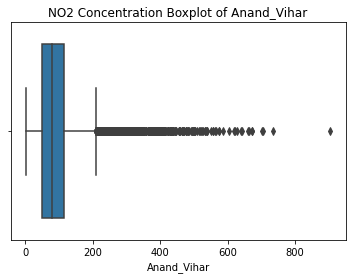

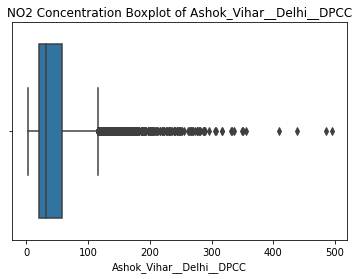

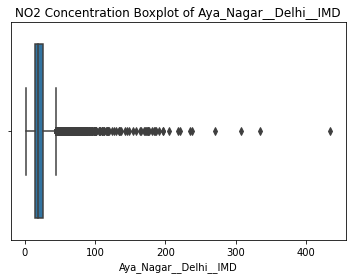

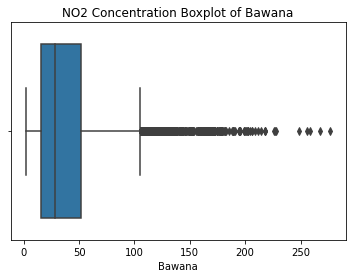

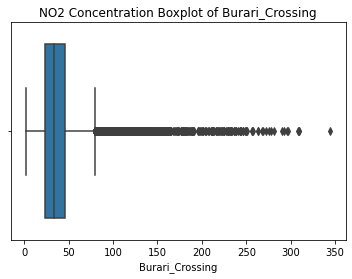

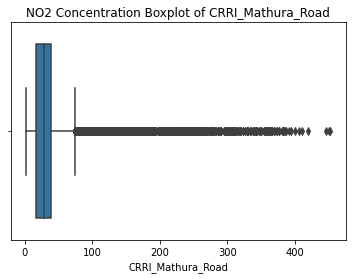

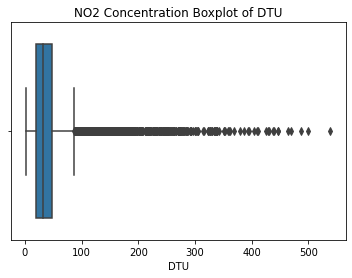

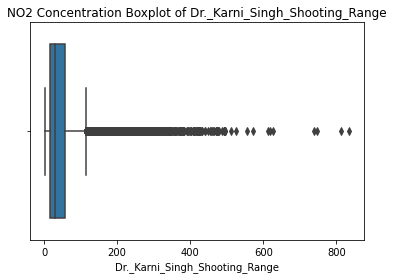

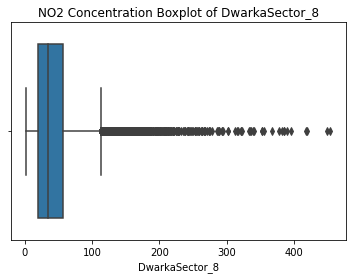

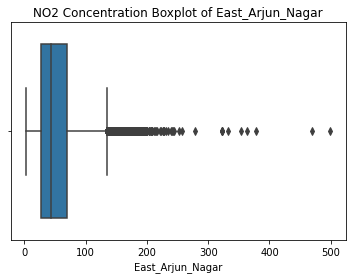

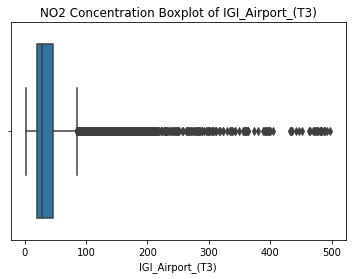

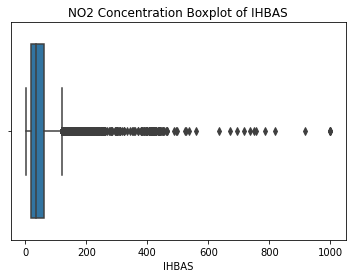

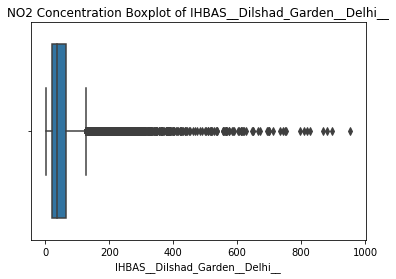

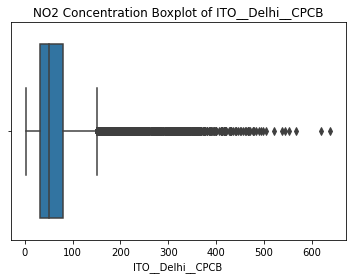

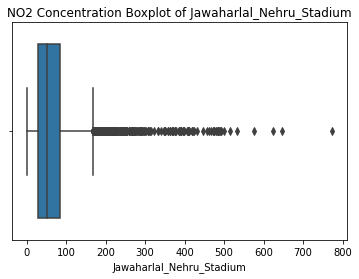

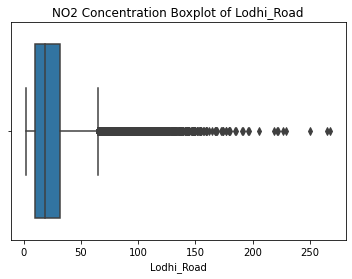

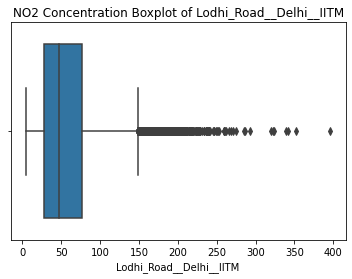

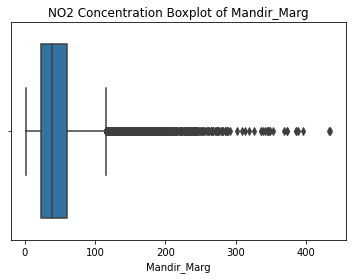

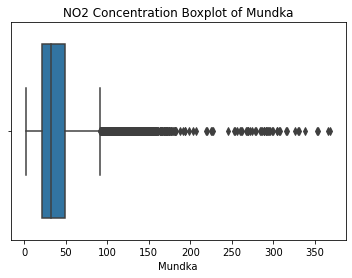

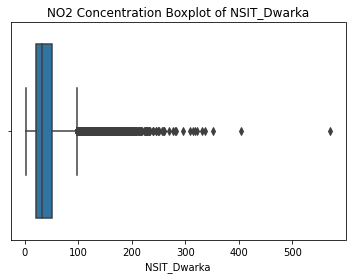

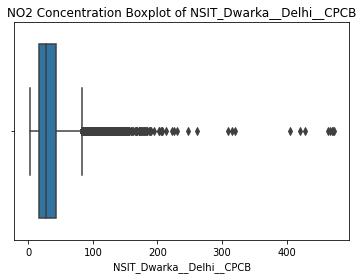

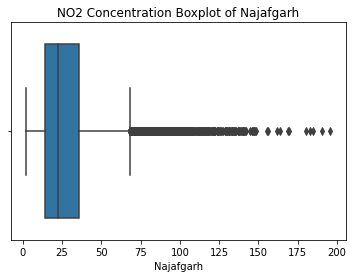

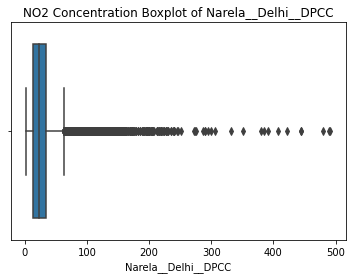

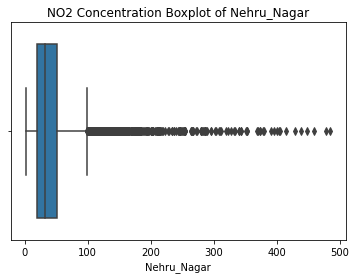

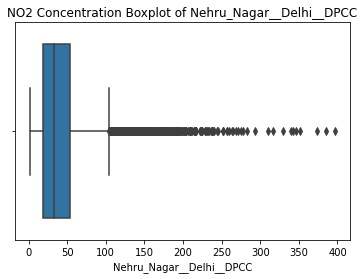

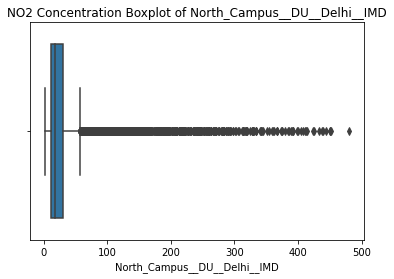

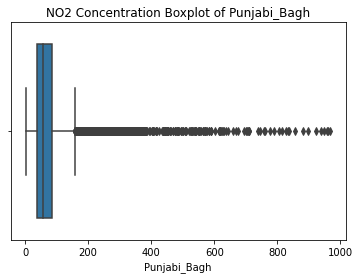

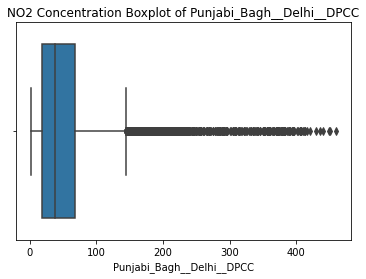

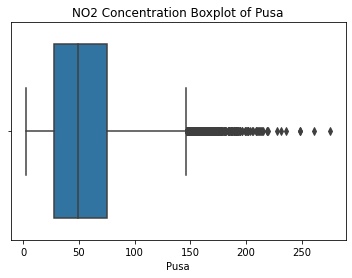

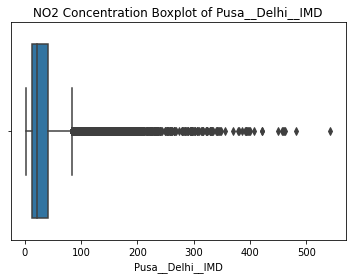

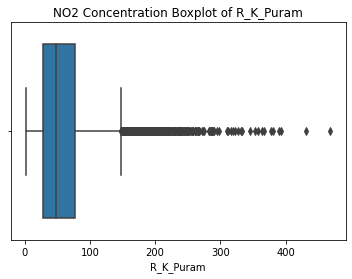

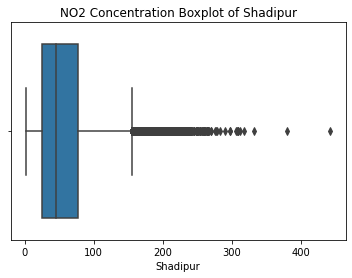

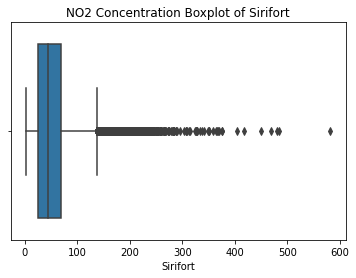

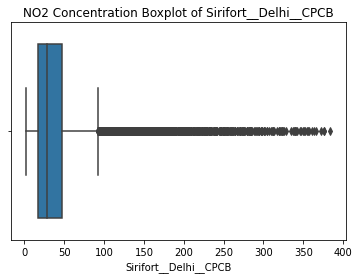

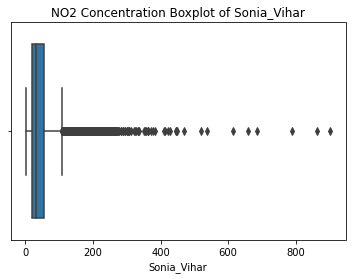

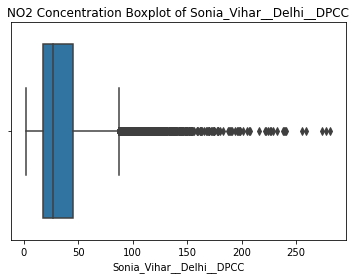

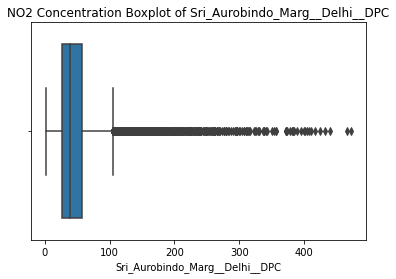

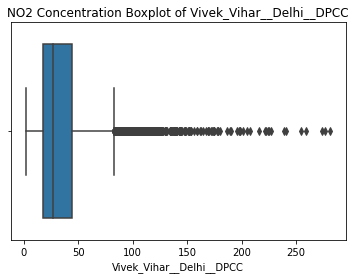

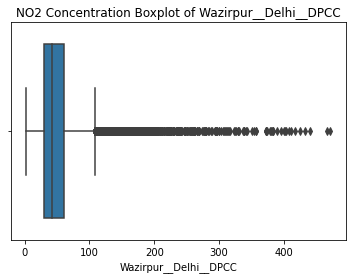

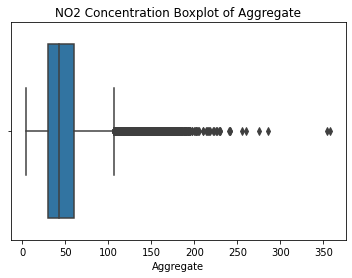

In [ ]:
#Boxplot for NO2
box_df1 = NO2_df.copy()
box_df1["Aggregate"] = box_df1.mean(axis = 1)
for i in range(len(box_df1.columns)):
  plt.figure()
  title_str = "NO2 Concentration Boxplot of " + box_df1.columns[i]
  sns.boxplot(data = box_df1, x = box_df1.iloc[:, i]).set(title = title_str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

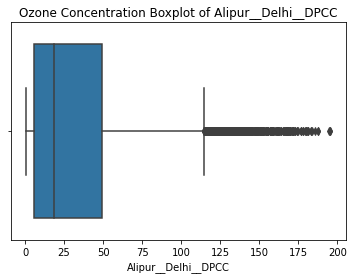

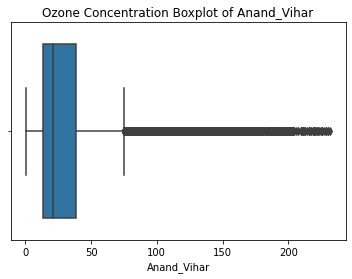

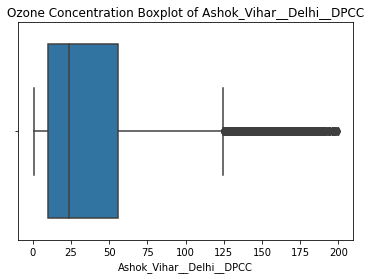

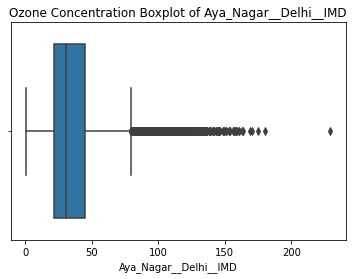

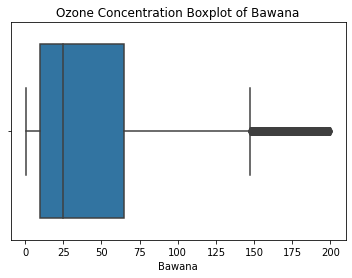

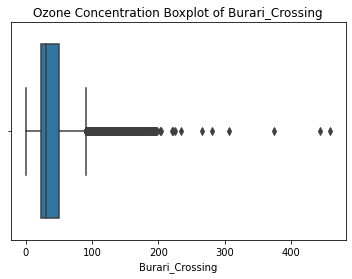

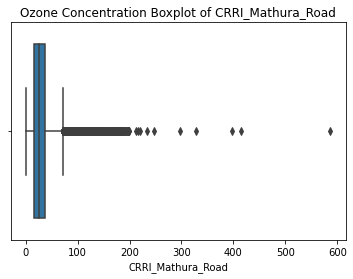

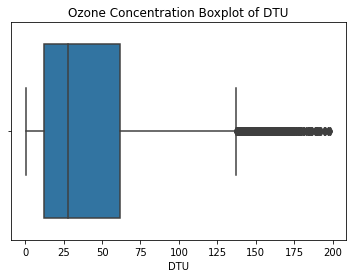

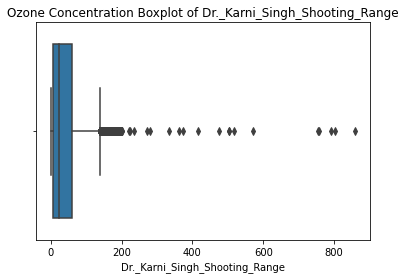

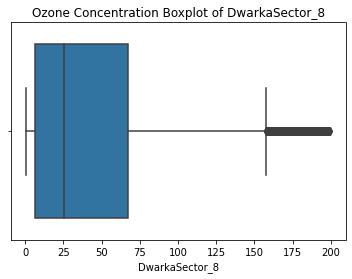

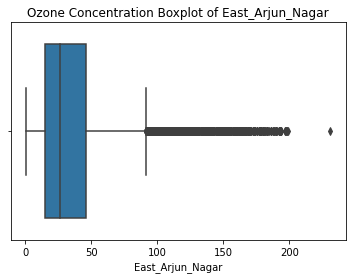

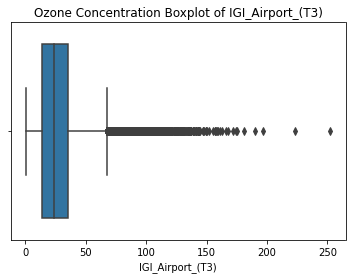

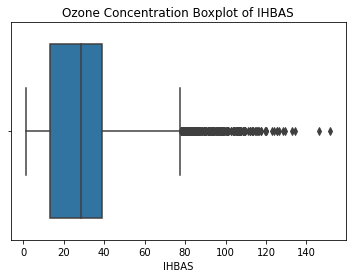

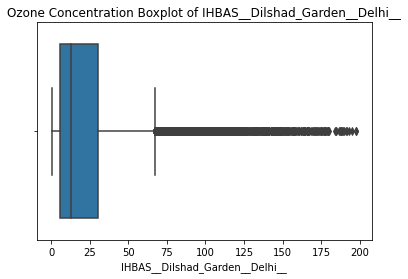

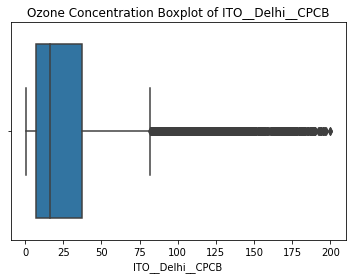

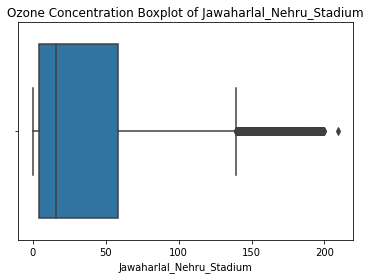

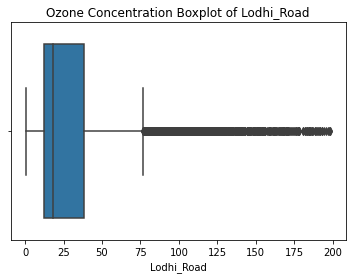

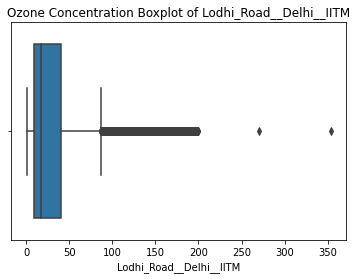

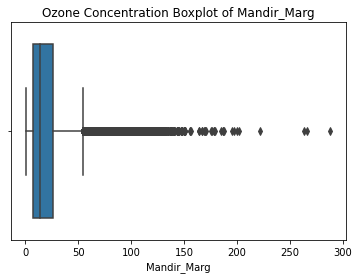

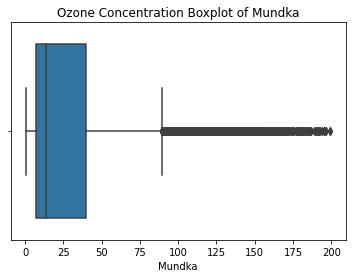

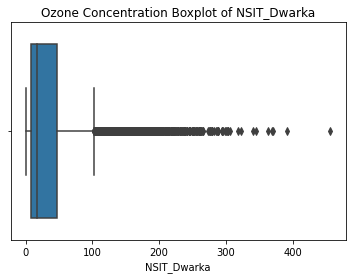

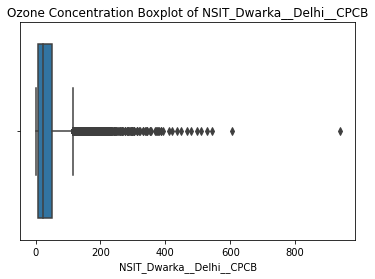

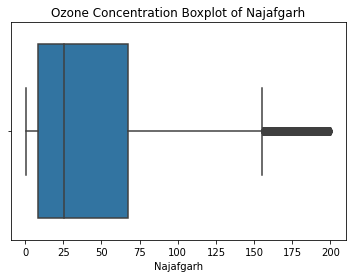

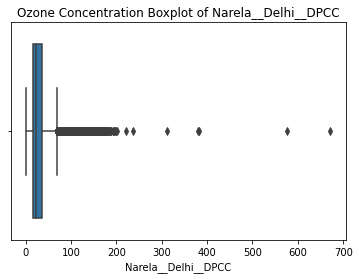

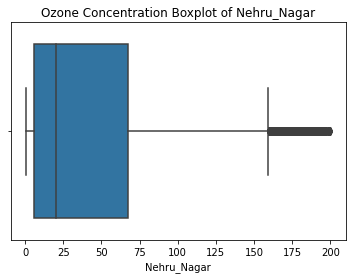

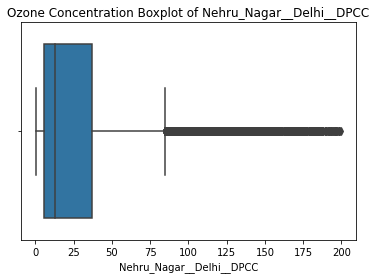

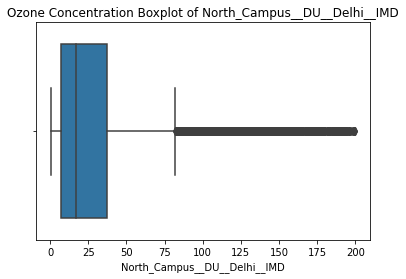

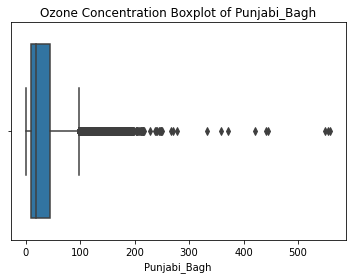

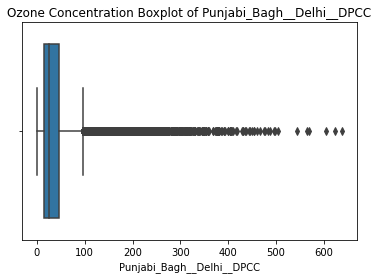

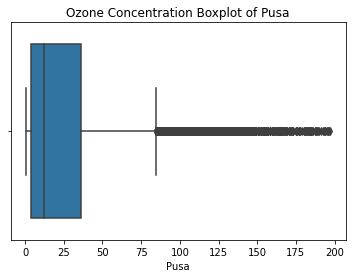

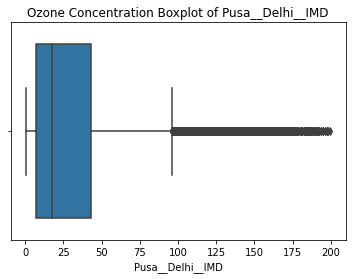

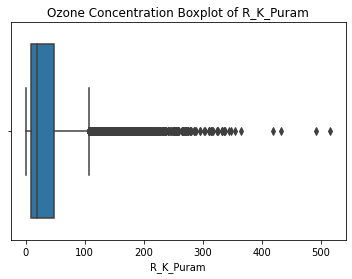

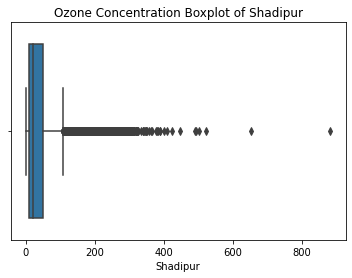

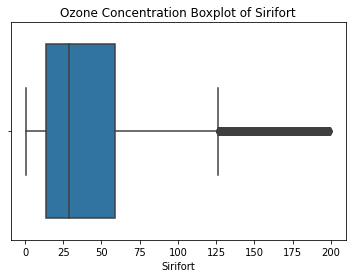

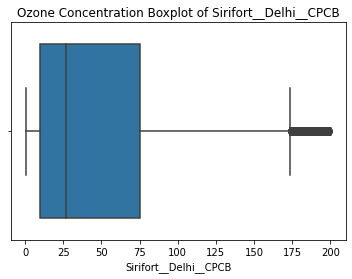

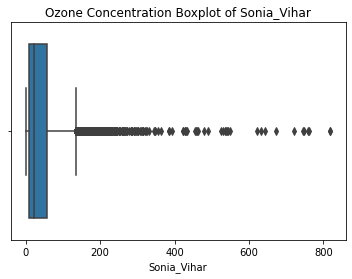

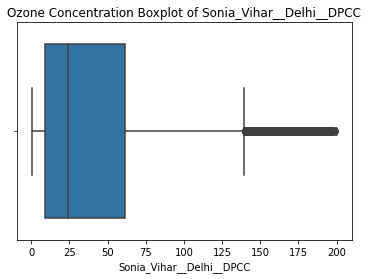

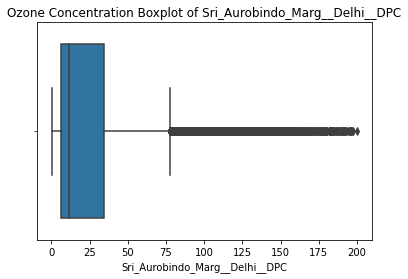

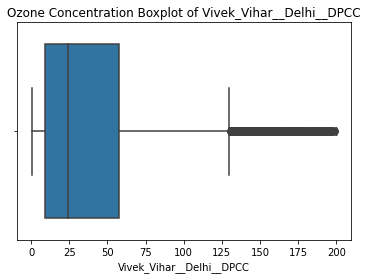

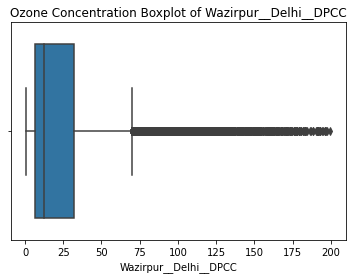

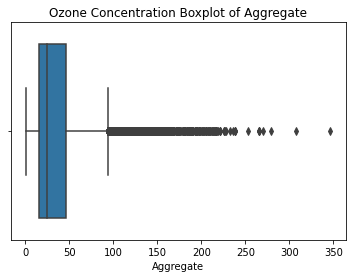

In [ ]:
#Boxplot for Ozone
box_df2 = Ozone_df.copy()
box_df2["Aggregate"] = box_df2.mean(axis = 1)
for i in range(len(box_df2.columns)):
  plt.figure()
  title_str = "Ozone Concentration Boxplot of " + box_df2.columns[i]
  sns.boxplot(data = box_df2, x = box_df2.iloc[:, i]).set(title = title_str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

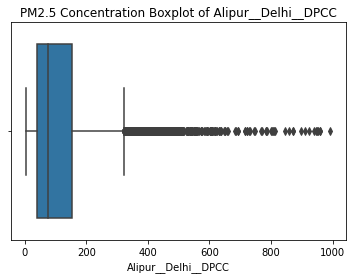

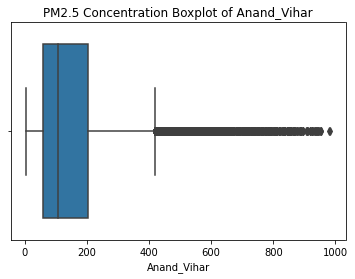

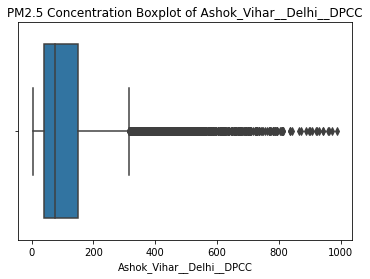

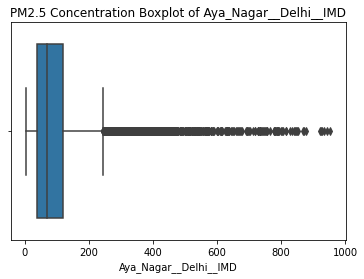

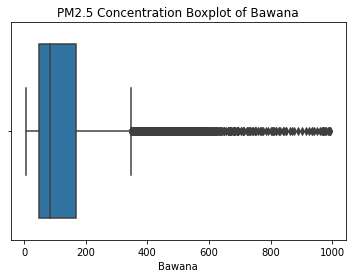

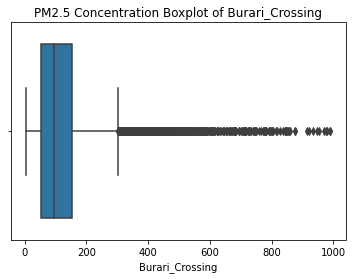

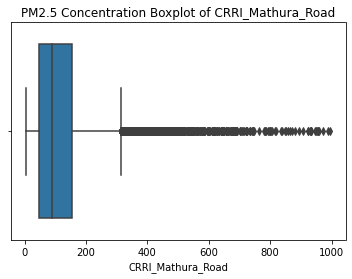

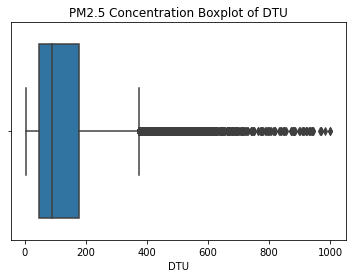

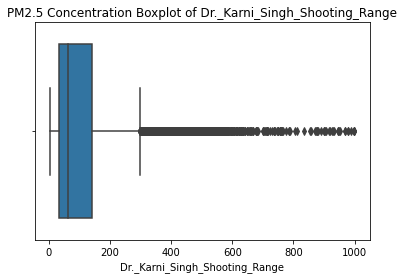

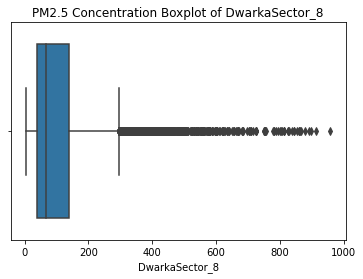

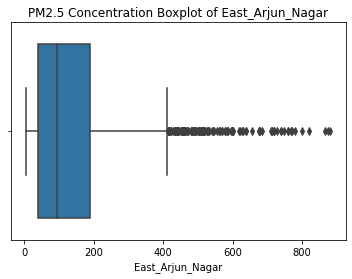

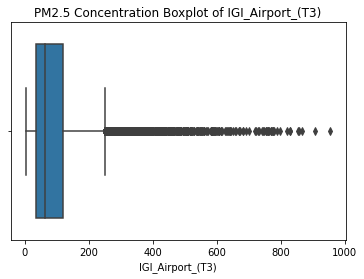

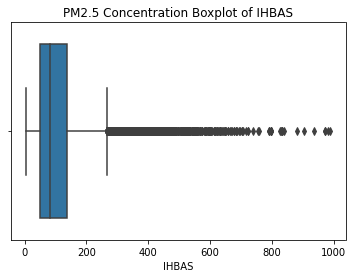

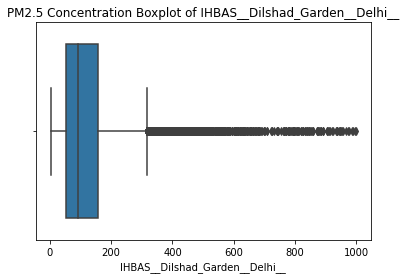

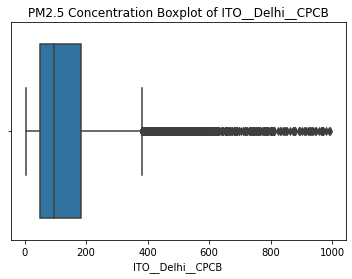

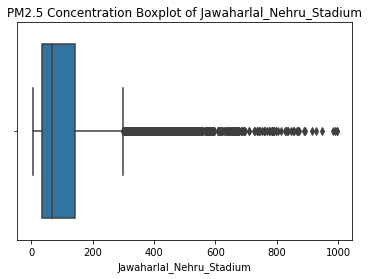

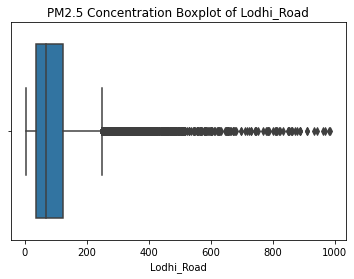

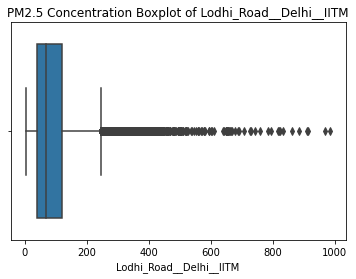

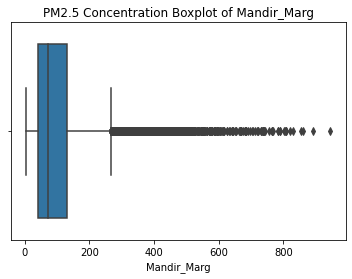

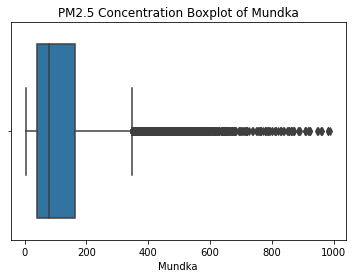

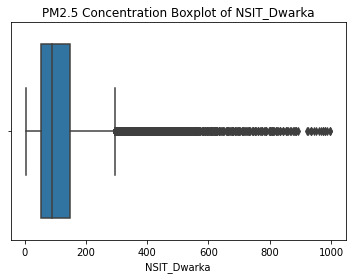

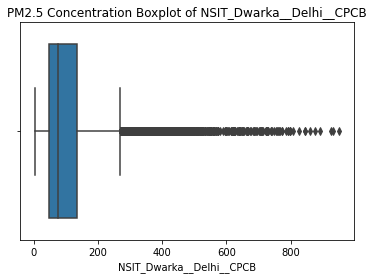

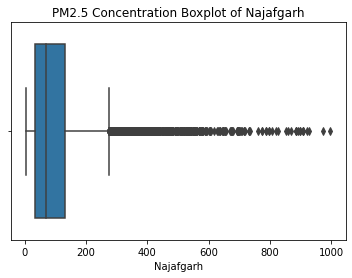

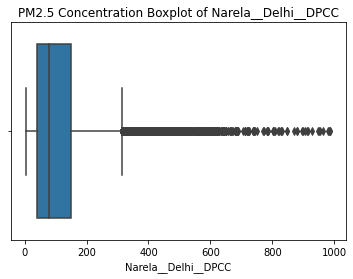

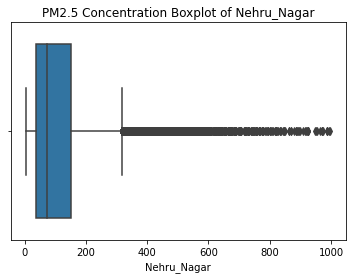

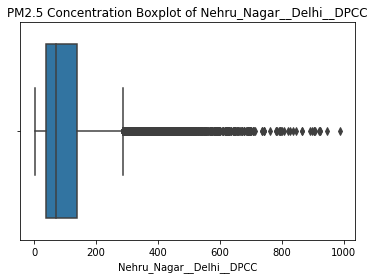

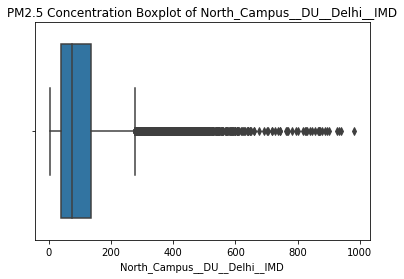

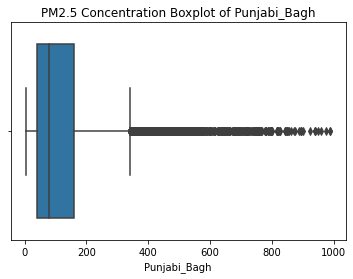

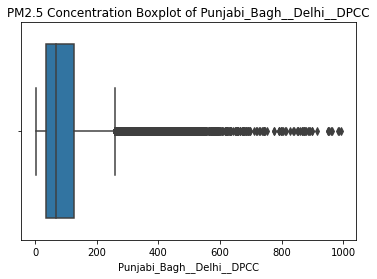

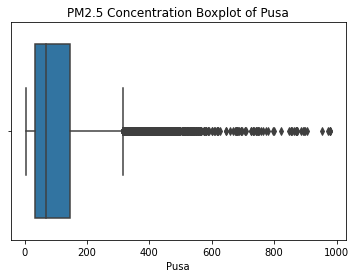

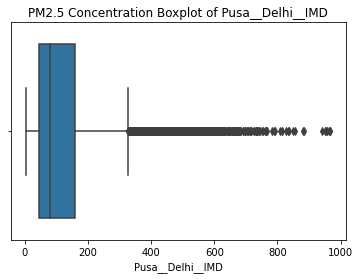

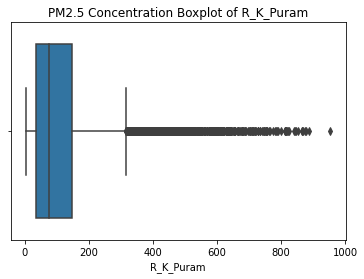

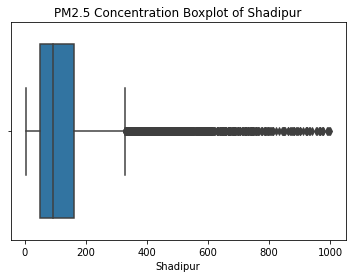

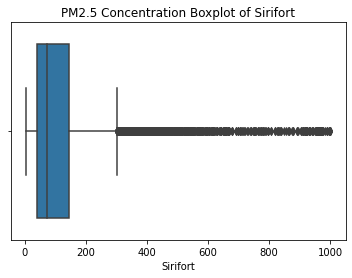

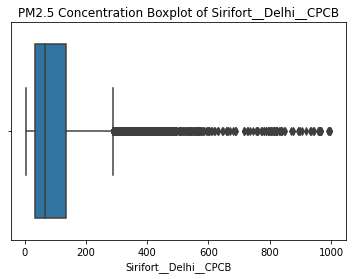

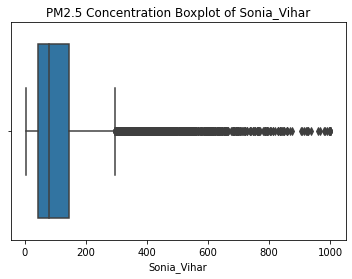

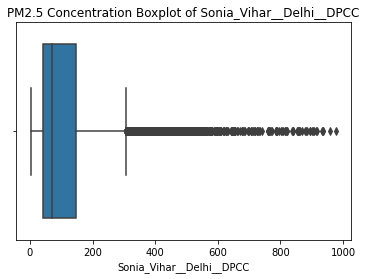

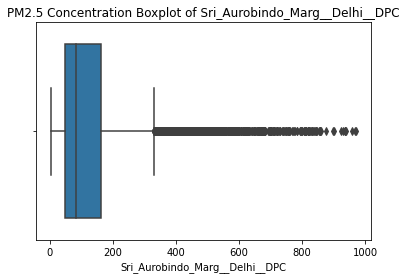

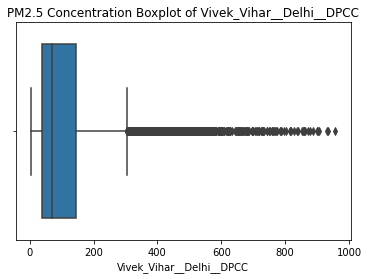

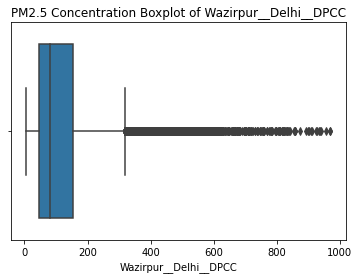

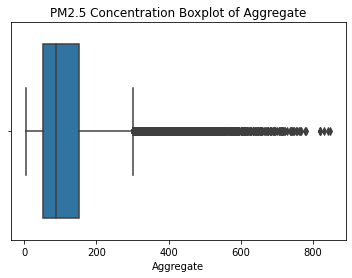

In [ ]:
#Boxplot for PM2.5
box_df3 = PM25_df.copy()
box_df3["Aggregate"] = box_df3.mean(axis = 1)
for i in range(len(box_df3.columns)):
  plt.figure()
  title_str = "PM2.5 Concentration Boxplot of " + box_df3.columns[i]
  sns.boxplot(data = box_df3, x = box_df3.iloc[:, i]).set(title = title_str)

In [9]:
from matplotlib.pyplot import figure
miss_df = pd.read_excel("Preliminary Data Analysis.xlsx")
miss_df["Percent NO2 Available Data"] = 100-miss_df["Percent NO2 Missing Data"]
miss_df["Percent Ozone Available Data"] = 100-miss_df["Percent Ozone Missing Data"]
miss_df["Percent PM2.5 Available Data"] = 100-miss_df["Percent PM2.5 Missing Data"]
miss_df.head()

Location  ...  Percent PM2.5 Available Data
0       Alipur__Delhi__DPCC  ...                     32.345726
1               Anand_Vihar  ...                     75.295236
2  Ashok_Vihar__Delhi__DPCC  ...                     45.343729
3     Aya_Nagar__Delhi__IMD  ...                     46.846059
4                    Bawana  ...                     39.227917

[5 rows x 7 columns]

Text(0.5, 1.0, 'Percent PM2.5 Data Available')

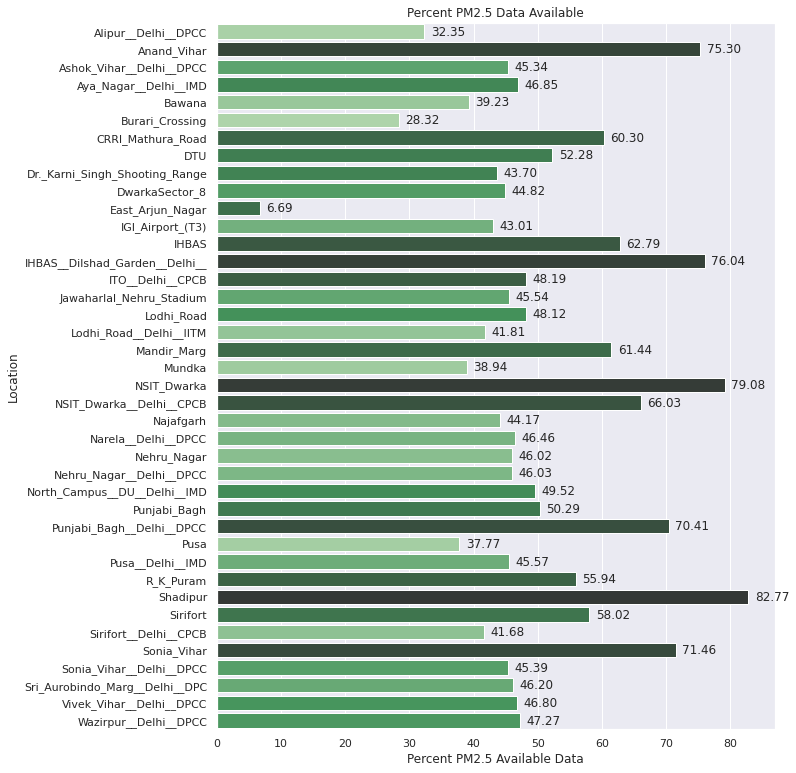

In [ ]:
sns.set(rc = {'figure.figsize':(10,13)})
pal = sns.color_palette("Greens_d", len(miss_df.iloc[:, 1]))
rank = miss_df.iloc[:, 1].argsort().argsort()
ax = sns.barplot(x = "Percent PM2.5 Available Data", y = "Location", orient = "h", data = miss_df, palette = np.array(pal[::-1])[rank])
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
ax.set_title("Percent PM2.5 Data Available")

In [76]:
test_df1 = NO2_df.copy()
test_df1.head()

Alipur__Delhi__DPCC  ...  Wazirpur__Delhi__DPCC
DateTime                                  ...                       
2015-01-01 00:00:00                  NaN  ...                    NaN
2015-01-01 01:00:00                  NaN  ...                    NaN
2015-01-01 02:00:00                  NaN  ...                    NaN
2015-01-01 03:00:00                  NaN  ...                    NaN
2015-01-01 04:00:00                  NaN  ...                    NaN

[5 rows x 40 columns]

In [77]:
removals1 = {}
threshold = 3
#figsize = (20, 5)
#kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)
col_str = ""
for i in range(len(test_df1.columns)):
  test_df1["pandas"] = test_df1.iloc[:, i].rolling(window = 3, center = True).median().fillna(method='bfill').fillna(method='ffill')
  difference = np.abs(test_df1.iloc[:, i] - test_df1['pandas'])
  outlier_idx = difference > threshold

  #fig, ax = plt.subplots(figsize=figsize)
  #test_df.iloc[:, 0].plot()
  #test_df.iloc[:, 0][outlier_idx].plot(**kw)
  col_str = "Filtered " + test_df1.columns.to_list()[i]
  test_df1[col_str] = test_df1.iloc[:, i][-outlier_idx]
  removals1["" + test_df1.columns.to_list()[i]] = len(test_df1.iloc[:, i][outlier_idx].dropna())
  #test_df["Filtered Alipur"].plot()
test_df1.columns


Index(['Alipur__Delhi__DPCC', 'Anand_Vihar', 'Ashok_Vihar__Delhi__DPCC',
       'Aya_Nagar__Delhi__IMD', 'Bawana', 'Burari_Crossing',
       'CRRI_Mathura_Road', 'DTU', 'Dr._Karni_Singh_Shooting_Range',
       'DwarkaSector_8', 'East_Arjun_Nagar', 'IGI_Airport_(T3)', 'IHBAS',
       'IHBAS__Dilshad_Garden__Delhi__', 'ITO__Delhi__CPCB',
       'Jawaharlal_Nehru_Stadium', 'Lodhi_Road', 'Lodhi_Road__Delhi__IITM',
       'Mandir_Marg', 'Mundka', 'NSIT_Dwarka', 'NSIT_Dwarka__Delhi__CPCB',
       'Najafgarh', 'Narela__Delhi__DPCC', 'Nehru_Nagar',
       'Nehru_Nagar__Delhi__DPCC', 'North_Campus__DU__Delhi__IMD',
       'Punjabi_Bagh', 'Punjabi_Bagh__Delhi__DPCC', 'Pusa', 'Pusa__Delhi__IMD',
       'R_K_Puram', 'Shadipur', 'Sirifort', 'Sirifort__Delhi__CPCB',
       'Sonia_Vihar', 'Sonia_Vihar__Delhi__DPCC',
       'Sri_Aurobindo_Marg__Delhi__DPC', 'Vivek_Vihar__Delhi__DPCC',
       'Wazirpur__Delhi__DPCC', 'pandas', 'Filtered Alipur__Delhi__DPCC',
       'Filtered Anand_Vihar', 'Filtered Ash

In [78]:
filtered_test_df1 = test_df1.iloc[:, 41:81]
filtered_test_df1.head()

Filtered Alipur__Delhi__DPCC  ...  Filtered Wazirpur__Delhi__DPCC
DateTime                                           ...                                
2015-01-01 00:00:00                           NaN  ...                             NaN
2015-01-01 01:00:00                           NaN  ...                             NaN
2015-01-01 02:00:00                           NaN  ...                             NaN
2015-01-01 03:00:00                           NaN  ...                             NaN
2015-01-01 04:00:00                           NaN  ...                             NaN

[5 rows x 40 columns]

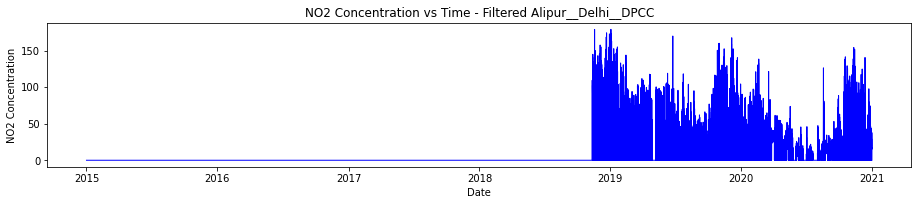

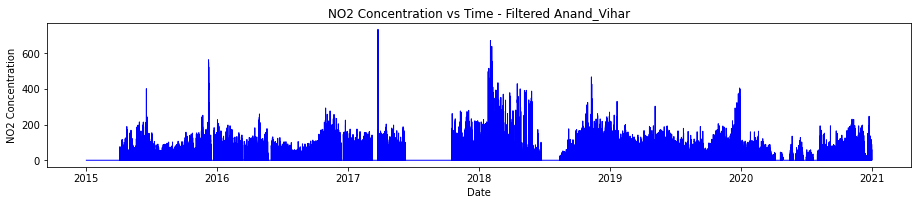

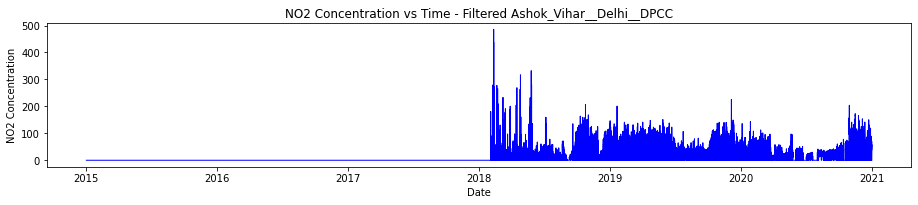

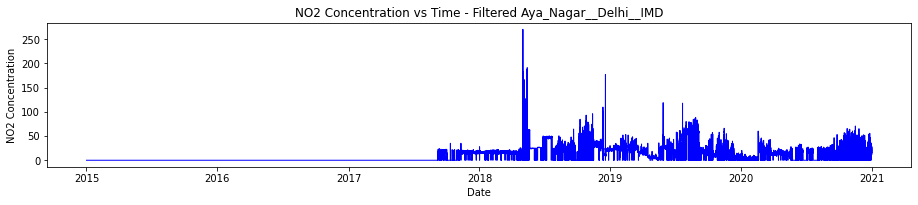

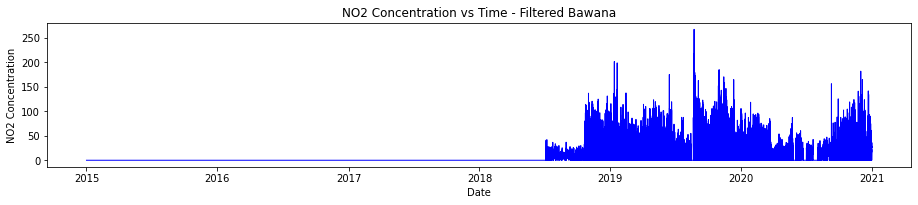

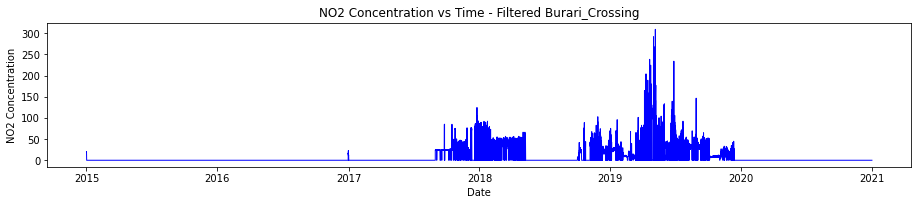

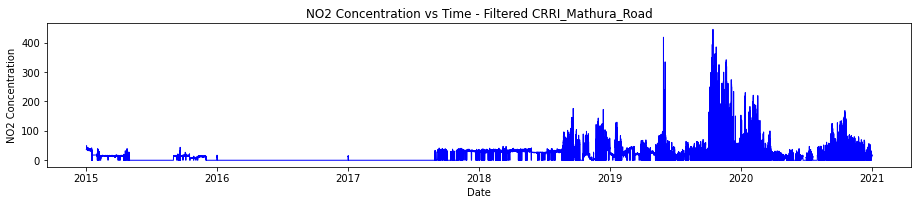

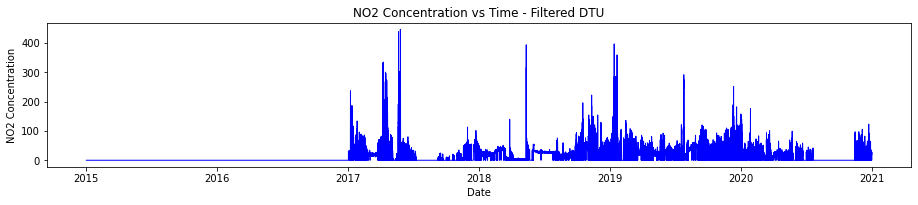

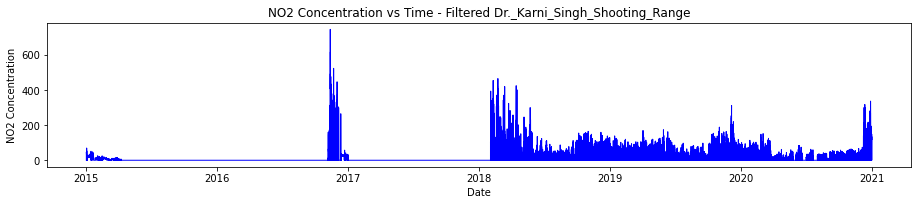

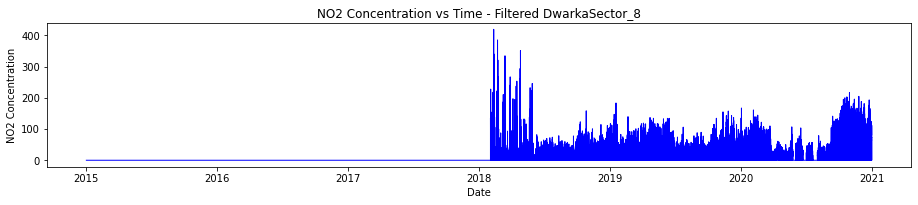

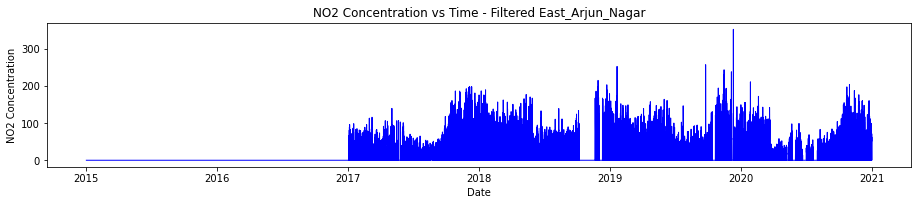

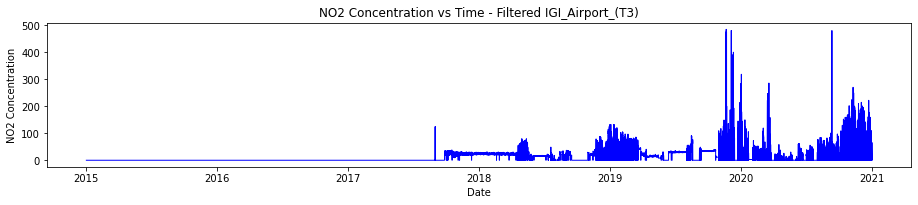

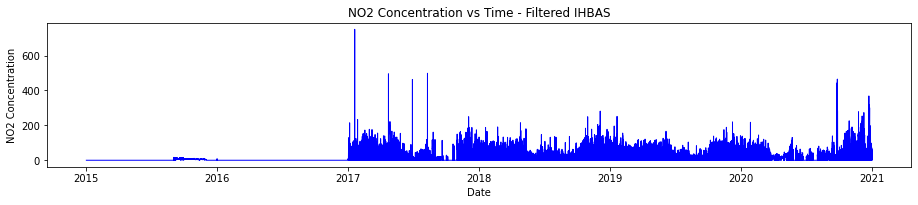

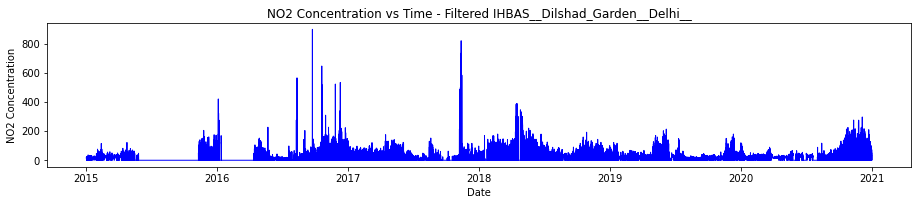

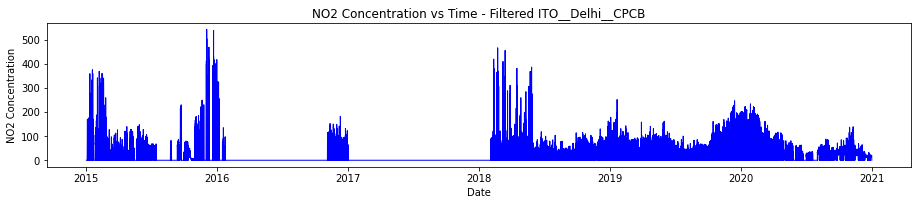

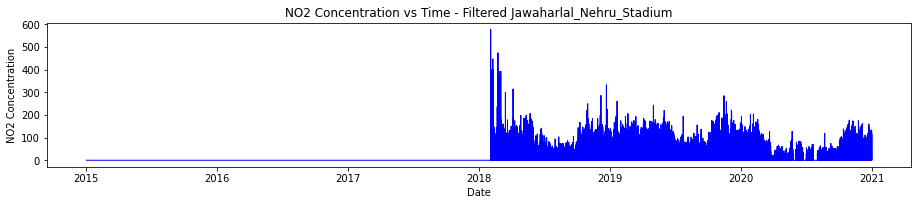

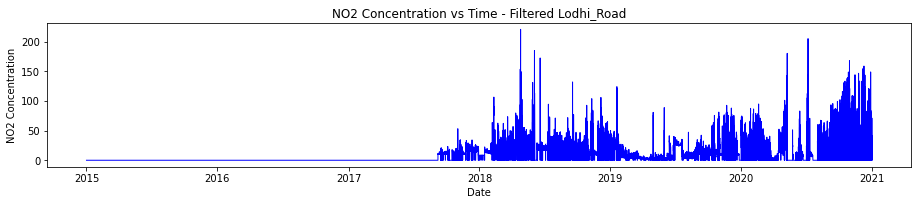

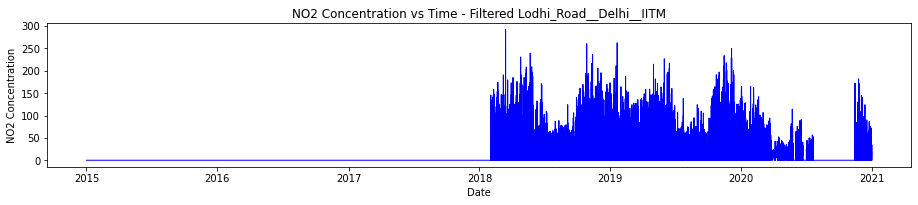

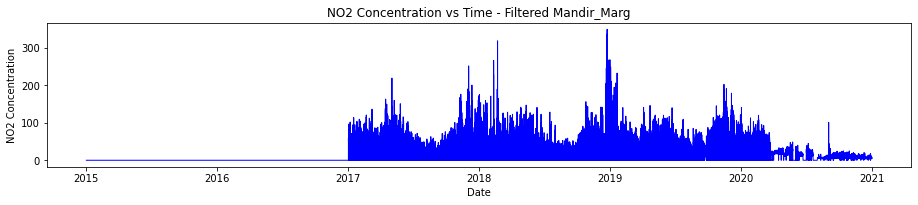

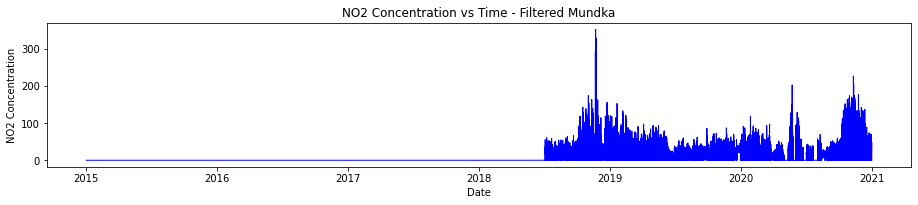

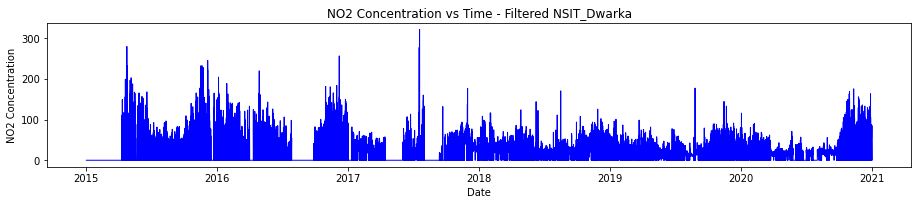

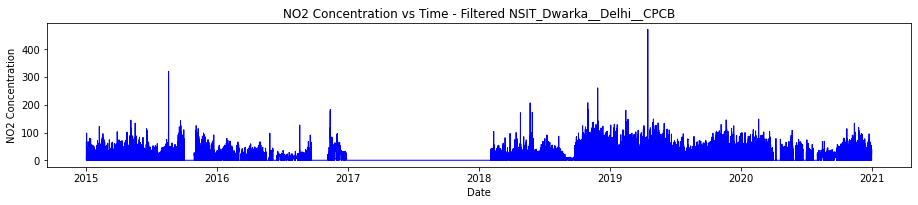

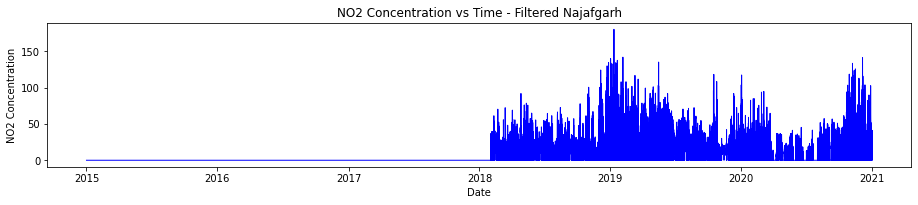

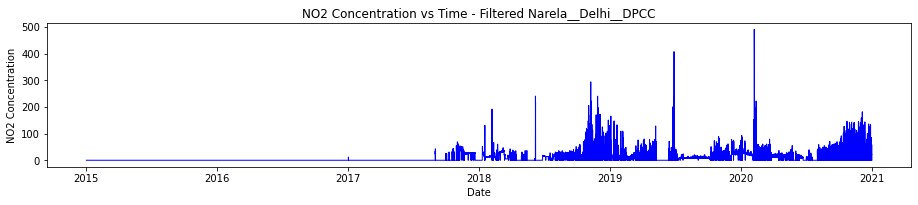

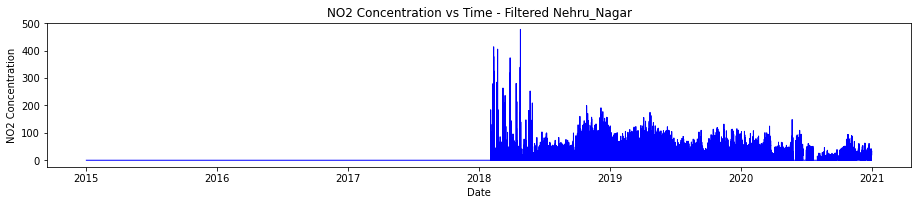

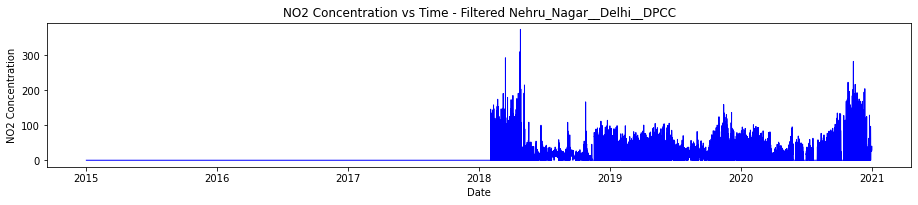

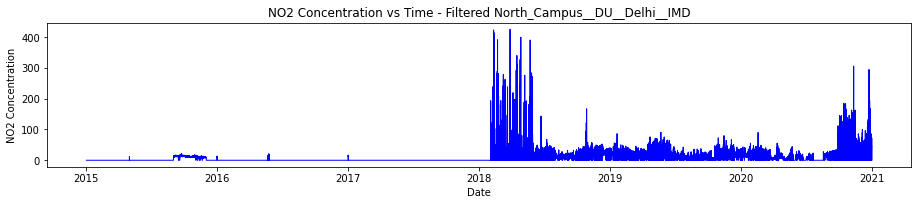

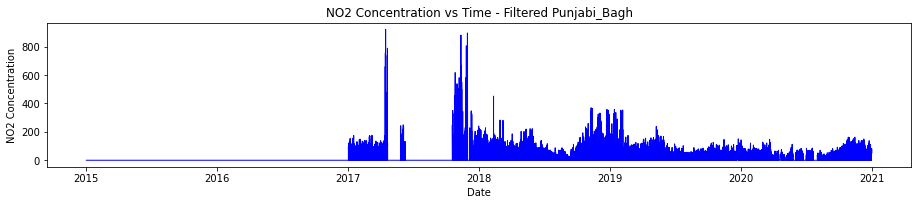

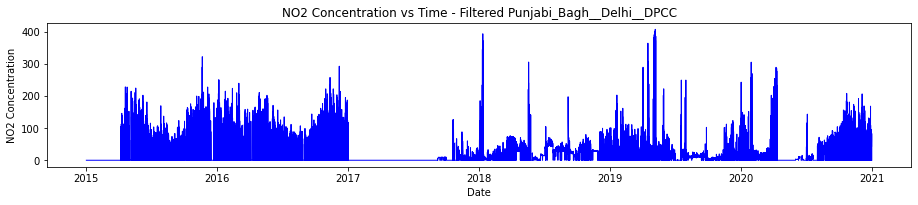

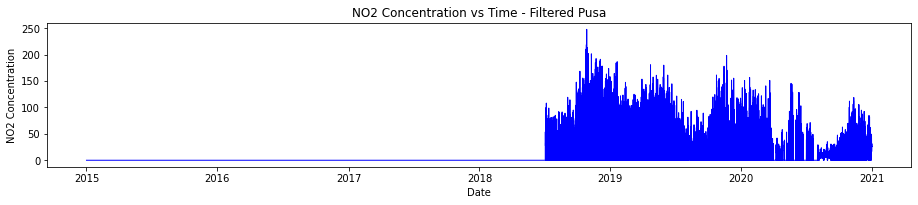

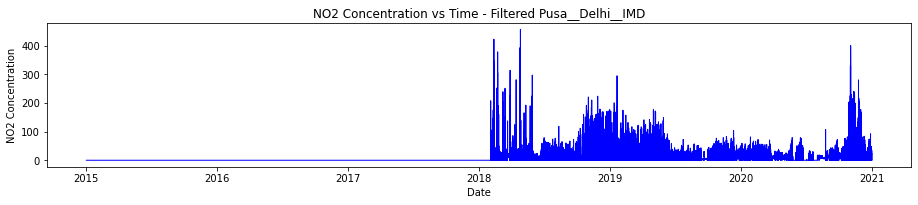

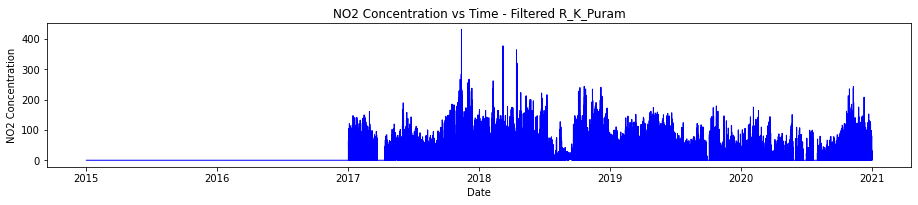

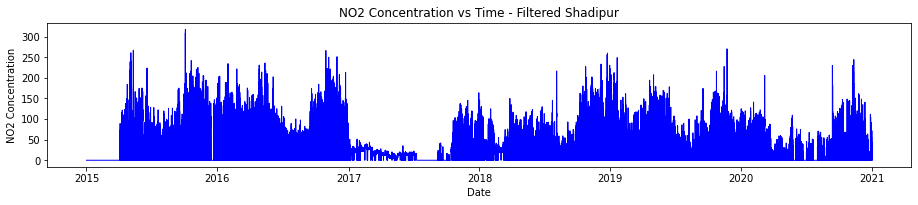

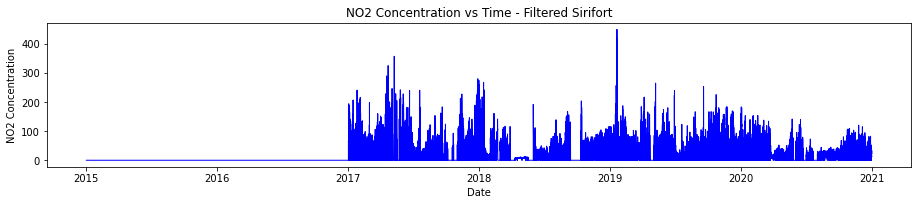

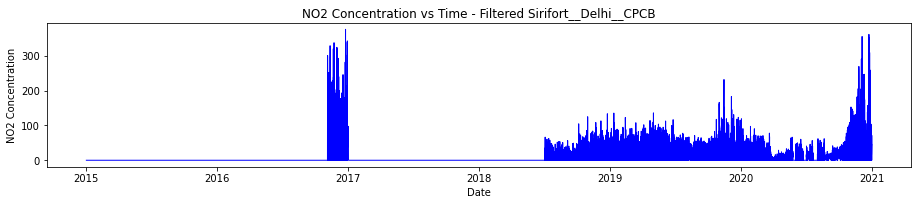

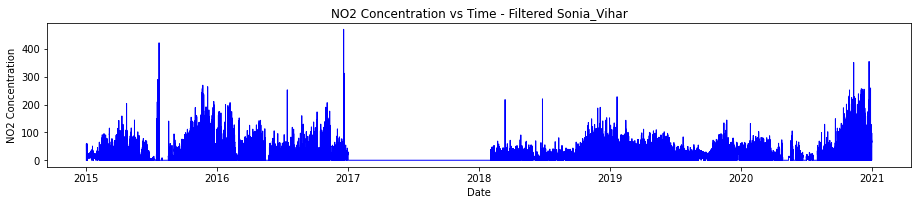

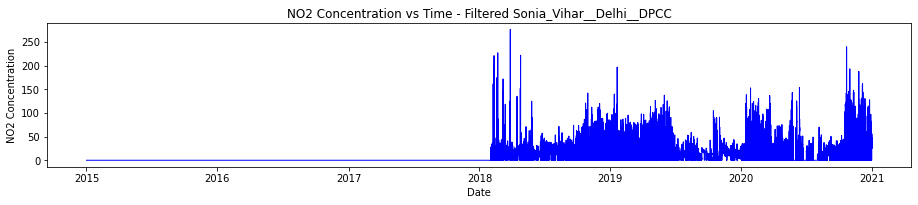

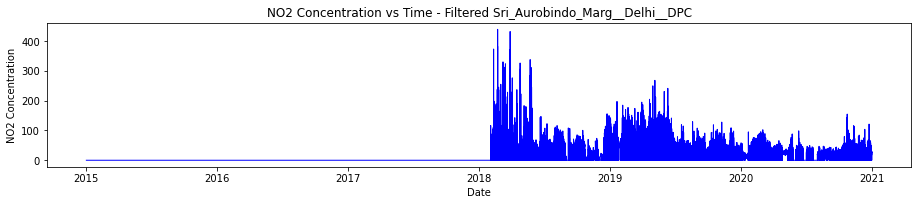

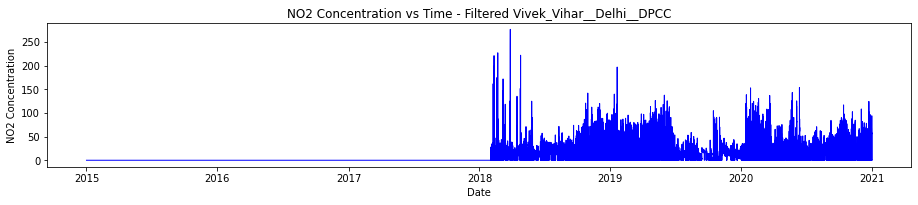

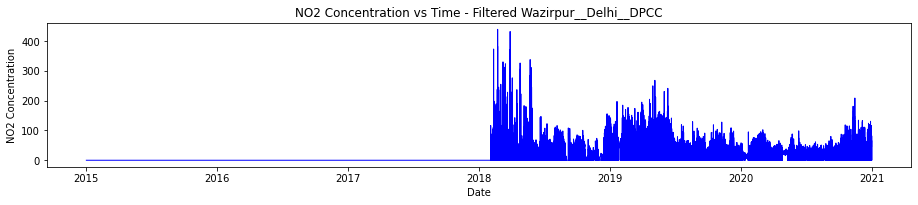

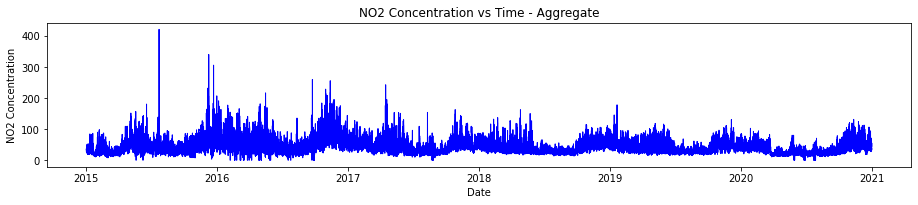

In [79]:
filtered_test_df1["Aggregate"] = filtered_test_df1.mean(axis = 1)
filtered_test_df1.fillna(0, inplace = True)
title_str = ""
for i in range(len(filtered_test_df1.columns)):
    plt.subplot(1, 1, 1)
    plt.plot(x_value,filtered_test_df1.iloc[:, i].values,color='blue',linewidth=1)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)
    title_str = 'NO2 Concentration vs Time - ' + filtered_test_df1.columns[i]
    plt.title(title_str); plt.xlabel('Date'); plt.ylabel('NO2 Concentration')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.5, wspace=0.2, hspace=0.2)
    plt.show()

In [80]:
filtered_test_df.describe()

Filtered Alipur__Delhi__DPCC  ...  Filtered Wazirpur__Delhi__DPCC
count                  14366.000000  ...                    18637.000000
mean                      44.657845  ...                       47.057536
std                       28.993415  ...                       30.023902
min                        2.100000  ...                        2.480000
25%                       23.500000  ...                       28.230000
50%                       37.520000  ...                       40.170000
75%                       60.450000  ...                       57.330000
max                      178.920000  ...                      439.700000

[8 rows x 40 columns]

In [87]:
NO2_df.describe()

Alipur__Delhi__DPCC  ...  Wazirpur__Delhi__DPCC
count         17042.000000  ...           24380.000000
mean             47.370503  ...              50.772870
std              30.660392  ...              34.887627
min               2.050000  ...               2.030000
25%              24.835000  ...              29.680000
50%              40.200000  ...              42.350000
75%              64.350000  ...              61.150000
max             236.450000  ...             471.700000

[8 rows x 40 columns]

In [81]:
removals1

{'Alipur__Delhi__DPCC': 1996,
 'Anand_Vihar': 10899,
 'Ashok_Vihar__Delhi__DPCC': 3479,
 'Aya_Nagar__Delhi__IMD': 1083,
 'Bawana': 2378,
 'Burari_Crossing': 1097,
 'CRRI_Mathura_Road': 2722,
 'DTU': 2503,
 'Dr._Karni_Singh_Shooting_Range': 4461,
 'DwarkaSector_8': 4091,
 'East_Arjun_Nagar': 4955,
 'IGI_Airport_(T3)': 1795,
 'IHBAS': 5136,
 'IHBAS__Dilshad_Garden__Delhi__': 5750,
 'ITO__Delhi__CPCB': 4368,
 'Jawaharlal_Nehru_Stadium': 4120,
 'Lodhi_Road': 1264,
 'Lodhi_Road__Delhi__IITM': 3275,
 'Mandir_Marg': 4014,
 'Mundka': 2263,
 'NSIT_Dwarka': 4288,
 'NSIT_Dwarka__Delhi__CPCB': 4782,
 'Najafgarh': 2597,
 'Narela__Delhi__DPCC': 1714,
 'Nehru_Nagar': 3538,
 'Nehru_Nagar__Delhi__DPCC': 2599,
 'North_Campus__DU__Delhi__IMD': 1728,
 'Punjabi_Bagh': 4574,
 'Punjabi_Bagh__Delhi__DPCC': 4961,
 'Pusa': 4531,
 'Pusa__Delhi__IMD': 3017,
 'R_K_Puram': 5388,
 'Shadipur': 7720,
 'Sirifort': 4144,
 'Sirifort__Delhi__CPCB': 2701,
 'Sonia_Vihar': 5369,
 'Sonia_Vihar__Delhi__DPCC': 2345,
 'Sri_Aurob

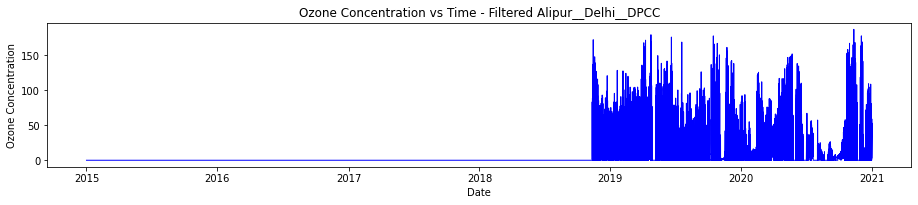

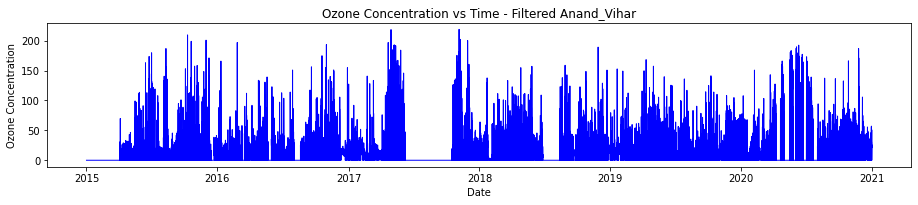

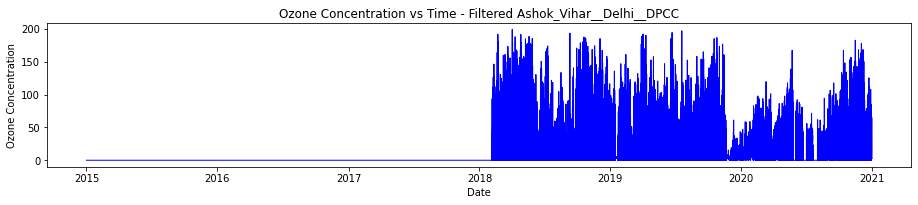

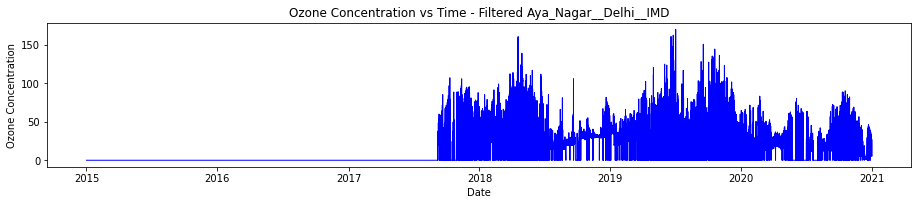

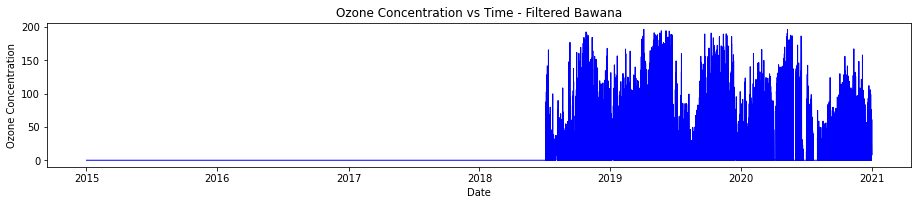

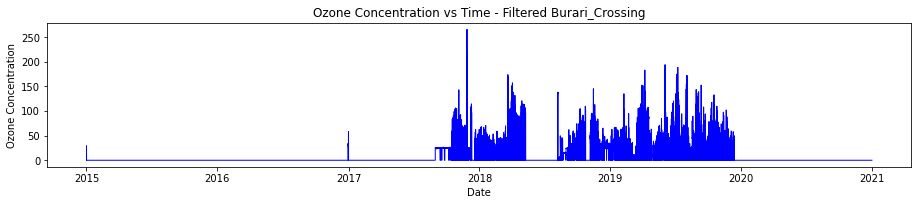

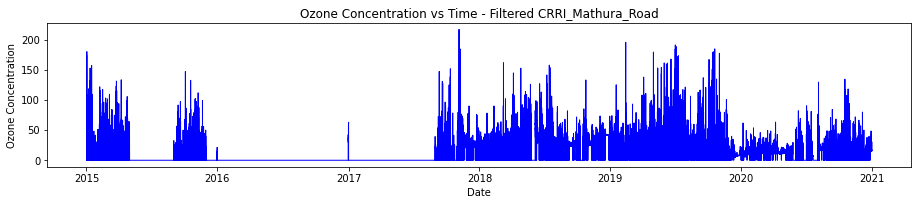

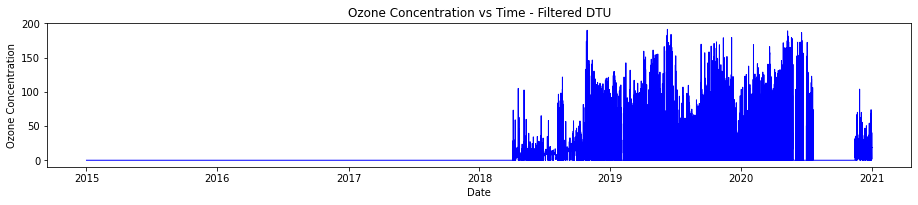

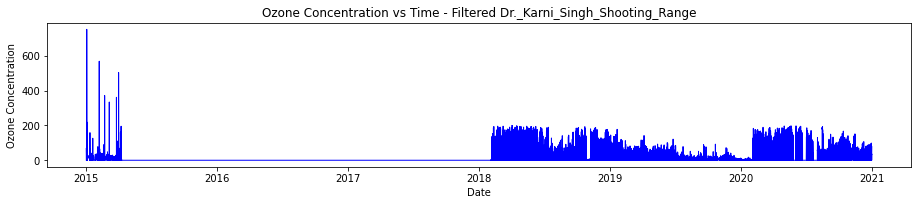

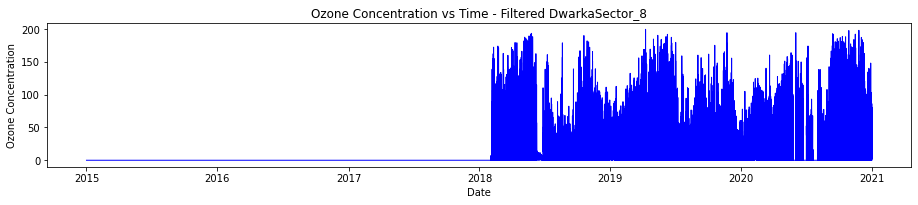

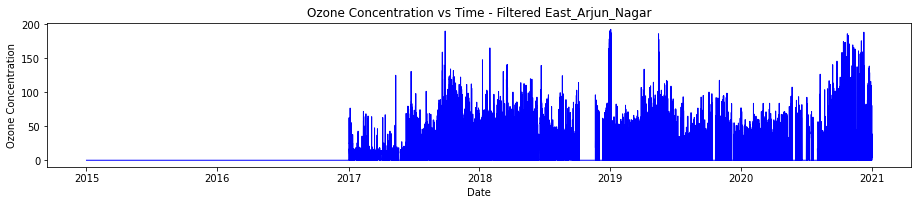

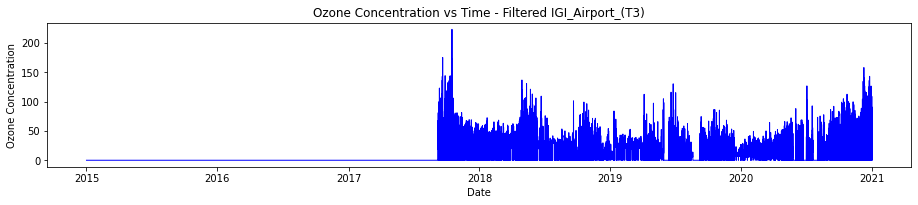

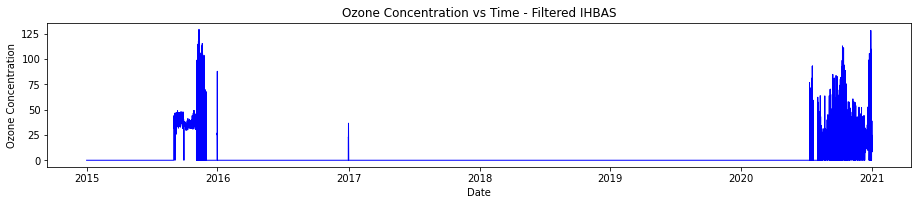

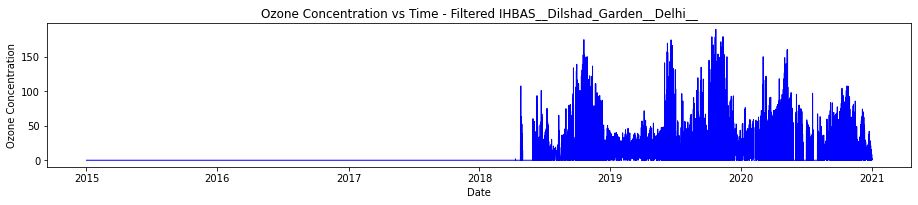

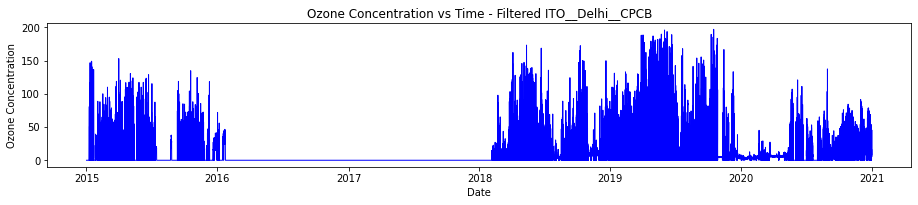

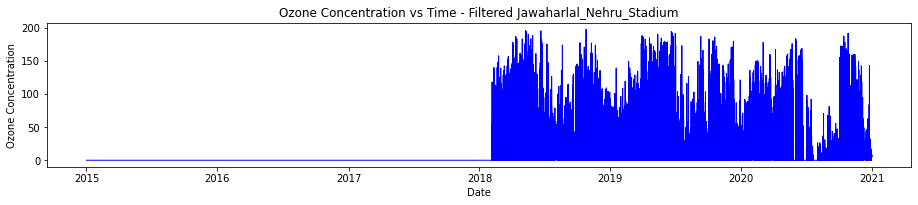

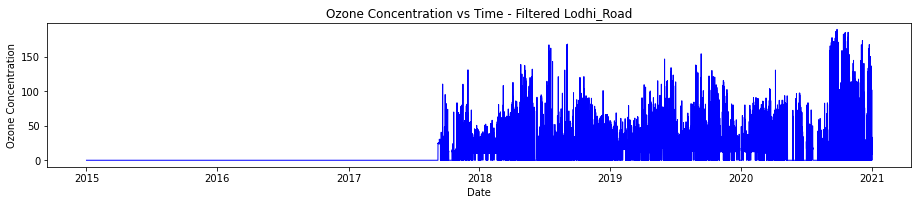

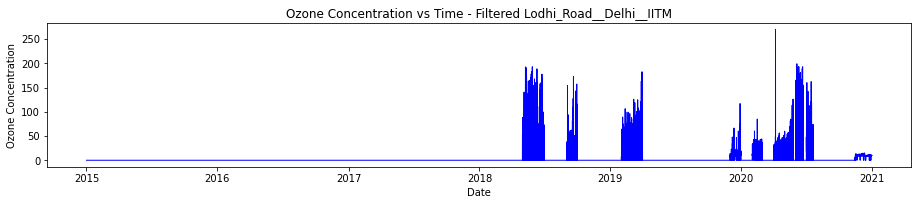

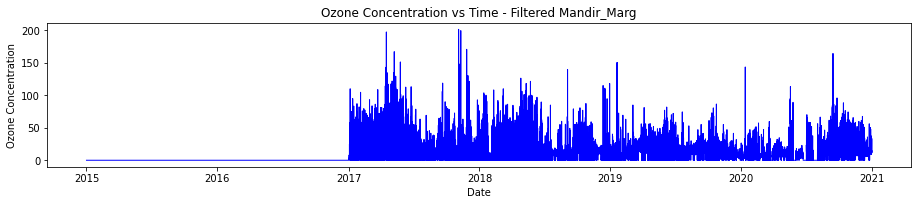

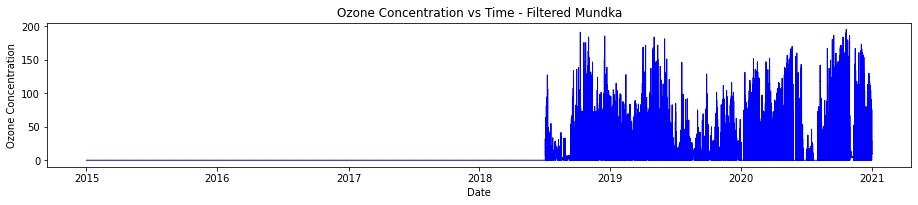

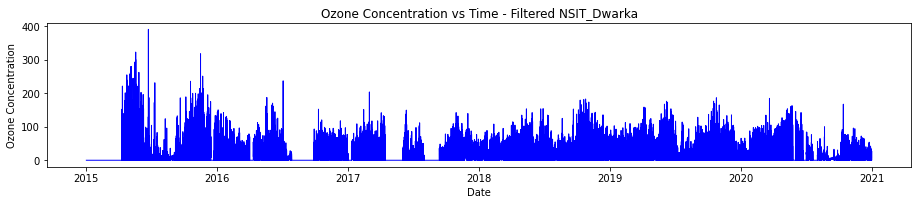

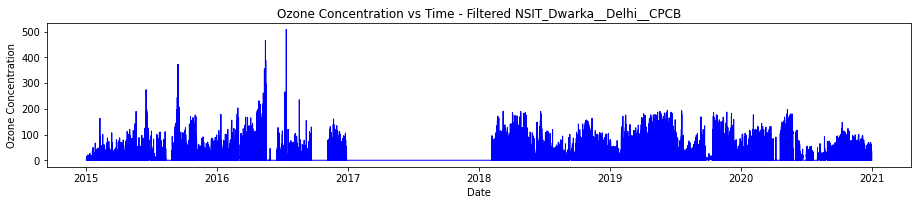

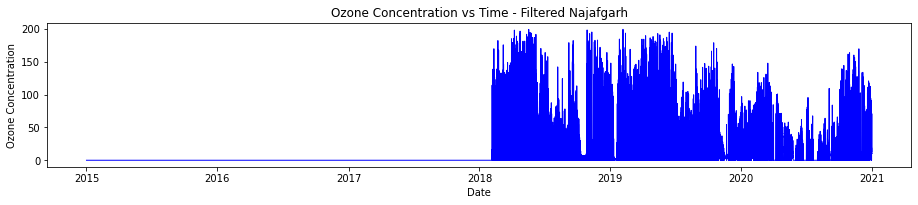

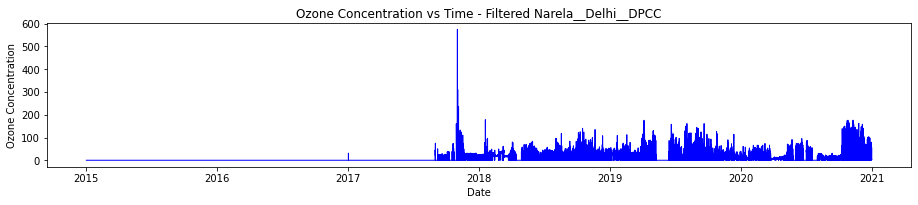

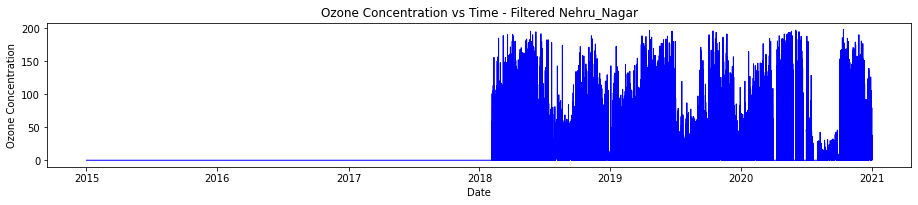

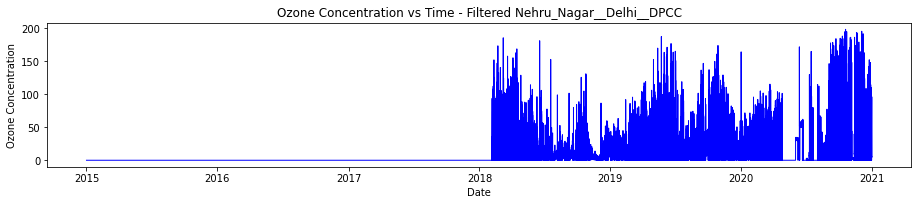

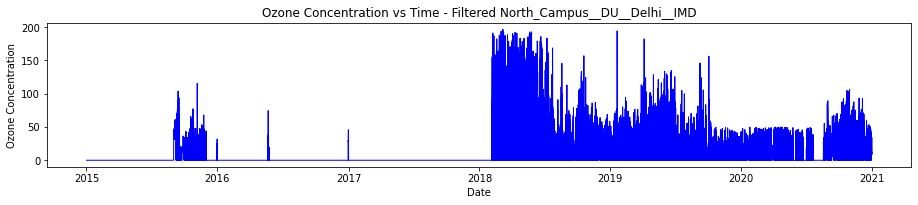

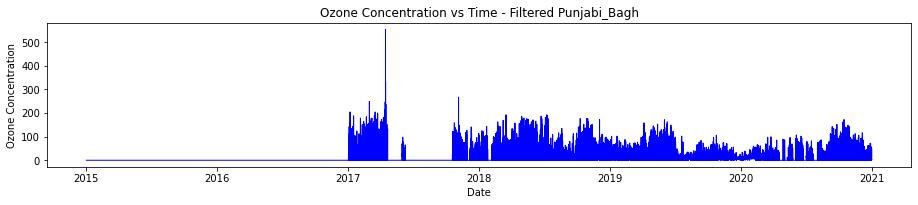

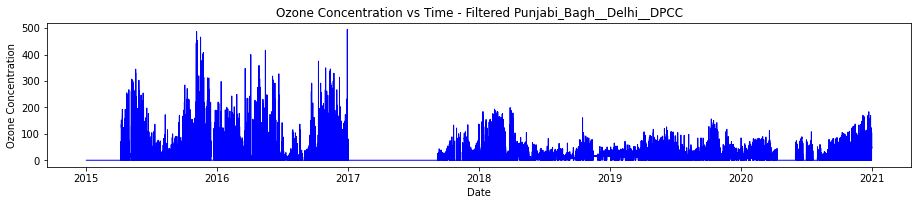

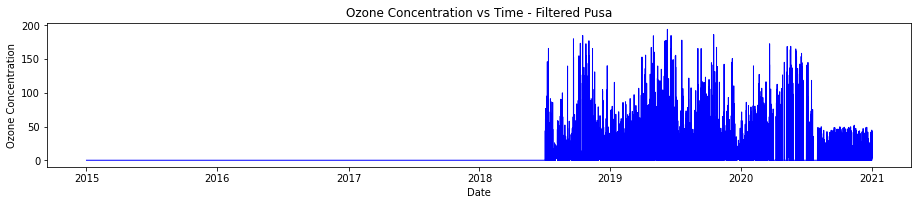

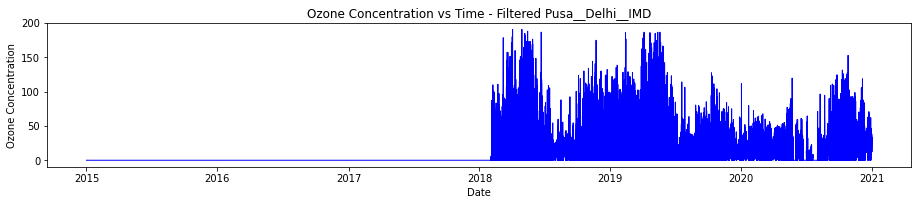

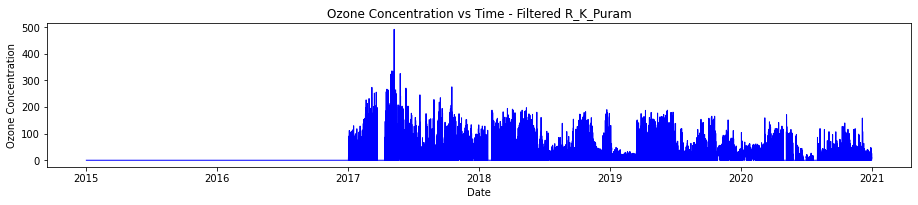

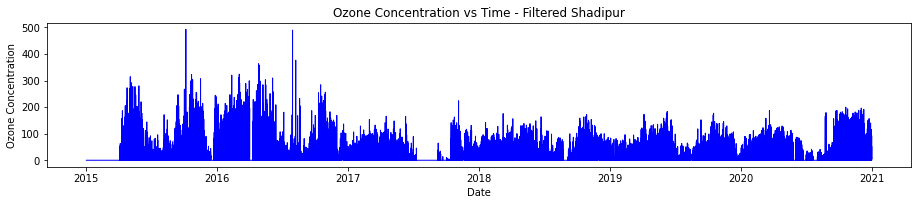

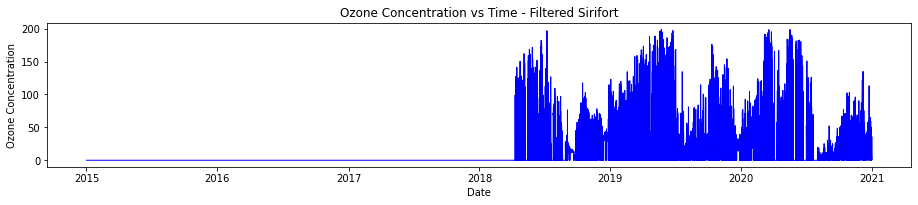

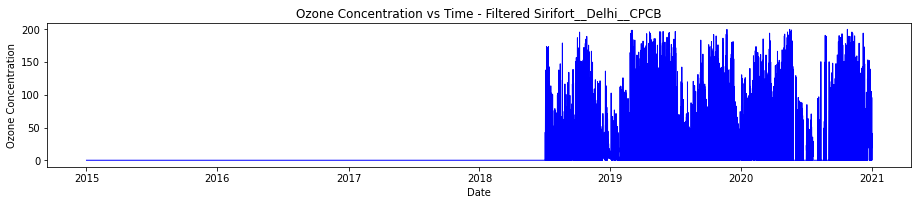

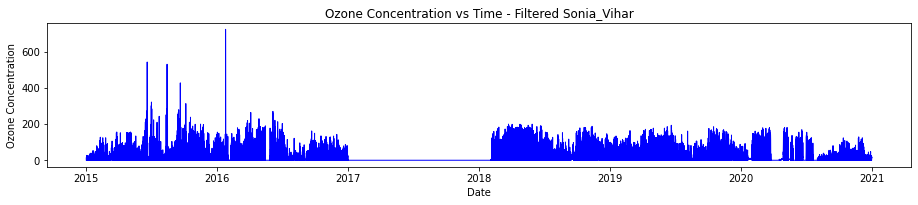

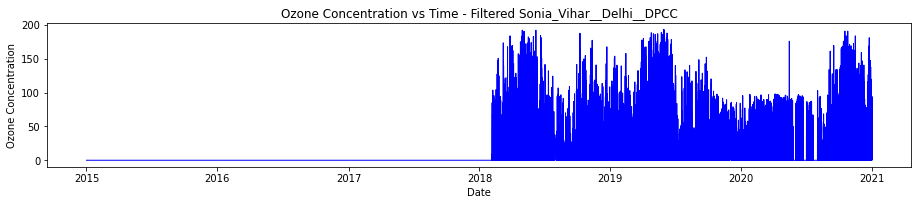

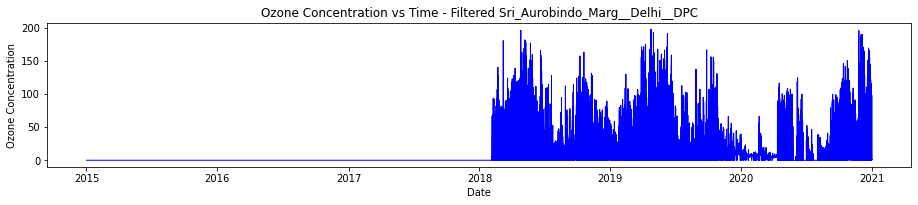

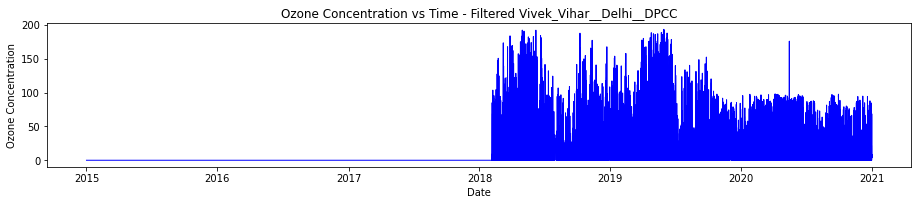

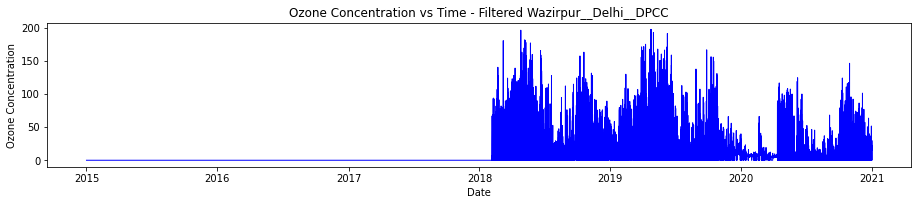

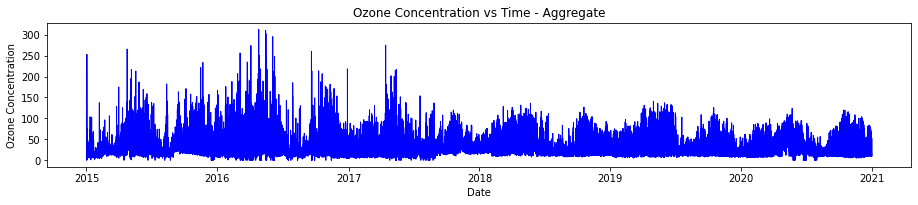

{'Alipur__Delhi__DPCC': 1152,
 'Anand_Vihar': 6491,
 'Ashok_Vihar__Delhi__DPCC': 3076,
 'Aya_Nagar__Delhi__IMD': 1460,
 'Bawana': 3230,
 'Burari_Crossing': 1987,
 'CRRI_Mathura_Road': 3582,
 'DTU': 2476,
 'Dr._Karni_Singh_Shooting_Range': 3232,
 'DwarkaSector_8': 3157,
 'East_Arjun_Nagar': 3763,
 'IGI_Airport_(T3)': 2094,
 'IHBAS': 278,
 'IHBAS__Dilshad_Garden__Delhi__': 1555,
 'ITO__Delhi__CPCB': 3180,
 'Jawaharlal_Nehru_Stadium': 2705,
 'Lodhi_Road': 1720,
 'Lodhi_Road__Delhi__IITM': 896,
 'Mandir_Marg': 2556,
 'Mundka': 1980,
 'NSIT_Dwarka': 4172,
 'NSIT_Dwarka__Delhi__CPCB': 4694,
 'Najafgarh': 2957,
 'Narela__Delhi__DPCC': 2942,
 'Nehru_Nagar': 3028,
 'Nehru_Nagar__Delhi__DPCC': 1873,
 'North_Campus__DU__Delhi__IMD': 2996,
 'Punjabi_Bagh': 3463,
 'Punjabi_Bagh__Delhi__DPCC': 4944,
 'Pusa': 2327,
 'Pusa__Delhi__IMD': 2466,
 'R_K_Puram': 4514,
 'Shadipur': 6441,
 'Sirifort': 2764,
 'Sirifort__Delhi__CPCB': 2647,
 'Sonia_Vihar': 5634,
 'Sonia_Vihar__Delhi__DPCC': 3886,
 'Sri_Aurobind

In [82]:
test_df2 = Ozone_df.copy()
test_df2.head()

removals2 = {}
#figsize = (20, 5)
#kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)
col_str = ""
for i in range(len(test_df2.columns)):
  test_df2["pandas"] = test_df2.iloc[:, i].rolling(window = 3, center = True).median().fillna(method='bfill').fillna(method='ffill')
  difference = np.abs(test_df2.iloc[:, i] - test_df2['pandas'])
  outlier_idx = difference > threshold

  #fig, ax = plt.subplots(figsize=figsize)
  #test_df.iloc[:, 0].plot()
  #test_df.iloc[:, 0][outlier_idx].plot(**kw)
  col_str = "Filtered " + test_df2.columns.to_list()[i]
  test_df2[col_str] = test_df2.iloc[:, i][-outlier_idx]
  removals2["" + test_df2.columns.to_list()[i]] = len(test_df2.iloc[:, i][outlier_idx].dropna())
  #test_df["Filtered Alipur"].plot()
test_df2.columns

filtered_test_df2 = test_df2.iloc[:, 41:81]
filtered_test_df2.head()

filtered_test_df2["Aggregate"] = filtered_test_df2.mean(axis = 1)
filtered_test_df2.fillna(0, inplace = True)
title_str = ""
for i in range(len(filtered_test_df2.columns)):
    plt.subplot(1, 1, 1)
    plt.plot(x_value,filtered_test_df2.iloc[:, i].values,color='blue',linewidth=1)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)
    title_str = 'Ozone Concentration vs Time - ' + filtered_test_df2.columns[i]
    plt.title(title_str); plt.xlabel('Date'); plt.ylabel('Ozone Concentration')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.5, wspace=0.2, hspace=0.2)
    plt.show()
removals2

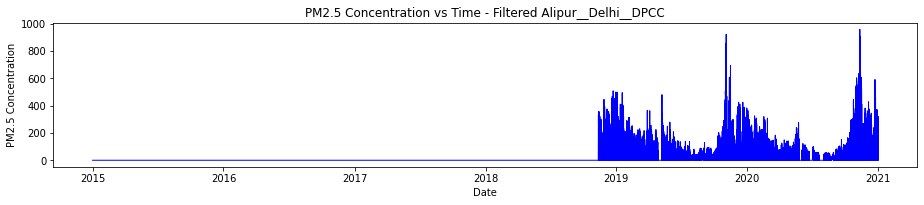

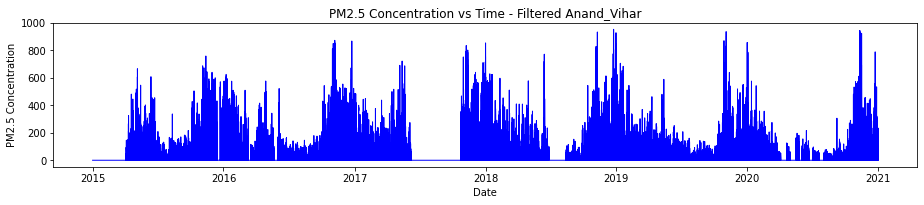

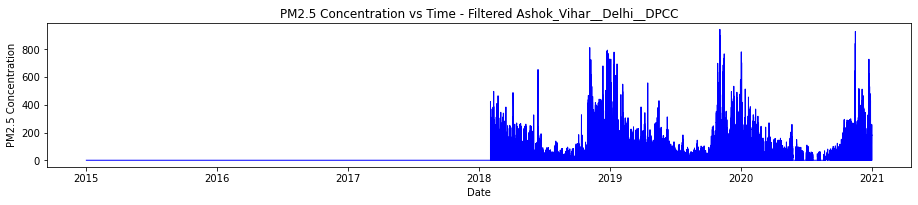

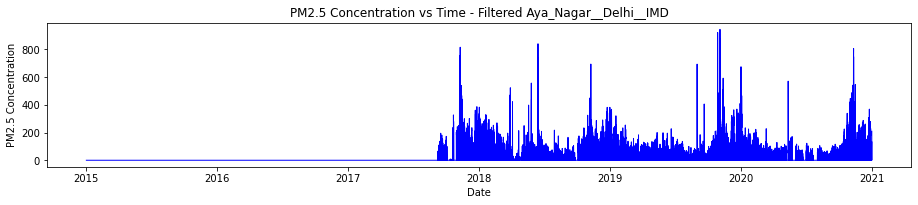

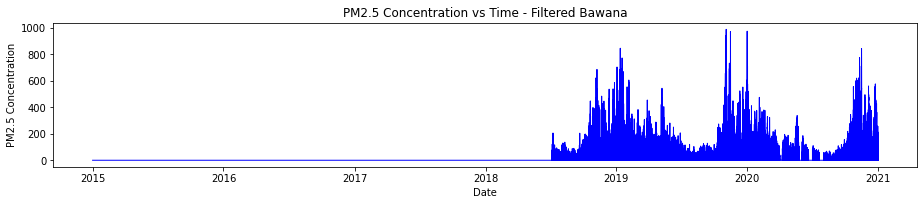

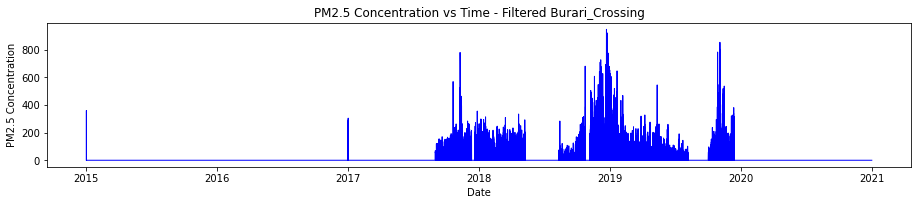

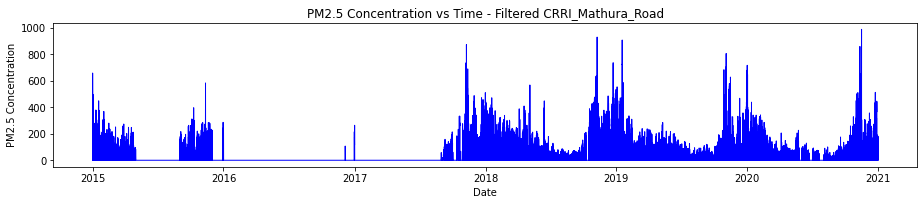

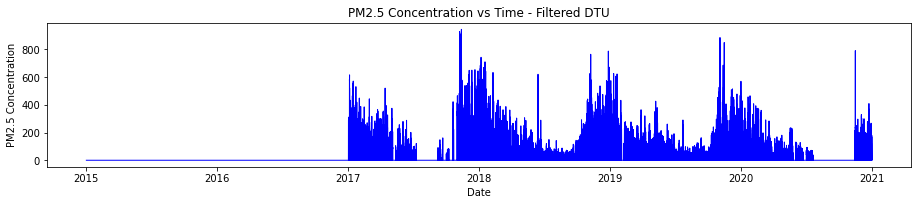

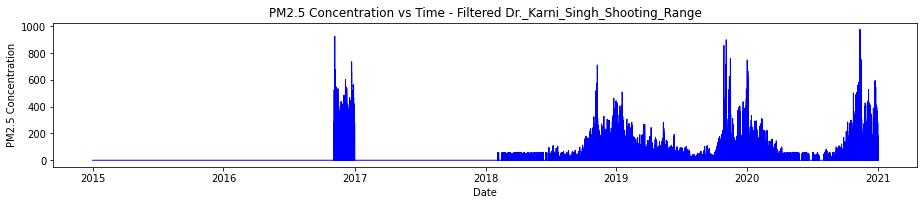

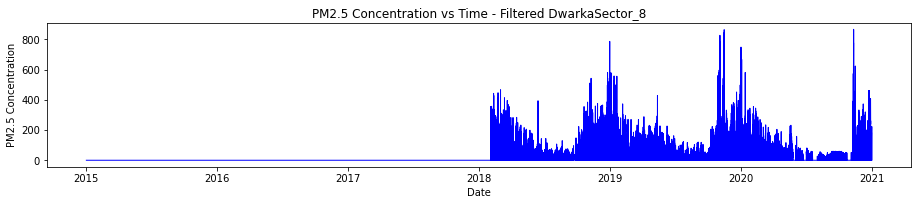

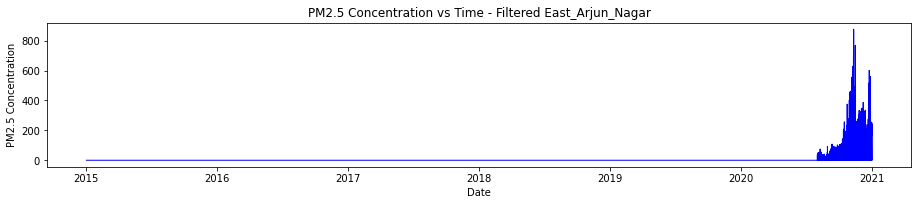

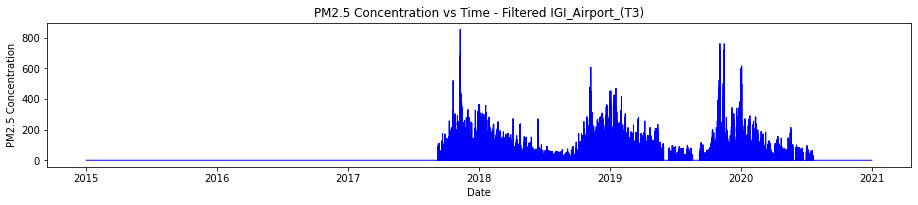

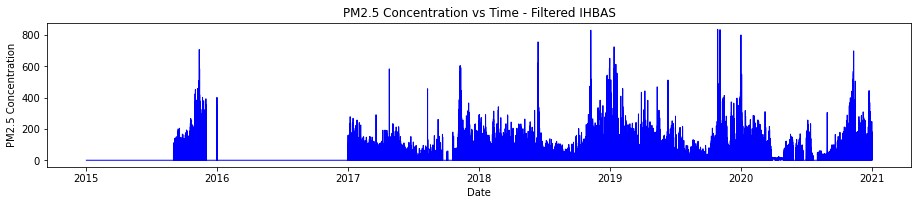

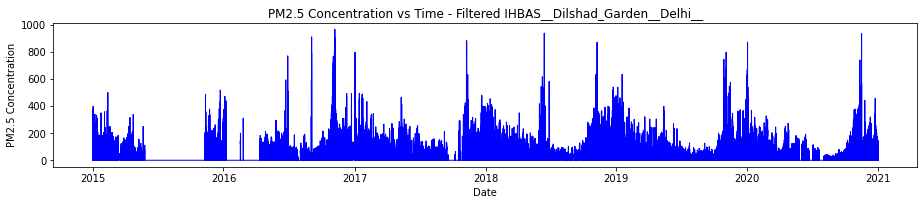

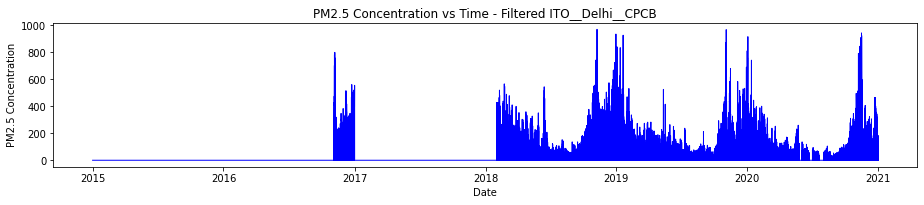

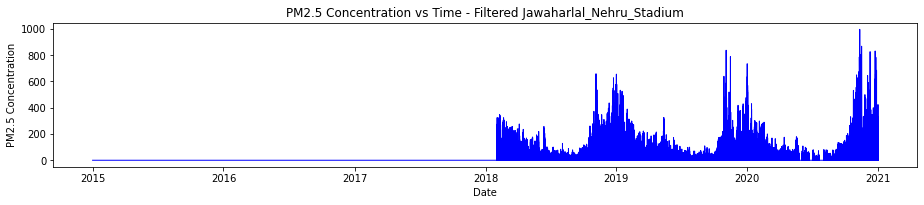

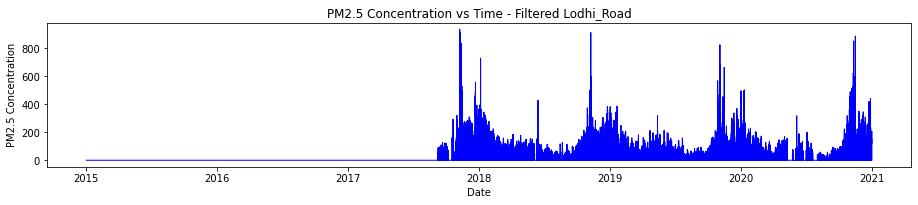

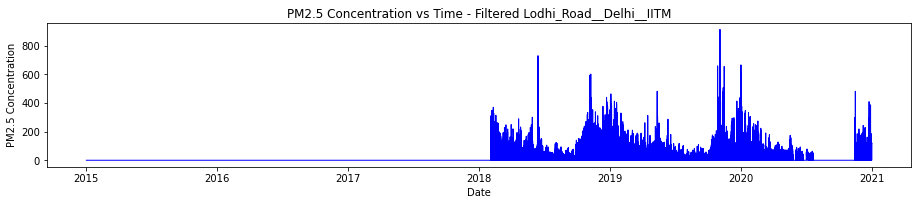

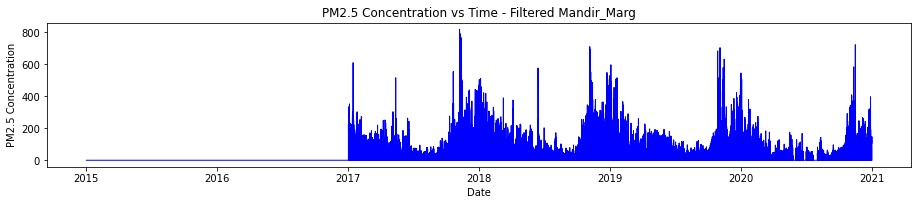

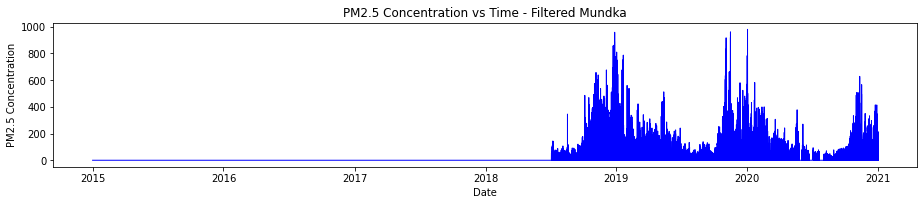

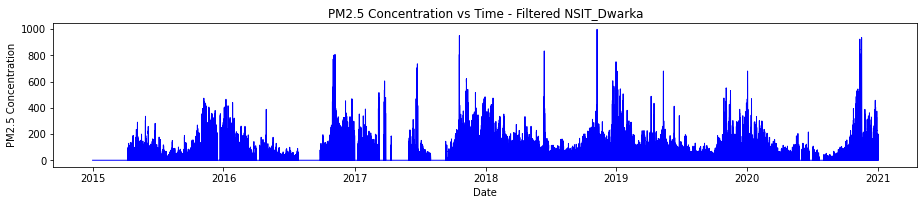

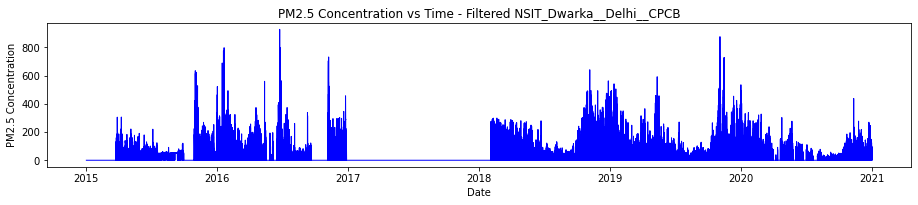

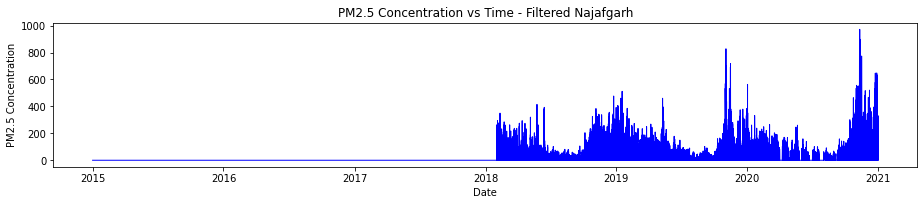

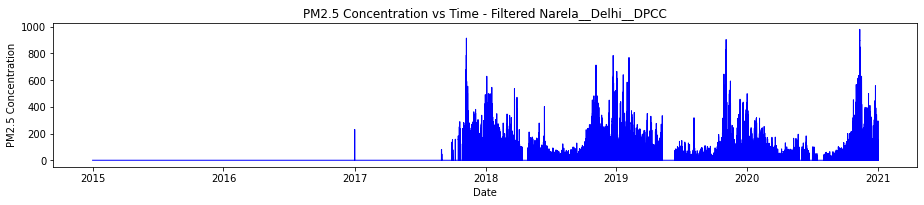

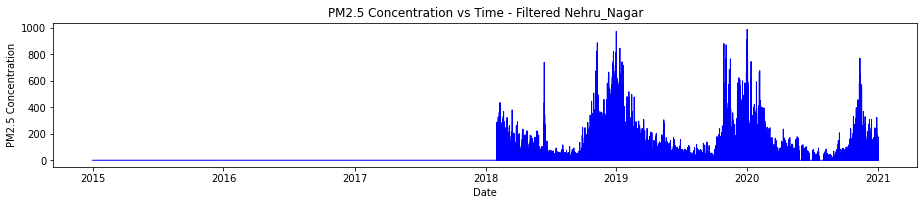

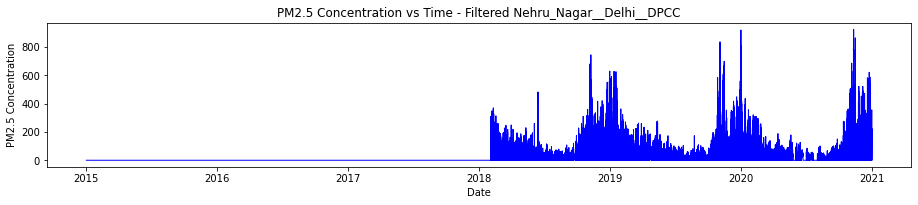

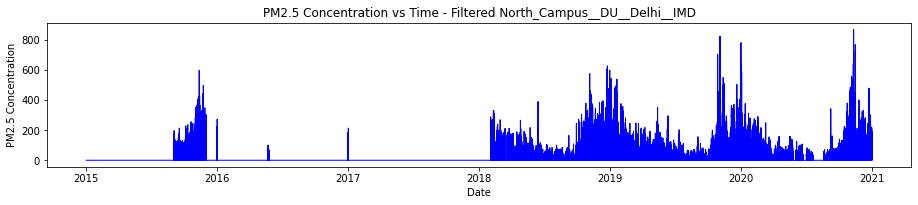

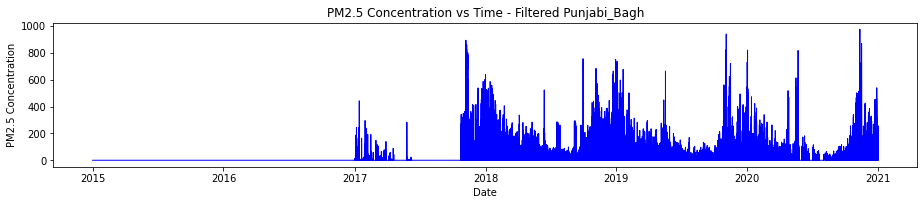

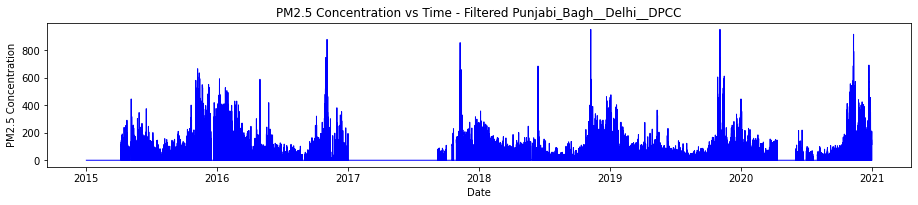

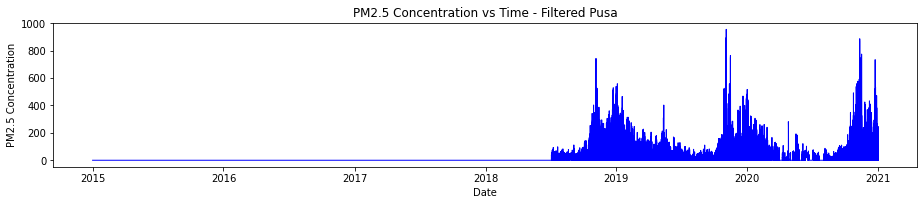

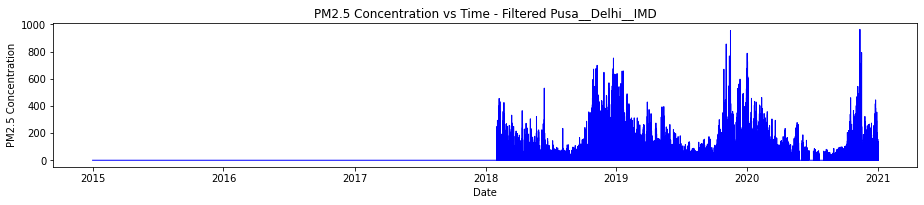

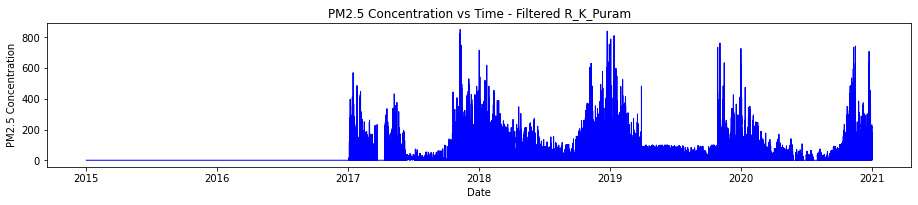

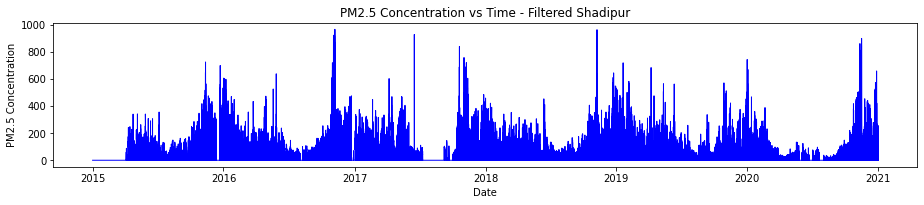

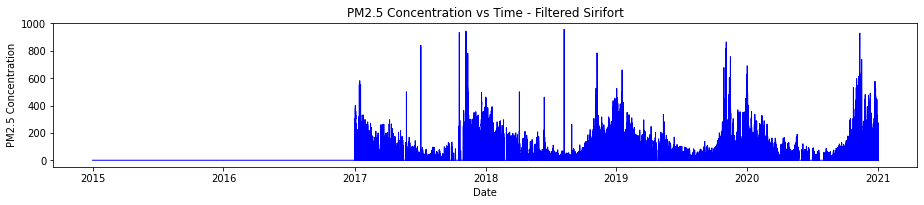

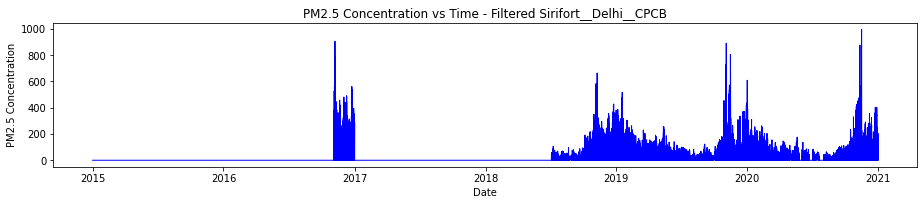

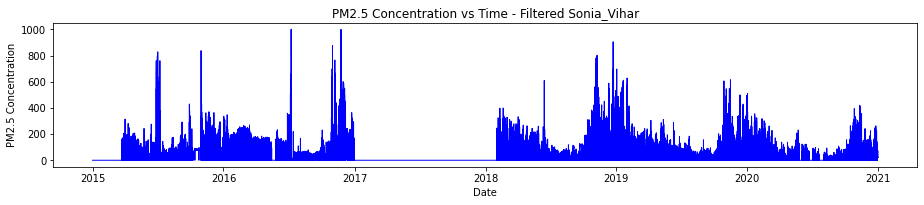

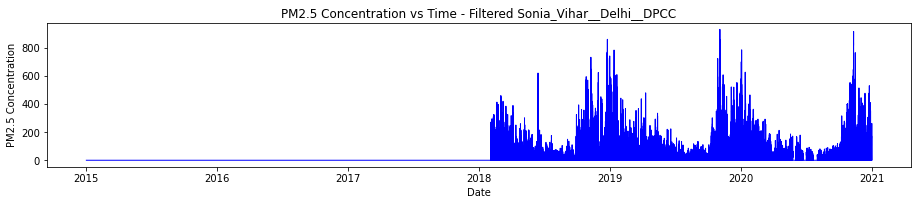

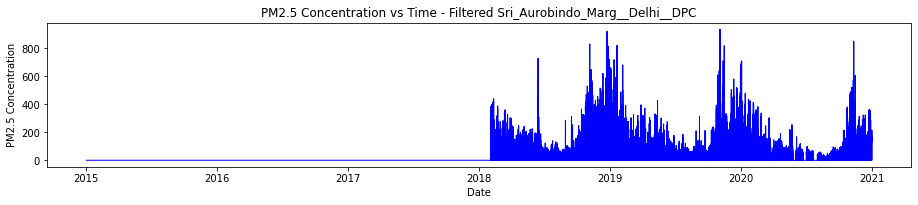

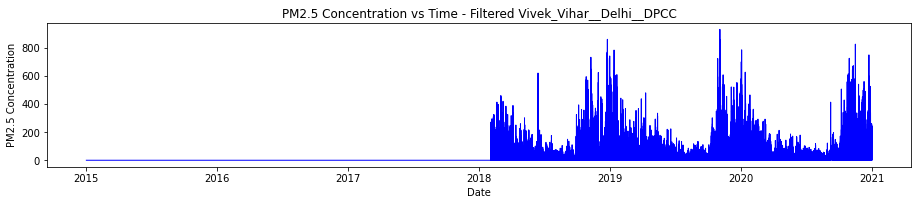

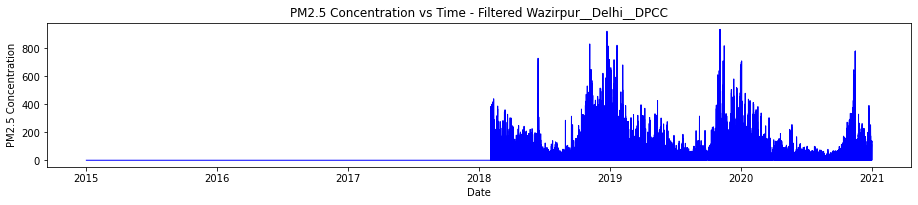

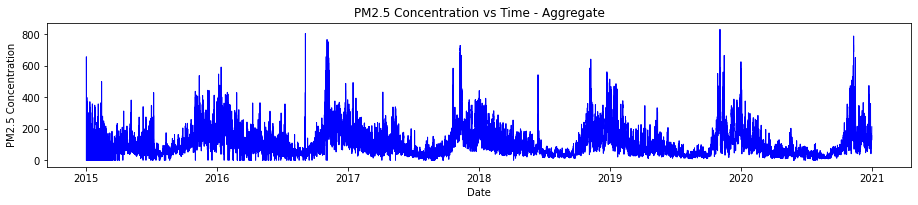

{'Alipur__Delhi__DPCC': 2576,
 'Anand_Vihar': 11471,
 'Ashok_Vihar__Delhi__DPCC': 3671,
 'Aya_Nagar__Delhi__IMD': 8457,
 'Bawana': 5018,
 'Burari_Crossing': 5058,
 'CRRI_Mathura_Road': 11036,
 'DTU': 7280,
 'Dr._Karni_Singh_Shooting_Range': 4770,
 'DwarkaSector_8': 4510,
 'East_Arjun_Nagar': 584,
 'IGI_Airport_(T3)': 6754,
 'IHBAS': 11732,
 'IHBAS__Dilshad_Garden__Delhi__': 9540,
 'ITO__Delhi__CPCB': 6416,
 'Jawaharlal_Nehru_Stadium': 4355,
 'Lodhi_Road': 7359,
 'Lodhi_Road__Delhi__IITM': 3854,
 'Mandir_Marg': 8538,
 'Mundka': 3344,
 'NSIT_Dwarka': 13279,
 'NSIT_Dwarka__Delhi__CPCB': 7382,
 'Najafgarh': 4021,
 'Narela__Delhi__DPCC': 7508,
 'Nehru_Nagar': 5044,
 'Nehru_Nagar__Delhi__DPCC': 3495,
 'North_Campus__DU__Delhi__IMD': 5490,
 'Punjabi_Bagh': 6014,
 'Punjabi_Bagh__Delhi__DPCC': 11693,
 'Pusa': 2804,
 'Pusa__Delhi__IMD': 5975,
 'R_K_Puram': 8340,
 'Shadipur': 15825,
 'Sirifort': 7711,
 'Sirifort__Delhi__CPCB': 3089,
 'Sonia_Vihar': 10328,
 'Sonia_Vihar__Delhi__DPCC': 4364,
 'Sri_

In [83]:
test_df3 = PM25_df.copy()
test_df3.head()

removals3 = {}
#figsize = (20, 5)
#kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)
col_str = ""
for i in range(len(test_df3.columns)):
  test_df3["pandas"] = test_df3.iloc[:, i].rolling(window = 3, center = True).median().fillna(method='bfill').fillna(method='ffill')
  difference = np.abs(test_df3.iloc[:, i] - test_df3['pandas'])
  outlier_idx = difference > threshold

  #fig, ax = plt.subplots(figsize=figsize)
  #test_df.iloc[:, 0].plot()
  #test_df.iloc[:, 0][outlier_idx].plot(**kw)
  col_str = "Filtered " + test_df3.columns.to_list()[i]
  test_df3[col_str] = test_df3.iloc[:, i][-outlier_idx]
  removals3["" + test_df3.columns.to_list()[i]] = len(test_df3.iloc[:, i][outlier_idx].dropna())
  #test_df["Filtered Alipur"].plot()
test_df3.columns

filtered_test_df3 = test_df3.iloc[:, 41:81]
filtered_test_df3.head()

filtered_test_df3["Aggregate"] = filtered_test_df3.mean(axis = 1)
filtered_test_df3.fillna(0, inplace = True)
title_str = ""
for i in range(len(filtered_test_df3.columns)):
    plt.subplot(1, 1, 1)
    plt.plot(x_value,filtered_test_df3.iloc[:, i].values,color='blue',linewidth=1)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)
    title_str = 'PM2.5 Concentration vs Time - ' + filtered_test_df3.columns[i]
    plt.title(title_str); plt.xlabel('Date'); plt.ylabel('PM2.5 Concentration')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.5, wspace=0.2, hspace=0.2)
    plt.show()
removals3

In [99]:
removals_df = pd.DataFrame(data=removals1.values(), index = list(removals1.keys()))
removals_df.rename(columns={0: "NO2 Data Removed"}, inplace = True)
removals_df["Ozone Data Removed"] = removals2.values()
removals_df["PM2.5 Data Removed"] = removals3.values()
removals_df["Percent NO2 Data Removed"] = [100*removals_df.iloc[i, 0] / len(NO2_df.iloc[:, i].dropna()) for i in range(len(NO2_df.columns))]
removals_df["Percent Ozone Data Removed"] = [100*removals_df.iloc[i, 1] / len(Ozone_df.iloc[:, i].dropna()) for i in range(len(Ozone_df.columns))]
removals_df["Percent PM2.5 Data Removed"] = [100*removals_df.iloc[i, 2] / len(PM25_df.iloc[:, i].dropna()) for i in range(len(PM25_df.columns))]
removals_df.index.name = "Location"
removals_df.head()

NO2 Data Removed  ...  Percent PM2.5 Data Removed
Location                                    ...                            
Alipur__Delhi__DPCC                   1996  ...                   15.144923
Anand_Vihar                          10899  ...                   28.971561
Ashok_Vihar__Delhi__DPCC              3479  ...                   15.395907
Aya_Nagar__Delhi__IMD                 1083  ...                   34.330600
Bawana                                2378  ...                   24.326159

[5 rows x 6 columns]

In [100]:
removals_df.reset_index(inplace = True)
removals_df.iloc[:, 4]

0     11.712240
1     28.445036
2     14.539452
3      4.182921
4     11.592083
5      7.161977
6      8.600859
7      9.338507
8     16.877270
9     16.888907
10    16.248033
11     7.641224
12    15.573547
13    14.428747
14    13.639344
15    17.223360
16     5.014281
17    14.987872
18    12.754599
19    11.218521
20    10.149833
21    13.080584
22    11.243884
23     7.386976
24    15.672204
25    11.201138
26     6.688601
27    16.184848
28    13.329930
29    23.022204
30    12.749324
31    16.828034
32    17.196828
33    14.098115
34    12.315900
35    14.118173
36     9.790823
37    18.048106
38     9.283809
39    18.068089
Name: Percent NO2 Data Removed, dtype: float64

Text(0.5, 1.0, 'Percent NO2 Data Removed')

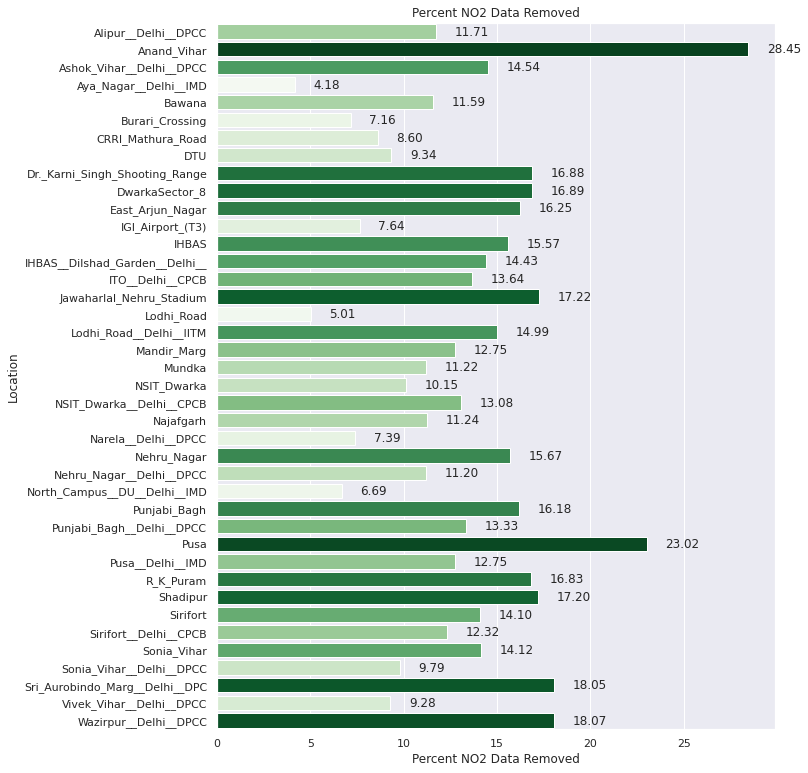

In [104]:
sns.set(rc = {'figure.figsize':(10,13)})
pal = sns.color_palette("Greens_r", len(removals_df.iloc[:, 4]))
rank = removals_df.iloc[:, 4].argsort().argsort()
ax = sns.barplot(x = "Percent NO2 Data Removed", y = "Location", orient = "h", data = removals_df, palette = np.array(pal[::-1])[rank])
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
ax.set_title("Percent NO2 Data Removed")

Text(0.5, 1.0, 'Percent Ozone Data Removed')

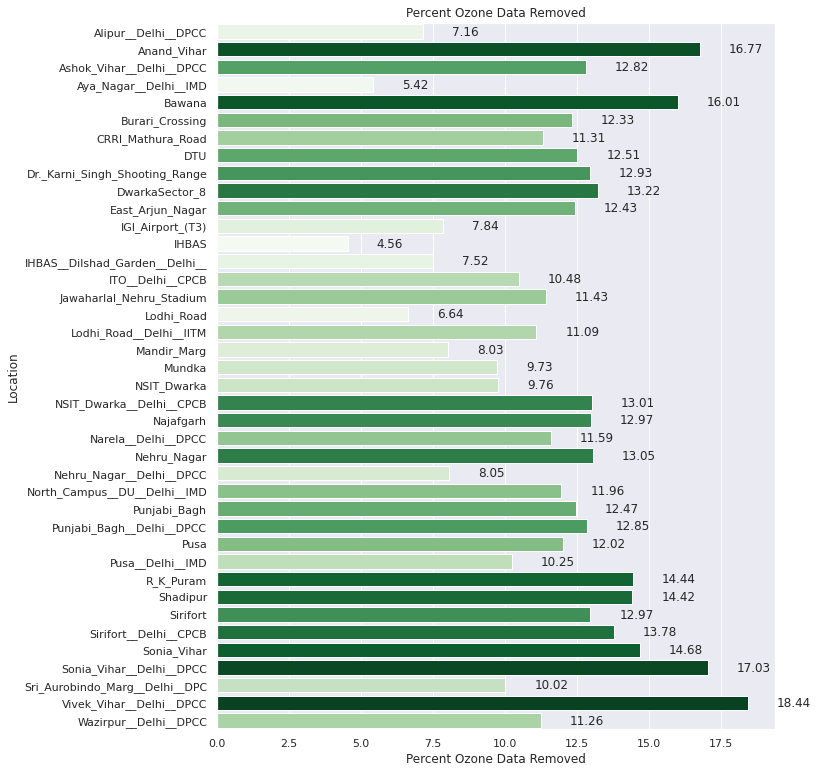

In [105]:
sns.set(rc = {'figure.figsize':(10,13)})
pal = sns.color_palette("Greens_r", len(removals_df.iloc[:, 5]))
rank = removals_df.iloc[:, 5].argsort().argsort()
ax = sns.barplot(x = "Percent Ozone Data Removed", y = "Location", orient = "h", data = removals_df, palette = np.array(pal[::-1])[rank])
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
ax.set_title("Percent Ozone Data Removed")

Text(0.5, 1.0, 'Percent PM2.5 Data Removed')

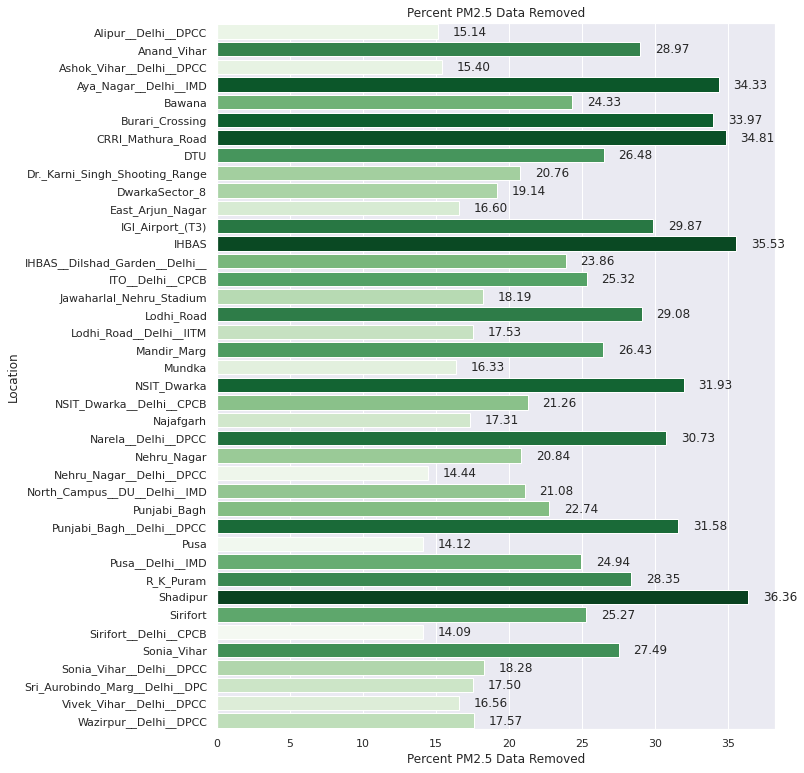

In [106]:
sns.set(rc = {'figure.figsize':(10,13)})
pal = sns.color_palette("Greens_r", len(removals_df.iloc[:, 6]))
rank = removals_df.iloc[:, 6].argsort().argsort()
ax = sns.barplot(x = "Percent PM2.5 Data Removed", y = "Location", orient = "h", data = removals_df, palette = np.array(pal[::-1])[rank])
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
ax.set_title("Percent PM2.5 Data Removed")